In [39]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import pandas as pd
import astropy.units as u
from astropy.wcs import wcs
from astropy.io import fits
from scipy import ndimage
from matplotlib.gridspec import GridSpec
from tempfile import TemporaryFile

%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from importlib import reload

import os
os.chdir('/Users/felixmartinez/Research/scripts/')
import functions as func

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Importing Important Data:

In [38]:
img_N = fits.open('/Users/felixmartinez/Research/CANDLES/goods_data/goodsn_3dhst_v4.0_f160w/goodsn_3dhst.v4.0.F160W_orig_sci.fits')[0].data
seg_N = fits.open('/Users/felixmartinez/Research/CANDLES/goods_data/goodsn_3dhst.v4.0.F160W_seg.fits')[0].data
segN_fits = '/Users/felixmartinez/Research/CANDLES/goods_data/goodsn_3dhst.v4.0.F160W_seg.fits'
w = wcs.WCS(segN_fits)

corrected_x = np.load('/Users/felixmartinez/Research/merger_detection/Rand_Ha/corrected_x_median.npy')
corrected_y = np.load('/Users/felixmartinez/Research/merger_detection/Rand_Ha/corrected_y_median.npy')
xrange = np.linspace(-30,30, 1000)
yrange = np.linspace(-30,30, 1000)

In [18]:
#Merger Candidates

#The failed arrays do not have Ha in their fitz files
#The Bad arrays have issues with subtraction/noise that may throw the data off

GN1 = [36808,37615,37810,36514,36928,37636,37821,37006,37363,37738,37836,36651,37807,38041,
       37067,37395,37750,36717,37074,37786,37996,36736,37102,37424,37787,38027,36795,37193]
GN1_bad = [36420,37343,37957,37406]
GN1_failed = [36577]

GN2 = [10101,11429,15544,18197,20948,10336,11526,15861,21720,10512,11941,15867,18642,21854,10528,
       12479,16033,18817,21918,10619,16083,18869,22265,10639,13037,18988,14621,20298,26882,11339,
       23667,10723,16753,19592,25616,11152,14780,17139,19860,25671,11228,15050,17626,15477,17635]
GN2_bad = [18315,16173,22417,10653,14713,20701]
GN2_failed = [12499,16375,19316]

GN3 = [26922,33422,34527,36054,27018,31179,33571,36406,27101,31788,33673,36433,27422,33135,34407,
       31957,33707,36720,27472,33732,35039,28593,32329,33764,35045,37171,28596,32905,34403,35264,35617]
GN3_bad = [29641,34562,34739,34747,32066,29325]
GN3_failed = [37053,37188]

GN4 = [15999,20073,22265,25734,28596,18400,20305,23381,26696,20319,23608,27018,29641,18763,
       20481,23889,27101,32229,19437,20635,27472,19485,21564,25393,27930,19493,25687,28593]
GN4_bad = [29325,18574,23936]
GN4_failed = [21814]

GN5 = [33764]
GN5_bad = [32562]
GN5_failed = [33571]

GN7 = [10964,13777,15300,19017,19875,11683,13821,15477,21152,13909,15544,19149,12713,14178,
       15761,19235,13466,14281,17927,19270,13750,19659]
GN7_bad = [11750,14597]
GN7_failed = [19088,18642]

#All of the failed arrays have no Ha in the fits files, It also has no Ha in CLEAR so that is ok

In [63]:
import functions as func
reload(func)

<module 'functions' from '/Users/felixmartinez/Research/scripts/functions.py'>

In [64]:
string = ['GN1']
func.Median_filter(GN1,string,1,3)

x intercepts for the X offset are: -1.0 for the lower bound and: 1.1 for the upper bound for a 1 sigma test.
x intercepts for the Y offset are: -1.4 for the lower bound and: 1.1 for the upper bound for a 1 sigma test.
GN1 is complete.


([1.0, 0.0, 0.0, 1.0, -1.0, 0.0, 1.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, -1.0, 1.0, 0.0, -1.0, 0.0])

In [56]:
#Finalized Mergers
Sec = [GN1]#,GN2]#,GN3,GN4,GN5,GN7]
#Mergers W/ Issues
Sec_name = ['GN1']#,'GN2']#,'GN3','GN4','GN5','GN7']

for i in range(len(Sec)):
    GN1_xoff, GN1_yoff = func.Median_filter(Sec,Sec_name,1,3)
    #GN2_xoff, GN2_yoff = func.Median_filter(Sec[i],Sec_name[i],1,3)
    #GN3_xoff, GN3_xoff = func.Median_filter(Sec[i],Sec_name[i],1,3)
    #GN4_xoff, GN4_xoff = func.Median_filter(Sec[i],Sec_name[i],1,3)
    #GN5_xoff, GN5_xoff = func.Median_filter(Sec[i],Sec_name[i],1,3)
    #GN7_xoff, GN7_xoff = func.Median_filter(Sec[i],Sec_name[i],1,3)

x intercepts for the offset are: -1.0 for the lower bound and: 1.1 for the upper bound for a 1 sigma test.
x intercepts for the offset are: -1.4 for the lower bound and: 1.1 for the upper bound for a 1 sigma test.
x intercepts for the X offset are: -1.0 for the lower bound and: 1.1 for the upper bound for a 3 sigma test.
x intercepts for the Y offset are: -1.4 for the lower bound and: 1.1 for the upper bound for a 3 sigma test.
Incorrect sigma, please choose sigma 1 or sigma 3


TypeError: cannot unpack non-iterable NoneType object

In [50]:
GN1_xoff

[0.0, 0.0, 0.0, 0.0, 1.0, -1.0, 1.0, 0.0, -1.0, 0.0]

In [36]:
string = ['GN1']
func.Median_filter(GN1,string,1,3)

x intercepts for the offset are: -1.0 for the lower bound and: 1.1 for the upper bound for a 1 sigma test.
x intercepts for the offset are: -1.4 for the lower bound and: 1.1 for the upper bound for a 1 sigma test.


([1.0, 0.0, 0.0, 1.0, -1.0, 0.0, 1.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, -1.0, 1.0, 0.0, -1.0, 0.0])

# Median Filter
When analysing the raw images for our merger objects (downloaded separetly) we can see that some of these images have a lot of background noise in them (due to these galaxies being so faint). To remove errors flagged for background noise we must make a Median Filter. It is a filter that analyzes a square of either 2x2, 3x3, or a 5x5 demensions and replacing the center pixel of said square with the average of the square. This allows us to see objects that are actually there and removes random background noise spikes.

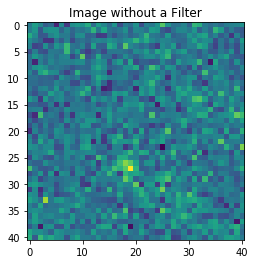

In [13]:
H_a = fits.open('/Users/felixmartinez/Research/merger_detection/candidates/merger_candidates/GN2/GN2_26882.full.fits')
Ha_fits = '/Users/felixmartinez/Research/merger_detection/candidates/merger_candidates/GN2/GN2_26882.full.fits'

Halph = []

Line = H_a['Line','Ha'].data     #Halpha data
Continuum = H_a['Continuum','Ha'].data
Contam = H_a['Contam','Ha'].data
Raw = H_a['DSCI','F105W'].data   #Original Image
    
Halph.append(Line - Continuum - Contam)  #Fixing the Errors on Halpha
Ha_img = Halph[0][20:61,20:61]

plt.imshow(Ha_img)
plt.title("Image without a Filter")
plt.show()
#plt.savefig('/Users/felixmartinez/Research/GN1_37102.png',bbox_inches = 'tight')

Text(0.5, 1.0, 'Image with a 5x5 Filter')

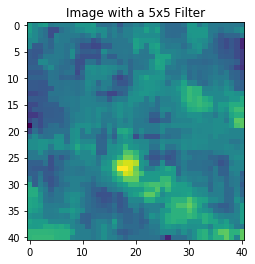

In [17]:
from scipy import ndimage

n = 5   #The integer is what demension we want our filter to be

im_med = ndimage.median_filter(Ha_img,n)

plt.imshow(im_med)
plt.title("Image with a "+str(n)+"x"+str(n)+" Filter")

We want to analyise which median filter would be best to use, to do that we must have a control sample (no filter) then analyize the 2x2, 3x3, and 5x5 filters to see which would be most useful and prevent "oversmoothening".

In [122]:
Subjects = GN1
ex = [37271]


Halph = []
Orig = []
Title_fancy = []
Title_save = []
Ha_x_1 = []
Ha_y_1 = []
Orig_x_1 = []
Orig_y_1 = []
x_offset_seg_1 = []
y_offset_seg_1 = []
RealData = []
Mask = []
im_med = []

for i in Subjects:
#Opening all the Ha files
    H_a = fits.open('/Users/felixmartinez/Research/merger_detection/candidates/merger_candidates/GN1/GN1_{}.full.fits'.format(i))
    Ha_fits = '/Users/felixmartinez/Research/merger_detection/candidates/merger_candidates/GN1/GN1_{}.full.fits'.format(i)
    
#Subtracting out the error on the Ha files and Original Image
    Line = H_a['Line','Ha'].data     #Halpha data
    Continuum = H_a['Continuum','Ha'].data
    Contam = H_a['Contam','Ha'].data
    Raw = H_a['DSCI','F105W'].data   #Original Image
    
    Halph.append(Line - Continuum - Contam)  #Fixing the Errors on Halpha
    Orig.append(Raw)
    Title_fancy.append('GN1 {}'.format(i))
    Title_save.append('GN1_{}'.format(i))
    
#Galaxy ID
    GID = i   
    
#X and Y Posistions of Galaxy on Seg Map
    Y,X = np.where(seg_N == GID)
    Z = np.array([Y,X]).T     #Gives the X and Y positions of Object in Y,X
    #rowmin = min(Z.T[0])
    #rowmax = max(Z.T[0])
    #colmin = min(Z.T[1])
    #colmax = max(Z.T[1])
    #world = w.wcs_pix2world(Z,1)  #Gives RA and Dec Values of Object (May not be needed)

#Center Pixel of Ha on Seg Map
    RA = H_a[0].header['RA']                                
    DEC = H_a[0].header['DEC']    

    center = w.wcs_world2pix([[RA,DEC]],1)   #Finds the center pixels of the central RA and Dec of the Ha cutout
    hy = np.round(center[0][0])
    hx = np.round(center[0][1])
    center = np.array([int(hx),int(hy)])

#Making a Mask that is the Galaxy on Seg Map
    seg_mask = seg_N[center[0]-20:center[0]+21,center[1]-20:center[1]+21]
    #seg_mask = seg_N[center[0]-np.abs(center[0]-rowmin):center[0]+np.abs(center[0]-rowmax),
    #                 center[1]-np.abs(center[1]-colmin):center[1]+np.abs(center[1]-colmax)]
    seg_mask[seg_mask != GID] = 0
    seg_mask[seg_mask == GID] = 1
    
    Mask.append(np.array(seg_mask))


for j in range(len(Subjects)):

       
#Cropping the Ha and Orig Images to fit the size of Seg map
    Ha_img = Halph[j][20:61,20:61]
    Orig_img = Orig[j][20:61,20:61]
    
#Applying the Segmentation Map Mask
    Ha_img[Mask[j] == 0]=0
    Orig_img[Mask[j] == 0]=0
    
#Applying the Filter to the original images
    m=np.percentile(Ha_img,1.5)
    M=np.percentile(Ha_img,98.5)
    if M < np.abs(m)*6:
        M = np.abs(m)*6
    RealData.append(func.scaling_factor(Ha_img, m, M))
    im_med.append(ndimage.median_filter(RealData[j], 1))

#Finding the Position of the Brightest Pixel and its value
    #Ha_position = np.argwhere(RealData[j] == RealData[j].max()) * u.pixel
    #Ha_max_value = np.amax(RealData[j])
    Ha_position = np.argwhere(im_med[j] == im_med[j].max()) * u.pixel
    Ha_max_value = np.amax(im_med[j])

    Orig_position = np.argwhere(Orig_img == Orig_img.max()) * u.pixel
    Orig_max_value = np.amax(Orig_img) 

#Appending the x and y for the Histogram
    Ha_x_1.append(Ha_position[0][1])
    Ha_y_1.append(Ha_position[0][0])
    Orig_x_1.append(Orig_position[0][1])
    Orig_y_1.append(Orig_position[0][0])
    
    x_offset_seg_1.append(Ha_x_1[j].value - Orig_x_1[j].value)
    y_offset_seg_1.append(Ha_y_1[j].value - Orig_y_1[j].value)

In [124]:
Subjects = GN1
ex = [37271]


Halph = []
Orig = []
Title_fancy = []
Title_save = []
Ha_x_2 = []
Ha_y_2 = []
Orig_x_2 = []
Orig_y_2 = []
x_offset_seg_2 = []
y_offset_seg_2 = []
RealData = []
Mask = []
im_med = []

for i in Subjects:
#Opening all the Ha files
    H_a = fits.open('/Users/felixmartinez/Research/merger_detection/candidates/merger_candidates/GN1/GN1_{}.full.fits'.format(i))
    Ha_fits = '/Users/felixmartinez/Research/merger_detection/candidates/merger_candidates/GN1/GN1_{}.full.fits'.format(i)
    
#Subtracting out the error on the Ha files and Original Image
    Line = H_a['Line','Ha'].data     #Halpha data
    Continuum = H_a['Continuum','Ha'].data
    Contam = H_a['Contam','Ha'].data
    Raw = H_a['DSCI','F105W'].data   #Original Image
    
    Halph.append(Line - Continuum - Contam)  #Fixing the Errors on Halpha
    Orig.append(Raw)
    Title_fancy.append('GN1 {}'.format(i))
    Title_save.append('GN1_{}'.format(i))
    
#Galaxy ID
    GID = i   
    
#X and Y Posistions of Galaxy on Seg Map
    Y,X = np.where(seg_N == GID)
    Z = np.array([Y,X]).T     #Gives the X and Y positions of Object in Y,X
    #rowmin = min(Z.T[0])
    #rowmax = max(Z.T[0])
    #colmin = min(Z.T[1])
    #colmax = max(Z.T[1])
    #world = w.wcs_pix2world(Z,1)  #Gives RA and Dec Values of Object (May not be needed)

#Center Pixel of Ha on Seg Map
    RA = H_a[0].header['RA']                                
    DEC = H_a[0].header['DEC']    

    center = w.wcs_world2pix([[RA,DEC]],1)   #Finds the center pixels of the central RA and Dec of the Ha cutout
    hy = np.round(center[0][0])
    hx = np.round(center[0][1])
    center = np.array([int(hx),int(hy)])

#Making a Mask that is the Galaxy on Seg Map
    seg_mask = seg_N[center[0]-20:center[0]+21,center[1]-20:center[1]+21]
    #seg_mask = seg_N[center[0]-np.abs(center[0]-rowmin):center[0]+np.abs(center[0]-rowmax),
    #                 center[1]-np.abs(center[1]-colmin):center[1]+np.abs(center[1]-colmax)]
    seg_mask[seg_mask != GID] = 0
    seg_mask[seg_mask == GID] = 1
    
    Mask.append(np.array(seg_mask))


for j in range(len(Subjects)):

       
#Cropping the Ha and Orig Images to fit the size of Seg map
    Ha_img = Halph[j][20:61,20:61]
    Orig_img = Orig[j][20:61,20:61]
    
#Applying the Segmentation Map Mask
    Ha_img[Mask[j] == 0]=0
    Orig_img[Mask[j] == 0]=0
    
#Applying the Filter to the original images
    m=np.percentile(Ha_img,1.5)
    M=np.percentile(Ha_img,98.5)
    if M < np.abs(m)*6:
        M = np.abs(m)*6
    RealData.append(func.scaling_factor(Ha_img, m, M))
    im_med.append(ndimage.median_filter(RealData[j], 2))

#Finding the Position of the Brightest Pixel and its value
    #Ha_position = np.argwhere(RealData[j] == RealData[j].max()) * u.pixel
    #Ha_max_value = np.amax(RealData[j])
    Ha_position = np.argwhere(im_med[j] == im_med[j].max()) * u.pixel
    Ha_max_value = np.amax(im_med[j])

    Orig_position = np.argwhere(Orig_img == Orig_img.max()) * u.pixel
    Orig_max_value = np.amax(Orig_img) 

#Appending the x and y for the Histogram
    Ha_x_2.append(Ha_position[0][1])
    Ha_y_2.append(Ha_position[0][0])
    Orig_x_2.append(Orig_position[0][1])
    Orig_y_2.append(Orig_position[0][0])
    
    x_offset_seg_2.append(Ha_x_2[j].value - Orig_x_2[j].value)
    y_offset_seg_2.append(Ha_y_2[j].value - Orig_y_2[j].value)

In [125]:
Subjects = GN1
ex = [37271]

Halph = []
Orig = []
Title_fancy = []
Title_save = []
Ha_x_3 = []
Ha_y_3 = []
Orig_x_3 = []
Orig_y_3 = []
x_offset_seg_3 = []
y_offset_seg_3 = []
RealData = []
Mask = []
im_med = []

for i in Subjects:
#Opening all the Ha files
    H_a = fits.open('/Users/felixmartinez/Research/merger_detection/candidates/merger_candidates/GN1/GN1_{}.full.fits'.format(i))
    Ha_fits = '/Users/felixmartinez/Research/merger_detection/candidates/merger_candidates/GN1/GN1_{}.full.fits'.format(i)
    
#Subtracting out the error on the Ha files and Original Image
    Line = H_a['Line','Ha'].data     #Halpha data
    Continuum = H_a['Continuum','Ha'].data
    Contam = H_a['Contam','Ha'].data
    Raw = H_a['DSCI','F105W'].data   #Original Image
    
    Halph.append(Line - Continuum - Contam)  #Fixing the Errors on Halpha
    Orig.append(Raw)
    Title_fancy.append('GN1 {}'.format(i))
    Title_save.append('GN1_{}'.format(i))
    
#Galaxy ID
    GID = i   
    
#X and Y Posistions of Galaxy on Seg Map
    Y,X = np.where(seg_N == GID)
    Z = np.array([Y,X]).T     #Gives the X and Y positions of Object in Y,X
    #rowmin = min(Z.T[0])
    #rowmax = max(Z.T[0])
    #colmin = min(Z.T[1])
    #colmax = max(Z.T[1])
    #world = w.wcs_pix2world(Z,1)  #Gives RA and Dec Values of Object (May not be needed)

#Center Pixel of Ha on Seg Map
    RA = H_a[0].header['RA']                                
    DEC = H_a[0].header['DEC']    

    center = w.wcs_world2pix([[RA,DEC]],1)   #Finds the center pixels of the central RA and Dec of the Ha cutout
    hy = np.round(center[0][0])
    hx = np.round(center[0][1])
    center = np.array([int(hx),int(hy)])

#Making a Mask that is the Galaxy on Seg Map
    seg_mask = seg_N[center[0]-20:center[0]+21,center[1]-20:center[1]+21]
    #seg_mask = seg_N[center[0]-np.abs(center[0]-rowmin):center[0]+np.abs(center[0]-rowmax),
    #                 center[1]-np.abs(center[1]-colmin):center[1]+np.abs(center[1]-colmax)]
    seg_mask[seg_mask != GID] = 0
    seg_mask[seg_mask == GID] = 1
    
    Mask.append(np.array(seg_mask))


for j in range(len(Subjects)):

       
#Cropping the Ha and Orig Images to fit the size of Seg map
    Ha_img = Halph[j][20:61,20:61]
    Orig_img = Orig[j][20:61,20:61]
    
#Applying the Segmentation Map Mask
    Ha_img[Mask[j] == 0]=0
    Orig_img[Mask[j] == 0]=0
    
#Applying the Filter to the original images
    m=np.percentile(Ha_img,1.5)
    M=np.percentile(Ha_img,98.5)
    if M < np.abs(m)*6:
        M = np.abs(m)*6
    RealData.append(func.scaling_factor(Ha_img, m, M))
    im_med.append(ndimage.median_filter(RealData[j], size = (3,3)))     #The Median Filter

#Finding the Position of the Brightest Pixel and its value
    #Ha_position = np.argwhere(RealData[j] == RealData[j].max()) * u.pixel
    #Ha_max_value = np.amax(RealData[j])
    Ha_position = np.argwhere(im_med[j] == im_med[j].max()) * u.pixel
    Ha_max_value = np.amax(im_med[j])

    Orig_position = np.argwhere(Orig_img == Orig_img.max()) * u.pixel
    Orig_max_value = np.amax(Orig_img) 

#Appending the x and y for the Histogram
    Ha_x_3.append(Ha_position[0][1])
    Ha_y_3.append(Ha_position[0][0])
    Orig_x_3.append(Orig_position[0][1])
    Orig_y_3.append(Orig_position[0][0])
    
    x_offset_seg_3.append(Ha_x_3[j].value - Orig_x_3[j].value)
    y_offset_seg_3.append(Ha_y_3[j].value - Orig_y_3[j].value)

In [126]:
Subjects = GN1
ex = [37271]


Halph = []
Orig = []
Title_fancy = []
Title_save = []
Ha_x_5 = []
Ha_y_5 = []
Orig_x_5 = []
Orig_y_5 = []
x_offset_seg_5 = []
y_offset_seg_5 = []
RealData = []
Mask = []
im_med = []

for i in Subjects:
#Opening all the Ha files
    H_a = fits.open('/Users/felixmartinez/Research/merger_detection/candidates/merger_candidates/GN1/GN1_{}.full.fits'.format(i))
    Ha_fits = '/Users/felixmartinez/Research/merger_detection/candidates/merger_candidates/GN1/GN1_{}.full.fits'.format(i)

    
#Subtracting out the error on the Ha files and Original Image
    Line = H_a['Line','Ha'].data     #Halpha data
    Continuum = H_a['Continuum','Ha'].data
    Contam = H_a['Contam','Ha'].data
    Raw = H_a['DSCI','F105W'].data   #Original Image
    
    Halph.append(Line - Continuum - Contam)  #Fixing the Errors on Halpha
    Orig.append(Raw)
    Title_fancy.append('GN1 {}'.format(i))
    Title_save.append('GN1_{}'.format(i))
    
#Galaxy ID
    GID = i   
    
#X and Y Posistions of Galaxy on Seg Map
    Y,X = np.where(seg_N == GID)
    Z = np.array([Y,X]).T     #Gives the X and Y positions of Object in Y,X
    #rowmin = min(Z.T[0])
    #rowmax = max(Z.T[0])
    #colmin = min(Z.T[1])
    #colmax = max(Z.T[1])
    #world = w.wcs_pix2world(Z,1)  #Gives RA and Dec Values of Object (May not be needed)

#Center Pixel of Ha on Seg Map
    RA = H_a[0].header['RA']                                
    DEC = H_a[0].header['DEC']    

    center = w.wcs_world2pix([[RA,DEC]],1)   #Finds the center pixels of the central RA and Dec of the Ha cutout
    hy = np.round(center[0][0])
    hx = np.round(center[0][1])
    center = np.array([int(hx),int(hy)])

#Making a Mask that is the Galaxy on Seg Map
    seg_mask = seg_N[center[0]-20:center[0]+21,center[1]-20:center[1]+21]
    #seg_mask = seg_N[center[0]-np.abs(center[0]-rowmin):center[0]+np.abs(center[0]-rowmax),
    #                 center[1]-np.abs(center[1]-colmin):center[1]+np.abs(center[1]-colmax)]
    seg_mask[seg_mask != GID] = 0
    seg_mask[seg_mask == GID] = 1
    
    Mask.append(np.array(seg_mask))


for j in range(len(Subjects)):

       
#Cropping the Ha and Orig Images to fit the size of Seg map
    Ha_img = Halph[j][20:61,20:61]
    Orig_img = Orig[j][20:61,20:61]
    
#Applying the Segmentation Map Mask
    Ha_img[Mask[j] == 0]=0
    Orig_img[Mask[j] == 0]=0
    
#Applying the Filter to the original images
    m=np.percentile(Ha_img,1.5)
    M=np.percentile(Ha_img,98.5)
    if M < np.abs(m)*6:
        M = np.abs(m)*6
    RealData.append(func.scaling_factor(Ha_img, m, M))
    im_med.append(ndimage.median_filter(RealData[j], size = (5,5)))     #The Median Filter

#Finding the Position of the Brightest Pixel and its value
    #Ha_position = np.argwhere(RealData[j] == RealData[j].max()) * u.pixel
    #Ha_max_value = np.amax(RealData[j])
    Ha_position = np.argwhere(im_med[j] == im_med[j].max()) * u.pixel
    Ha_max_value = np.amax(im_med[j])

    Orig_position = np.argwhere(Orig_img == Orig_img.max()) * u.pixel
    Orig_max_value = np.amax(Orig_img) 

#Appending the x and y for the Histogram
    Ha_x_5.append(Ha_position[0][1])
    Ha_y_5.append(Ha_position[0][0])
    Orig_x_5.append(Orig_position[0][1])
    Orig_y_5.append(Orig_position[0][0])
    
    x_offset_seg_5.append(Ha_x_5[j].value - Orig_x_5[j].value)
    y_offset_seg_5.append(Ha_y_5[j].value - Orig_y_5[j].value)

In [41]:
#---------Attempt to try and automate the last 4 cells so far it is not working so skip and run the next 5----------

#Subjects = GN1
#ex = [37271]

#filters = [1,2,3,5]

#x_files= ['x_1','x_2', 'x_3', 'x_5']
#y_files= ['y_1','y_2', 'y_3', 'y_5']

#x_offset = {'x_1':[], 'x_2':[], 'x_3':[], 'x_5':[]}
#y_offset = {'y_1':[], 'y_2':[], 'y_3':[], 'y_5':[]}

#for f in range(len(filters)):
#    filt = filters[f]
#    print(x_files[f])
#    
#    Halph = []
#    Orig = []
#    Title_fancy = []
#    Title_save = []
#    Ha_x = []
#    Ha_y = []
#    Orig_x = []
#    Orig_y = []
#    RealData = []
#    Mask = []
#    im_med = []

#    for i in range(len(ex)):
#        #Galaxy ID
#        GID = ex[i]
#        print(GID)
#        
#        #Opening all the Ha files
#        H_a = fits.open('/Users/felixmartinez/Research/merger_detection/candidates/merger_candidates/GN1/GN1_{}.full.fits'.format(GID))
#        Ha_fits = '/Users/felixmartinez/Research/merger_detection/candidates/merger_candidates/GN1/GN1_{}.full.fits'.format(GID)
#    
#        #Subtracting out the error on the Ha files and Original Image
#        Line = H_a['Line','Ha'].data     #Halpha data
#        Continuum = H_a['Continuum','Ha'].data
#        Contam = H_a['Contam','Ha'].data
#        Raw = H_a['DSCI','F105W'].data   #Original Image
    
#        Halph.append(Line - Continuum - Contam)  #Fixing the Errors on Halpha
#        Orig.append(Raw)
#        Title_fancy.append('GN1 {}'.format(GID))
#        Title_save.append('GN1_{}'.format(GID))
      
    
#        #X and Y Posistions of Galaxy on Seg Map
#        Y,X = np.where(seg_N == GID)
#        Z = np.array([Y,X]).T     #Gives the X and Y positions of Object in Y,X
#        #world = w.wcs_pix2world(Z,1)  #Gives RA and Dec Values of Object (May not be needed)

#        #Center Pixel of Ha on Seg Map
#        RA = H_a[0].header['RA']                                
#        DEC = H_a[0].header['DEC']    

#        center = w.wcs_world2pix([[RA,DEC]],1)   #Finds the center pixels of the central RA and Dec of the Ha cutout
#        hy = np.round(center[0][0])
#        hx = np.round(center[0][1])
#        center = np.array([int(hx),int(hy)])

#        #Making a Mask that is the Galaxy on Seg Map
#        seg_mask = seg_N[center[0]-20:center[0]+21,center[1]-20:center[1]+21]
#        seg_mask[seg_mask != GID] = 0
#        seg_mask[seg_mask == GID] = 1
    
#        Mask = np.array(seg_mask)

       
#        #Cropping the Ha and Orig Images to fit the size of Seg map
#        Ha_img = Halph[i][20:61,20:61]
#        Orig_img = Orig[i][20:61,20:61]
        
        
#        #Applying the Segmentation Map Mask
#        Ha_img[Mask == 0]=0
#        Orig_img[Mask == 0]=0
        
#        #Applying the Filter to the original images
#        m=np.percentile(Ha_img,1.5)
#        M=np.percentile(Ha_img,98.5)
#        if M < np.abs(m)*6:
#            M = np.abs(m)*6
#        RealData.append(func.scaling_factor(Ha_img, m, M))
        
#        im_med.append(ndimage.median_filter(RealData[i], 1))     #The Median Filter

#        #Finding the Position of the Brightest Pixel and its value
#        Ha_position = np.argwhere(im_med[i] == im_med[i].max()) * u.pixel
#        Ha_max_value = np.amax(im_med[i])

#        Orig_position = np.argwhere(Orig_img == Orig_img.max()) * u.pixel
#        Orig_max_value = np.amax(Orig_img) 

#        #Appending the x and y for the Histogram
#        Ha_x.append(Ha_position[0][1])
#        Ha_y.append(Ha_position[0][0])
#        Orig_x.append(Orig_position[0][1])
#        Orig_y.append(Orig_position[0][0])
#        
#        x_offset[x_files[f]].append(Ha_x[i].value - Orig_x[i].value)
#        y_offset[y_files[f]].append(Ha_y[i].value - Orig_y[i].value)


            
#        #Making a table with Information of the Pixels location and values
#        Test = {'Ha_x':pd.Series(Ha_position[0][1]), 'Ha_y':pd.Series(Ha_position[0][0]),
#            'Ha_max_value':pd.Series(Ha_max_value),'Orig_x':pd.Series(Orig_position[0][1]),
#            'Orig_y':pd.Series(Orig_position[0][0]),'Orig_max_value':pd.Series(Orig_max_value)}
#        Position_table = pd.DataFrame(Test)    
#        Labels=['Brightest Pixel','x','y','Max Value']
#        table_data=[['Halpha',Ha_position[0][1],Ha_position[0][0],Ha_max_value],
#                    ['Original',Orig_position[0][1],Orig_position[0][0],Orig_max_value]]

#    #Making the Images
#        plt.figure(figsize=[17,7])
#        gs = GridSpec(2,6, wspace = -.499, hspace=0)
    
#        plt.subplot(gs[0,1])    #Halpha Image
#        plt.title('H alpha',fontsize = 13)
#        plt.imshow(im_med[i])

#        plt.subplot(gs[0,3])    #Original Image
#        plt.title('Original',fontsize = 13)
#        plt.imshow(Orig_img,cmap='binary')
    
#        plt.subplot(gs[0,5])    #Seg Map Image
#        plt.title('Segmentation Map Mask',fontsize = 13)
#        plt.imshow(Mask)

#        ax = plt.subplot(gs[1,1:])   #Tabel Below
#        table = ax.table(table_data,colLabels=Labels,loc='center')
#        table.set_fontsize(14)
#        table.scale(1,2)
#        ax.axis('off')
    
#        plt.suptitle(Title_fancy[j],x=.57,y=.97,fontsize=15)
#        plt.show()

We then want to plot the offset between these different filter demensions:

In [127]:
#OFFSET
i = 0

Subjects = GN1
x_offset_seg_1[i],x_offset_seg_2[i],x_offset_seg_3[i],x_offset_seg_5[i]

medx_0 = []
medx_2 = []
medx_3 = []
medx_5 = []
medy_0 = []
medy_2 = []
medy_3 = []
medy_5 = []

for i in range(len(x_offset_seg_1)):
    #x offset
    medx_0.append(x_offset_seg_1[i]-x_offset_seg_1[i])
    medx_2.append(x_offset_seg_1[i]-x_offset_seg_2[i])
    medx_3.append(x_offset_seg_1[i]-x_offset_seg_3[i])
    medx_5.append(x_offset_seg_1[i]-x_offset_seg_5[i])
    #y offset
    medy_0.append(y_offset_seg_1[i]-y_offset_seg_1[i])
    medy_2.append(y_offset_seg_1[i]-y_offset_seg_2[i])
    medy_3.append(y_offset_seg_1[i]-y_offset_seg_3[i])
    medy_5.append(y_offset_seg_1[i]-y_offset_seg_5[i])

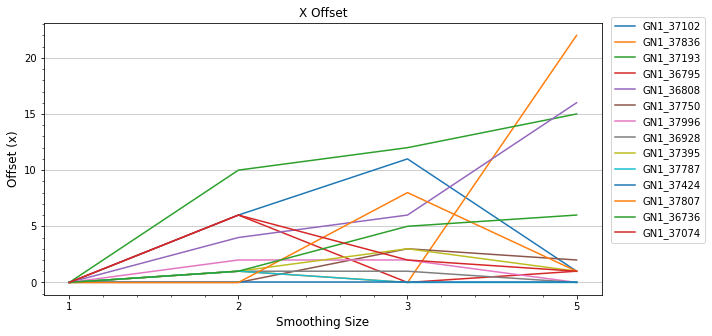

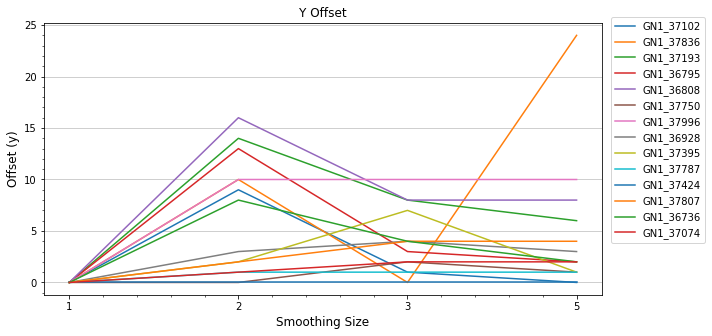

In [128]:
offplotx = []
plt.figure(figsize = (10,5))
plt.title('X Offset')
plt.ylabel('Offset (x)',fontsize = 12)
plt.xlabel('Smoothing Size',fontsize = 12)
for i in range(len(medx_0)):
    offplotx = []
    offplotx.append((np.abs(medx_0[i])))
    offplotx.append((np.abs(medx_2[i])))
    offplotx.append((np.abs(medx_3[i])))
    offplotx.append((np.abs(medx_5[i])))
    plt.grid(axis = 'y',alpha = .75)
    plt.minorticks_on()
    positions=(0,1,2,3)
    ss =("1","2","3","5")
    plt.xticks(positions, ss)
    #plt.plot(offplotx)
    plt.plot(offplotx, label = 'GN1_' + str(Subjects[i]))
    plt.legend(loc='upper center', bbox_to_anchor=(1.1,1.04))
plt.show()

offploty = []
plt.figure(figsize = (10,5))
plt.ylabel('Offset (y)',fontsize = 12)
plt.xlabel('Smoothing Size',fontsize = 12)
plt.title('Y Offset')
for i in range(len(medx_0)):
    offploty = []
    offploty.append((np.abs(medy_0[i])))
    offploty.append((np.abs(medy_2[i])))
    offploty.append((np.abs(medy_3[i])))
    offploty.append((np.abs(medy_5[i])))
    plt.grid(axis = 'y',alpha = .75)
    plt.minorticks_on()
    positions=(0,1,2,3)
    ss =("1","2","3","5")
    plt.xticks(positions, ss)
    plt.plot(offploty, label = 'GN1_' + str(Subjects[i]))
    plt.legend(loc='upper center', bbox_to_anchor=(1.1,1.04))
plt.show()

Now a histogram for both x and y

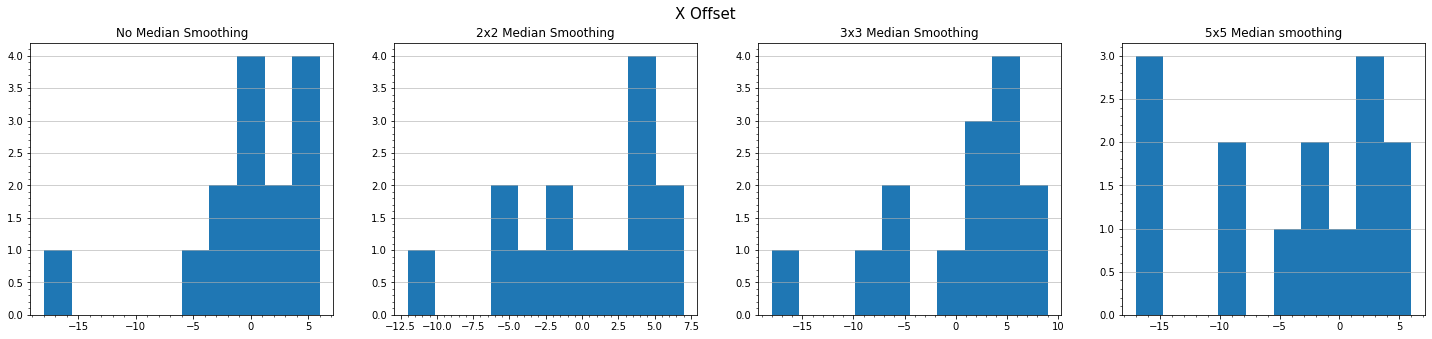

In [130]:
#X offset
plt.figure(figsize=(25,5))

plt.subplot(141)
plt.hist(x_offset_seg_1)
plt.title('No Median Smoothing')
plt.grid(axis = 'y',alpha = .75)
plt.minorticks_on()

plt.subplot(142)
plt.hist(x_offset_seg_2)
plt.title('2x2 Median Smoothing')
plt.grid(axis = 'y',alpha = .75)
plt.minorticks_on()

plt.subplot(143)
plt.hist(x_offset_seg_3)
plt.title('3x3 Median Smoothing')
plt.grid(axis = 'y',alpha = .75)
plt.minorticks_on()

plt.subplot(144)
plt.hist(x_offset_seg_5)
plt.title('5x5 Median smoothing')
plt.grid(axis = 'y',alpha = .75)
plt.minorticks_on()

plt.suptitle('X Offset',fontsize=15)
plt.show()

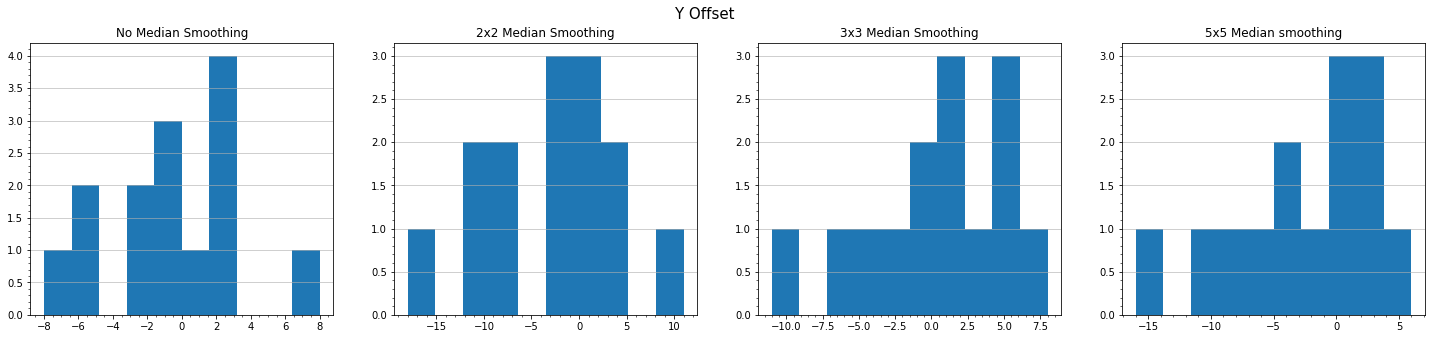

In [131]:
#Y offset
plt.figure(figsize=(25,5))

plt.subplot(141)
plt.hist(y_offset_seg_1)
plt.title('No Median Smoothing')
plt.grid(axis = 'y',alpha = .75)
plt.minorticks_on()

plt.subplot(142)
plt.hist(y_offset_seg_2)
plt.title('2x2 Median Smoothing')
plt.grid(axis = 'y',alpha = .75)
plt.minorticks_on()

plt.subplot(143)
plt.hist(y_offset_seg_3)
plt.title('3x3 Median Smoothing')
plt.grid(axis = 'y',alpha = .75)
plt.minorticks_on()

plt.subplot(144)
plt.hist(y_offset_seg_5)
plt.title('5x5 Median smoothing')
plt.grid(axis = 'y',alpha = .75)
plt.minorticks_on()

plt.suptitle('Y Offset',fontsize=15)
plt.show()

We will stick with a 3x3 median filter for the rest of the data

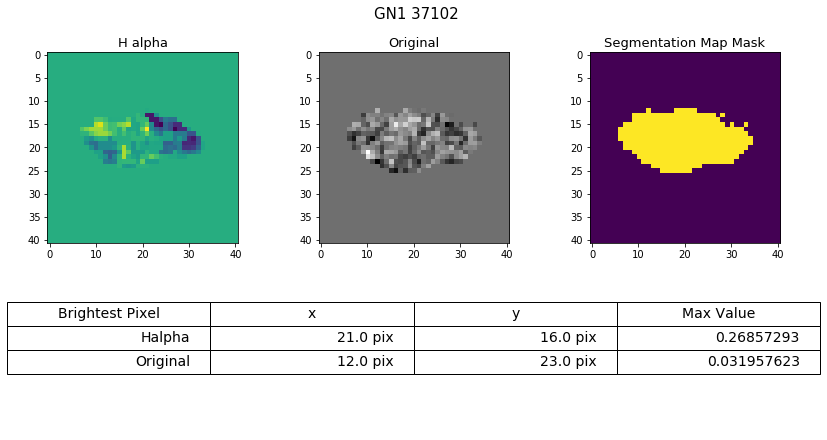

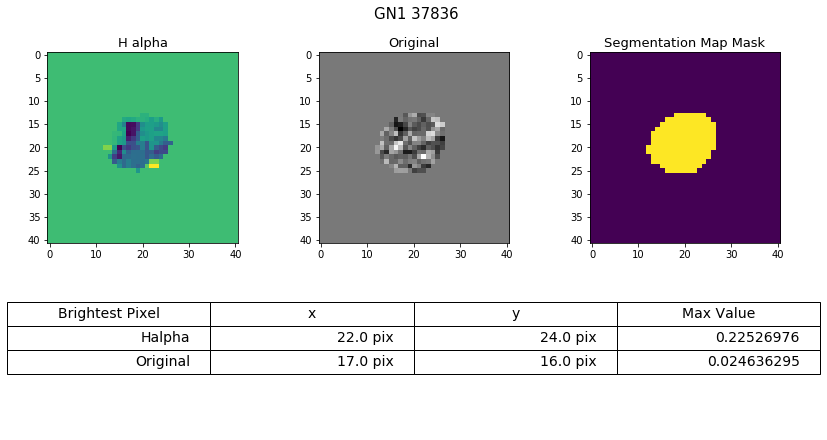

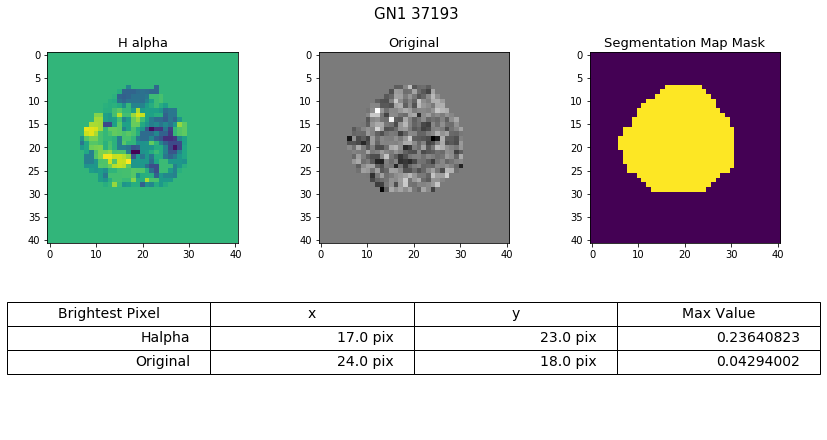

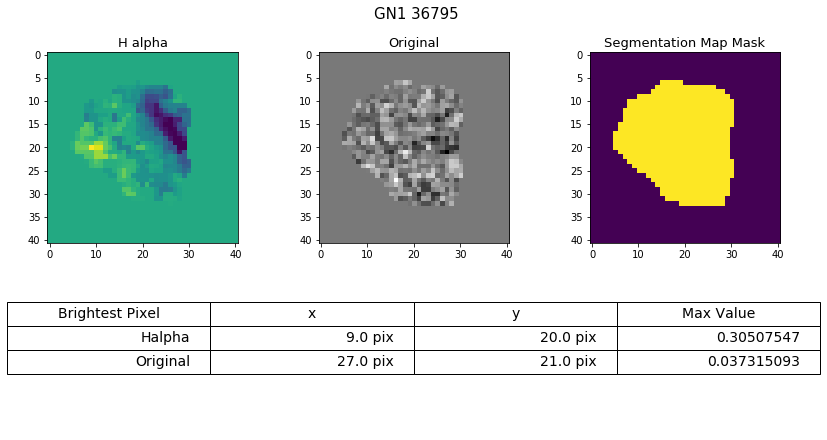

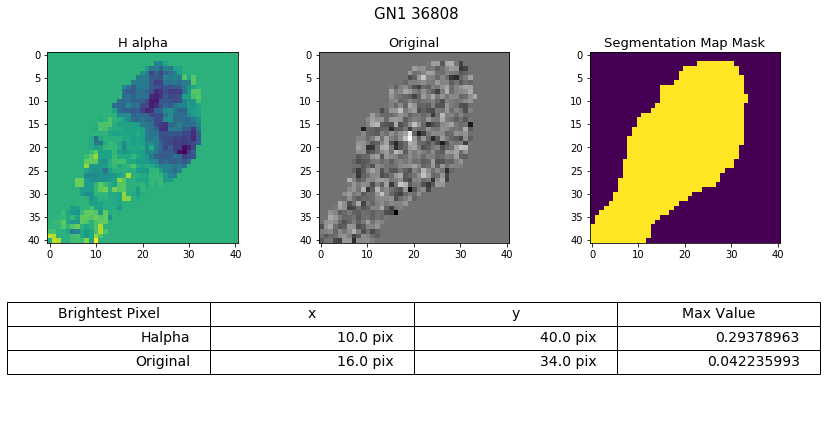

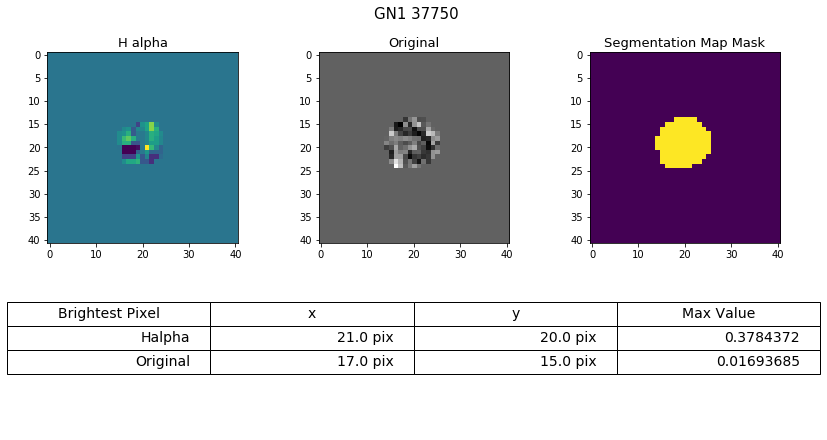

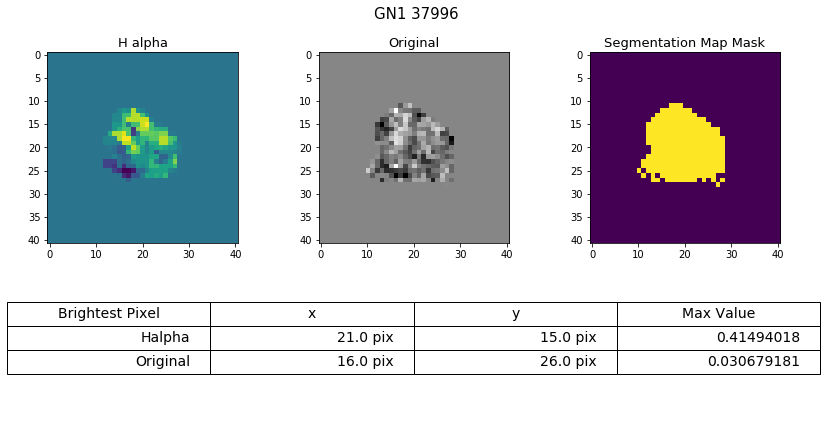

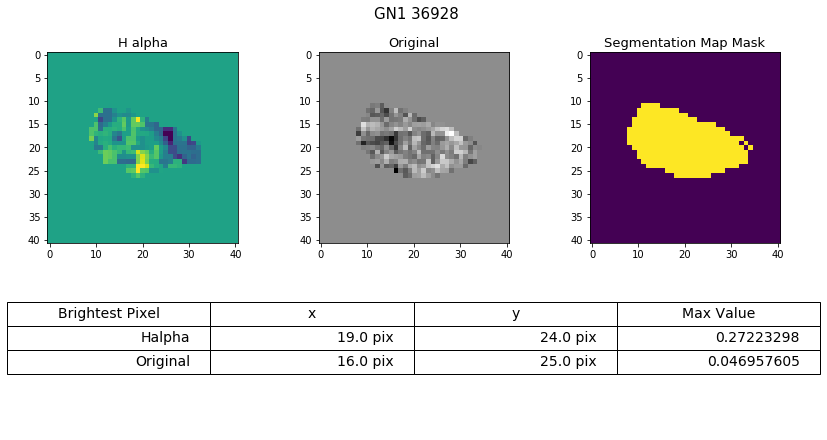

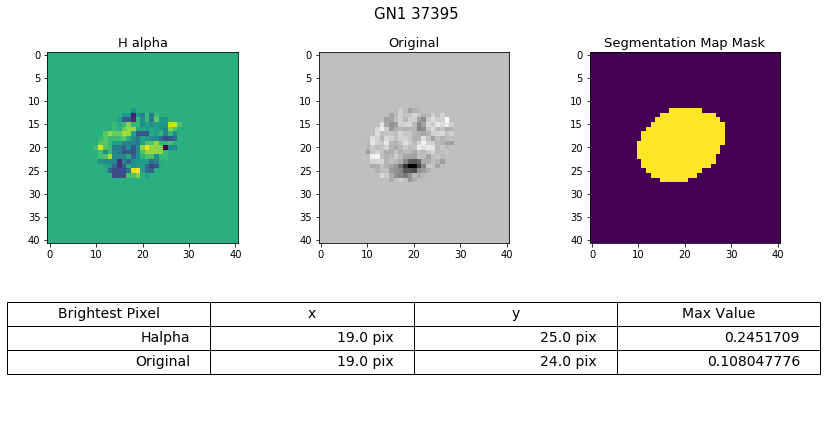

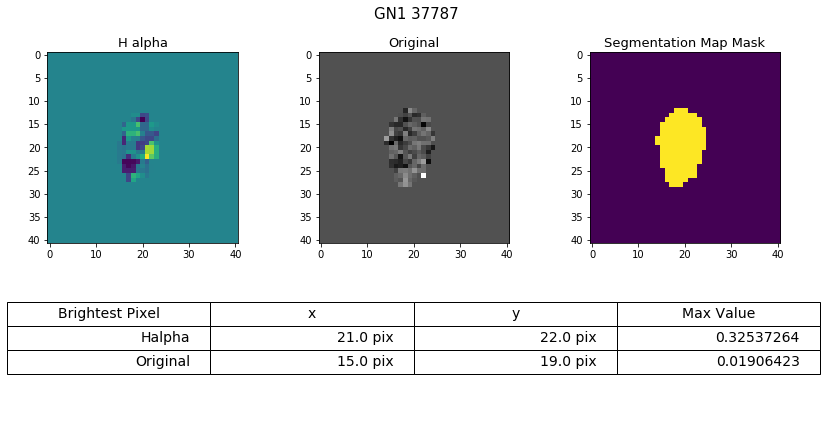

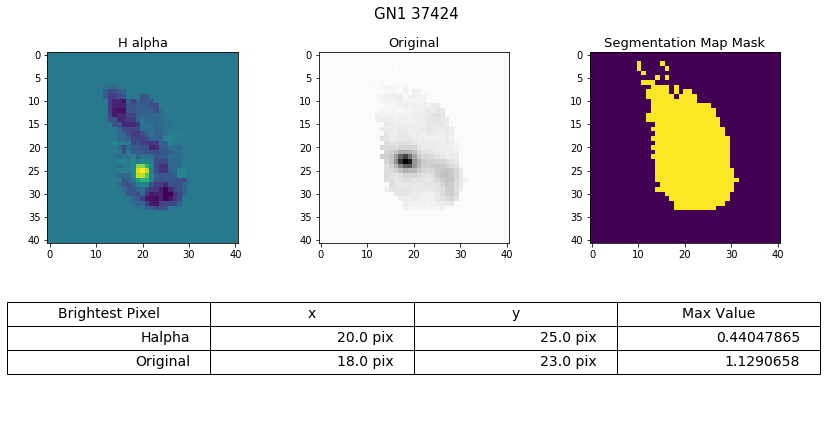

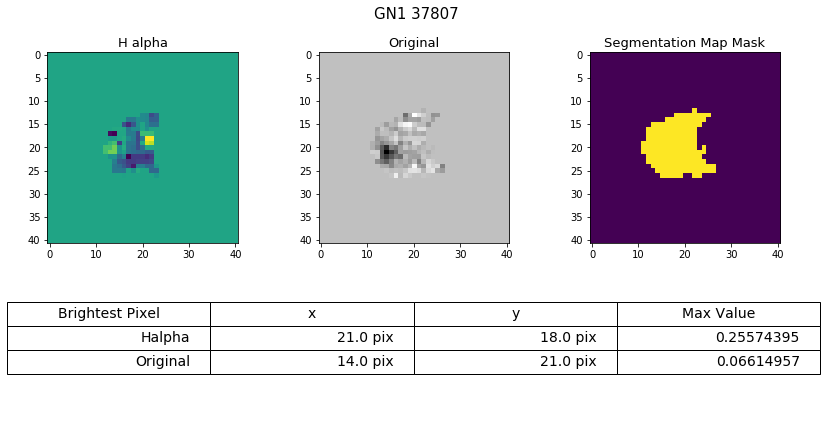

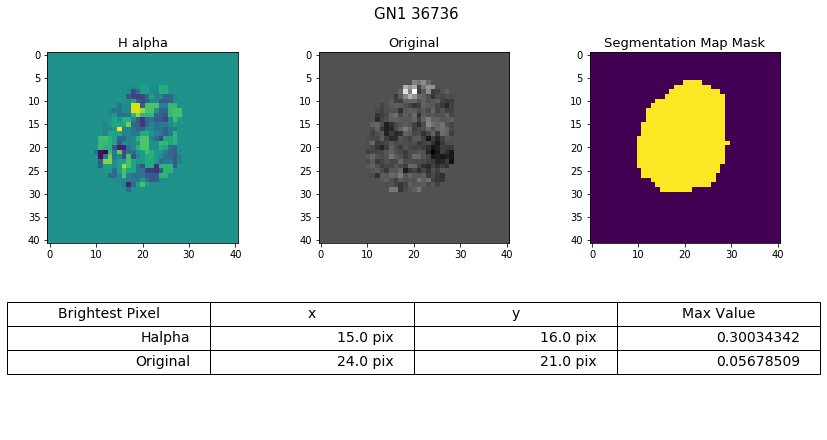

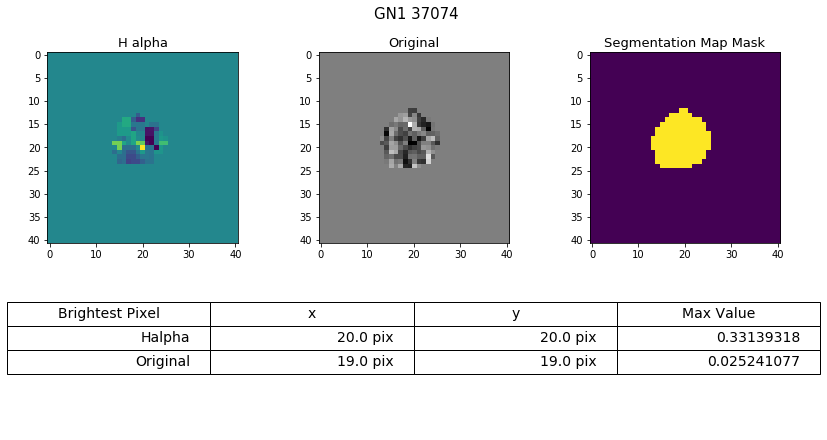

In [133]:
Subjects = GN1
ex = [37271]


Halph = []
Orig = []
Title_fancy = []
Title_save = []
Ha_x = []
Ha_y = []
Orig_x = []
Orig_y = []
x_offset_seg = []
y_offset_seg = []
RealData = []
Mask = []
im_med = []

for i in Subjects:
#Opening all the Ha files
    H_a = fits.open('/Users/felixmartinez/Research/merger_detection/candidates/merger_candidates/GN1/GN1_{}.full.fits'.format(i))
    Ha_fits = '/Users/felixmartinez/Research/merger_detection/candidates/merger_candidates/GN1/GN1_{}.full.fits'.format(i)
    
#Subtracting out the error on the Ha files and Original Image
    Line = H_a['Line','Ha'].data     #Halpha data
    Continuum = H_a['Continuum','Ha'].data
    Contam = H_a['Contam','Ha'].data
    Raw = H_a['DSCI','F105W'].data   #Original Image
    
    Halph.append(Line - Continuum - Contam)  #Fixing the Errors on Halpha
    Orig.append(Raw)
    Title_fancy.append('GN1 {}'.format(i))
    Title_save.append('GN1_{}'.format(i))
    
#Galaxy ID
    GID = i   
    
#X and Y Posistions of Galaxy on Seg Map
    Y,X = np.where(seg_N == GID)
    Z = np.array([Y,X]).T     #Gives the X and Y positions of Object in Y,X
    #rowmin = min(Z.T[0])
    #rowmax = max(Z.T[0])
    #colmin = min(Z.T[1])
    #colmax = max(Z.T[1])
    #world = w.wcs_pix2world(Z,1)  #Gives RA and Dec Values of Object (May not be needed)

#Center Pixel of Ha on Seg Map
    RA = H_a[0].header['RA']                                
    DEC = H_a[0].header['DEC']    

    center = w.wcs_world2pix([[RA,DEC]],1)   #Finds the center pixels of the central RA and Dec of the Ha cutout
    hy = np.round(center[0][0])
    hx = np.round(center[0][1])
    center = np.array([int(hx),int(hy)])

#Making a Mask that is the Galaxy on Seg Map
    seg_mask = seg_N[center[0]-20:center[0]+21,center[1]-20:center[1]+21]
    #seg_mask = seg_N[center[0]-np.abs(center[0]-rowmin):center[0]+np.abs(center[0]-rowmax),
    #                 center[1]-np.abs(center[1]-colmin):center[1]+np.abs(center[1]-colmax)]
    seg_mask[seg_mask != GID] = 0
    seg_mask[seg_mask == GID] = 1
    
    Mask.append(np.array(seg_mask))


for j in range(len(Subjects)):

       
#Cropping the Ha and Orig Images to fit the size of Seg map
    Ha_img = Halph[j][20:61,20:61]
    Orig_img = Orig[j][20:61,20:61]
    
#Applying the Segmentation Map Mask
    Ha_img[Mask[j] == 0]=0
    Orig_img[Mask[j] == 0]=0
    
#Applying the Filter to the original images
    m=np.percentile(Ha_img,1.5)
    M=np.percentile(Ha_img,98.5)
    if M < np.abs(m)*6:
        M = np.abs(m)*6
    RealData.append(func.scaling_factor(Ha_img, m, M))
    im_med.append(ndimage.median_filter(RealData[j], size = (3,3)))

#Finding the Position of the Brightest Pixel and its value
    #Ha_position = np.argwhere(RealData[j] == RealData[j].max()) * u.pixel
    #Ha_max_value = np.amax(RealData[j])
    Ha_position = np.argwhere(im_med[j] == im_med[j].max()) * u.pixel
    Ha_max_value = np.amax(im_med[j])

    Orig_position = np.argwhere(Orig_img == Orig_img.max()) * u.pixel
    Orig_max_value = np.amax(Orig_img) 

#Appending the x and y for the Histogram
    Ha_x.append(Ha_position[0][1])
    Ha_y.append(Ha_position[0][0])
    Orig_x.append(Orig_position[0][1])
    Orig_y.append(Orig_position[0][0])
    
    x_offset_seg.append(Ha_x[j].value - Orig_x[j].value)
    y_offset_seg.append(Ha_y[j].value - Orig_y[j].value)

#Making a table with Information of the Pixels location and values
    Test = {'Ha_x':pd.Series(Ha_position[0][1]), 'Ha_y':pd.Series(Ha_position[0][0]),
        'Ha_max_value':pd.Series(Ha_max_value),'Orig_x':pd.Series(Orig_position[0][1]),
        'Orig_y':pd.Series(Orig_position[0][0]),'Orig_max_value':pd.Series(Orig_max_value)}
    Position_table = pd.DataFrame(Test)    
    Labels=['Brightest Pixel','x','y','Max Value']
    table_data=[['Halpha',Ha_position[0][1],Ha_position[0][0],Ha_max_value],
                ['Original',Orig_position[0][1],Orig_position[0][0],Orig_max_value]]

#Making the Images
    plt.figure(figsize=[17,7])
    gs = GridSpec(2,6, wspace = -.499, hspace=0)
    
    plt.subplot(gs[0,1])    #Halpha Image
    plt.title('H alpha',fontsize = 13)
    #plt.imshow(Ha_img)
    plt.imshow(im_med[j])

    plt.subplot(gs[0,3])    #Original Image
    plt.title('Original',fontsize = 13)
    plt.imshow(Orig_img,cmap='binary')
    
    plt.subplot(gs[0,5])    #Seg Map Image
    plt.title('Segmentation Map Mask',fontsize = 13)
    plt.imshow(Mask[j])

    ax = plt.subplot(gs[1,1:])   #Tabel Below
    table = ax.table(table_data,colLabels=Labels,loc='center')
    table.set_fontsize(14)
    table.scale(1,2)
    ax.axis('off')
    
    plt.suptitle(Title_fancy[j],x=.57,y=.97,fontsize=15)
    #plt.savefig('/Users/felixmartinez/Research/Mergers_Images/'+Title_save[j]+'.png',bbox_inches = 'tight')

# Reevaluating our Data
Now that we have randomness out of our data, we will select our data based on different sigma values to pull out any outliers that will skew our findings.

### Doing a 1 Sigma Selection:

68% Overall viewing <br>
Low bound: 0.16 <br>
High bound: 0.84

First we must plot what region we will be observing:

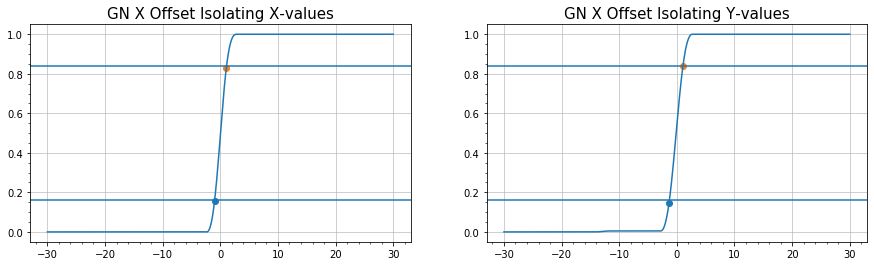

In [4]:
summed_x = np.cumsum(corrected_x / np.trapz(corrected_x,xrange))/max(np.cumsum(corrected_x / np.trapz(corrected_x,xrange)))
summed_y = np.cumsum(corrected_y / np.trapz(corrected_y,xrange))/max(np.cumsum(corrected_y / np.trapz(corrected_y,yrange)))

low_bound = .16
high_bound = .84

#finding the intersections between the lines
y_low_1 = np.argwhere(np.diff(np.sign(summed_y - low_bound))).flatten()
y_high_1 = np.argwhere(np.diff(np.sign(summed_y - high_bound))).flatten()

x_low_1 = np.argwhere(np.diff(np.sign(summed_x - low_bound))).flatten()
x_high_1 = np.argwhere(np.diff(np.sign(summed_x - high_bound))).flatten()

#plotting:
plt.figure(figsize=[15,4])

plt.subplot(121)
plt.title("GN X Offset Isolating X-values", fontsize = 15)
plt.minorticks_on()
plt.grid(alpha = .75)
plt.plot(xrange, summed_x)
plt.scatter(xrange[x_low_1], summed_x[x_low_1])
plt.scatter(xrange[x_high_1], summed_x[x_high_1])
plt.axhline(low_bound)
plt.axhline(high_bound)

plt.subplot(122)
plt.title("GN X Offset Isolating Y-values", fontsize = 15)
plt.minorticks_on()
plt.grid(alpha = .75)
plt.plot(yrange, summed_y)
plt.scatter(yrange[y_low_1], summed_y[y_low_1])
plt.scatter(yrange[y_high_1], summed_y[y_high_1])
plt.axhline(low_bound)
plt.axhline(high_bound)

plt.show()

In [5]:
print("x intercepts for the X offset are: " + str(round(xrange[x_low_1[0]],1)) + " for the lower bound and: " 
      + str(round(xrange[x_high_1[0]],1)) + " for the upper bound.")
print("x intercepts for the Y offset are: " + str(round(yrange[y_low_1[0]],1)) + " for the lower bound and: " 
      + str(round(yrange[y_high_1[0]],1)) + " for the upper bound.")

x intercepts for the X offset are: -1.0 for the lower bound and: 1.1 for the upper bound.
x intercepts for the Y offset are: -1.4 for the lower bound and: 1.1 for the upper bound.


Applying these cuttoffs into the selection:

/Users/felixmartinez/Research/scripts/functions.py:145: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=[17,7])


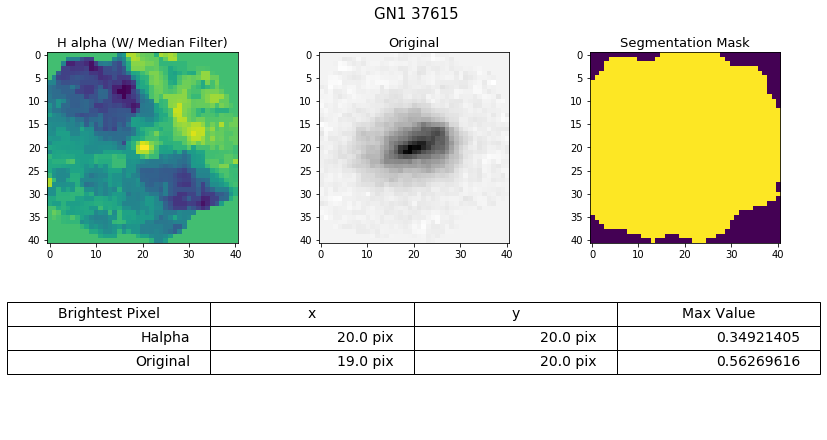

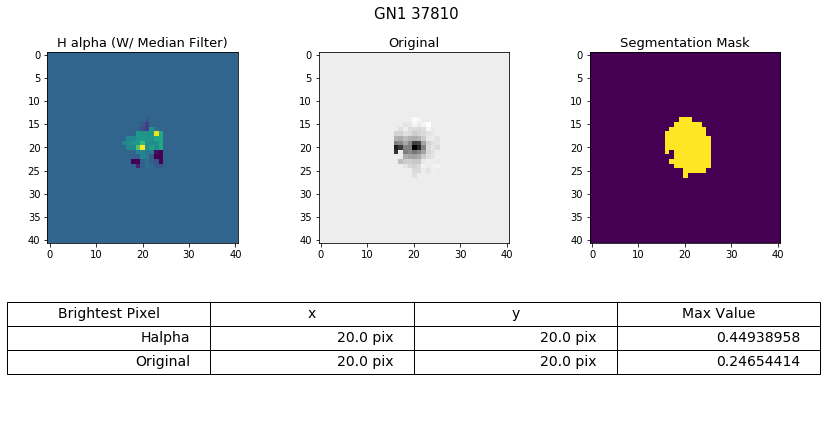

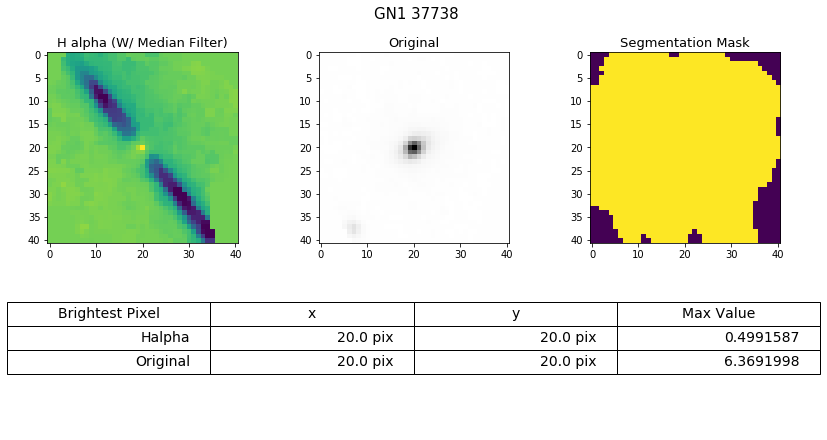

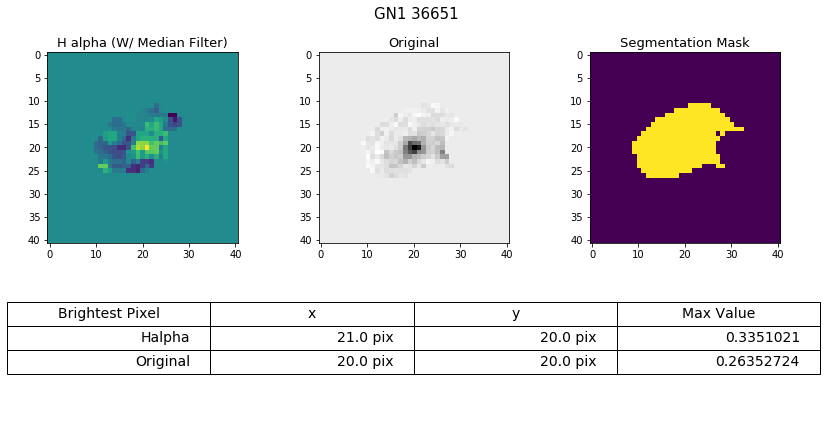

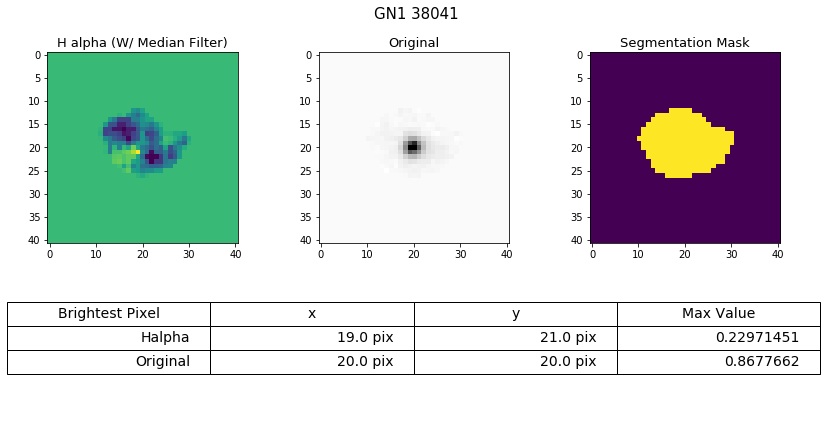

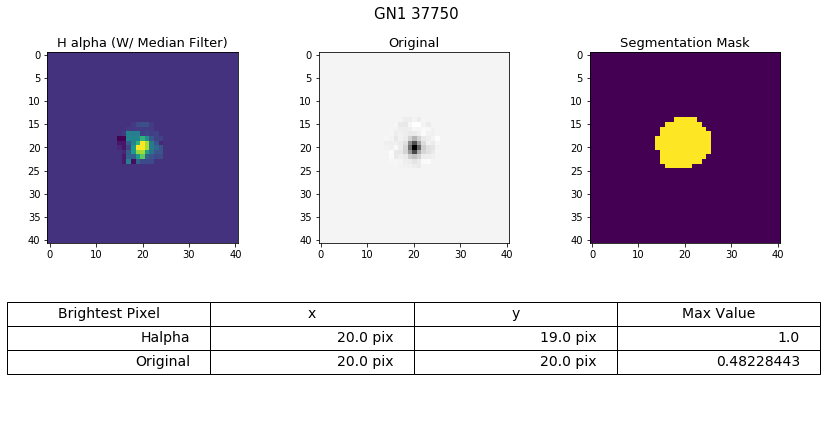

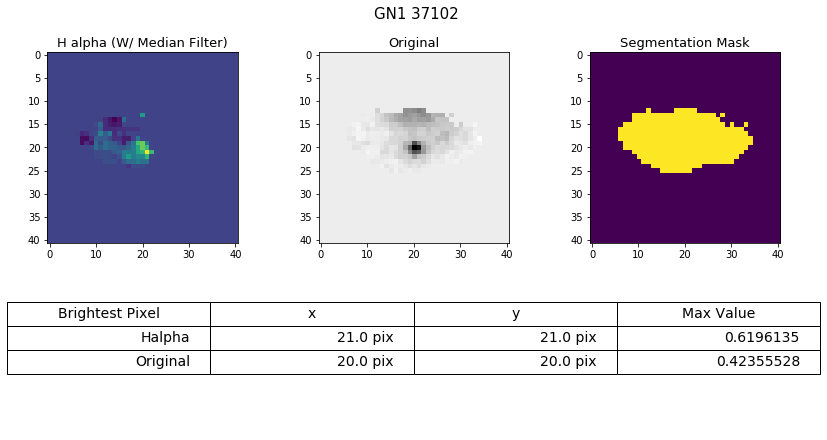

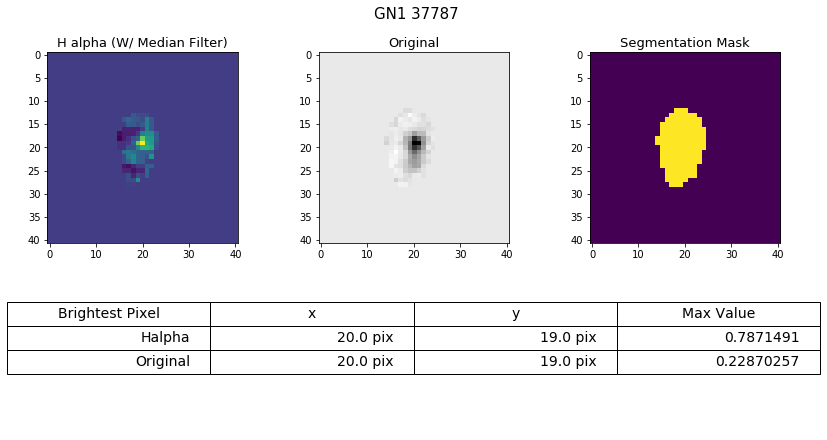

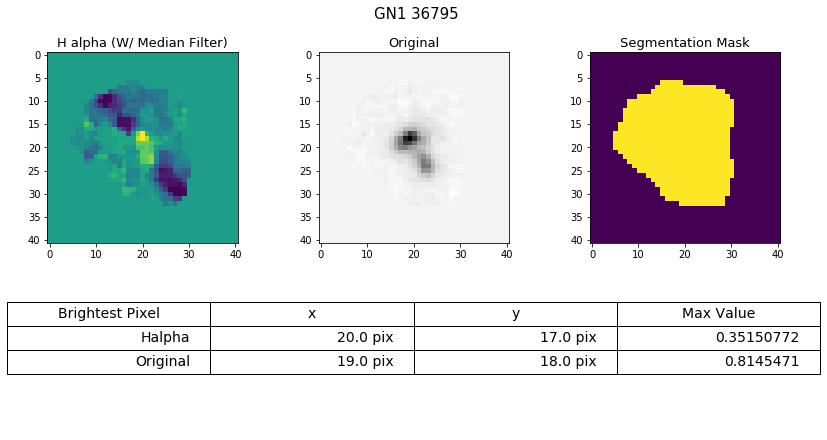

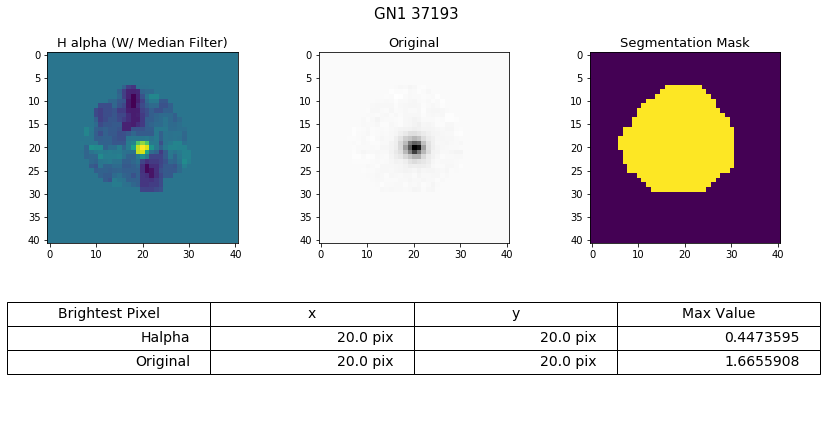

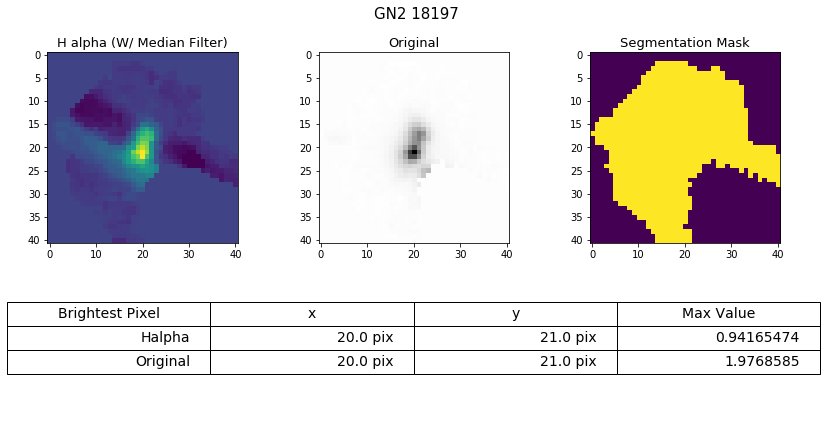

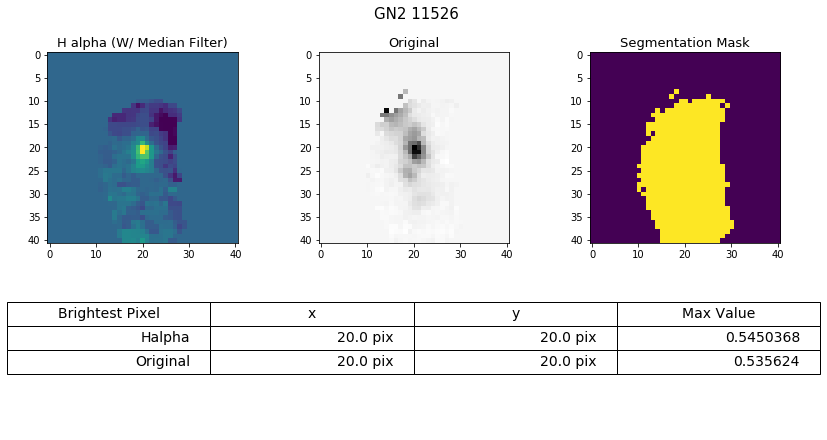

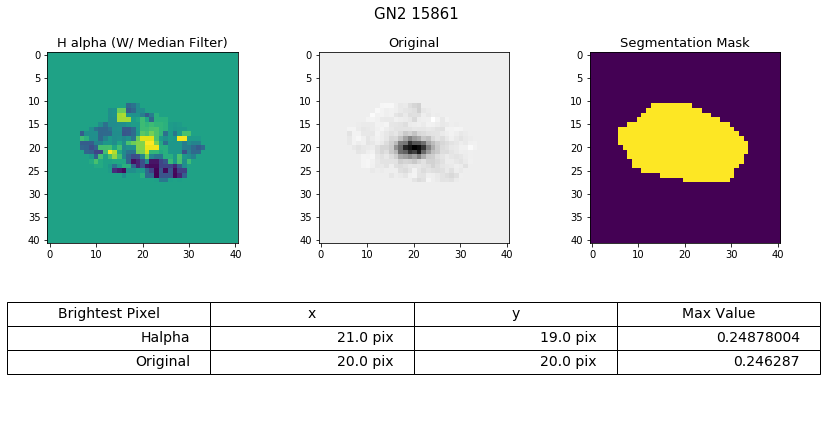

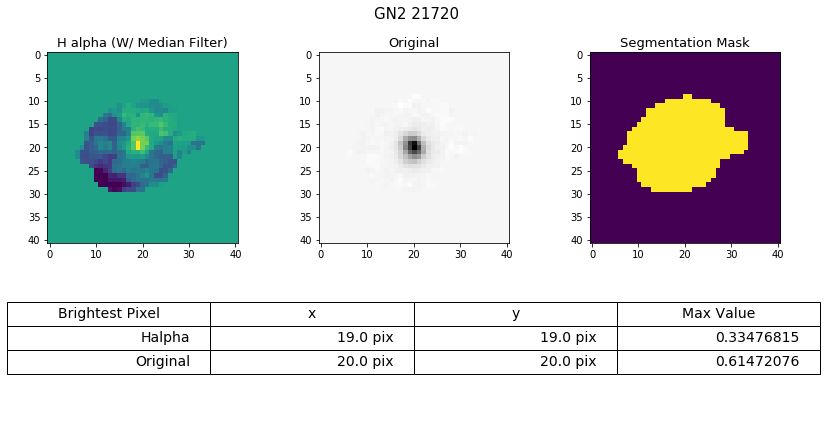

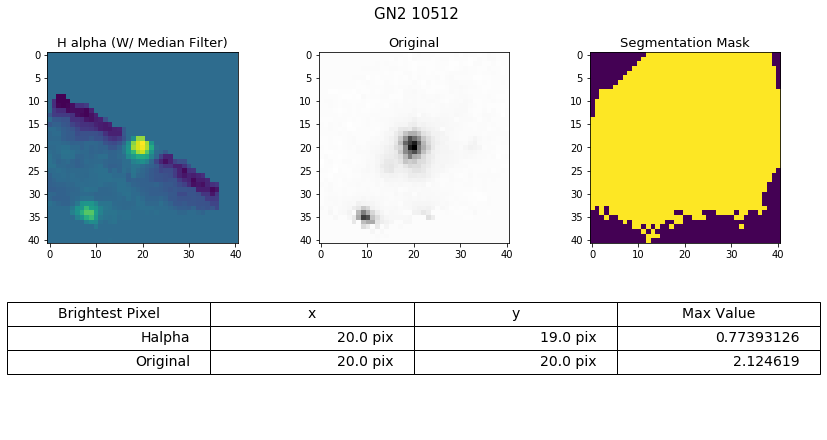

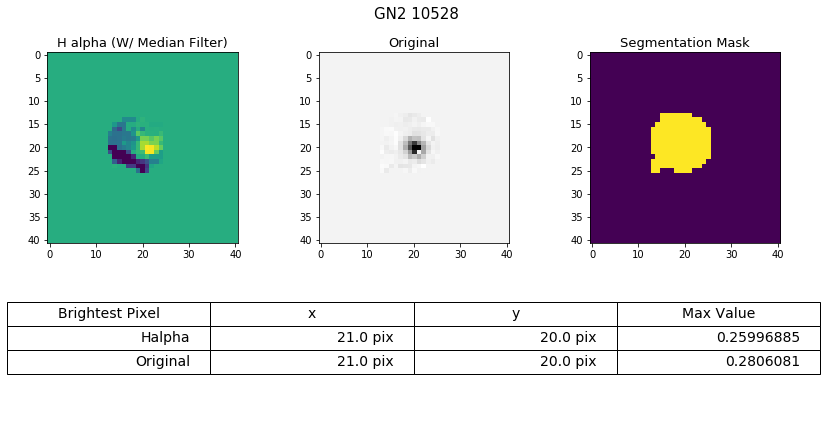

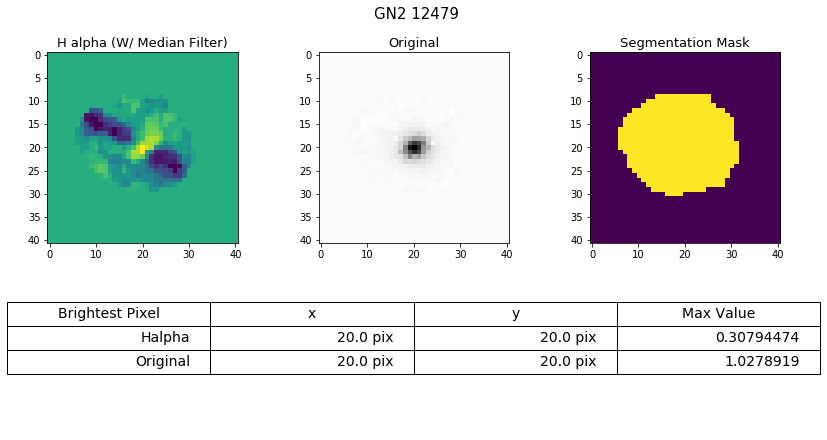

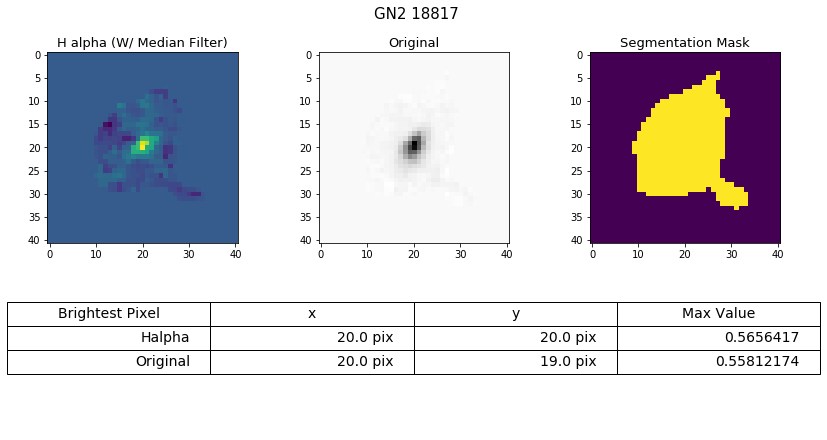

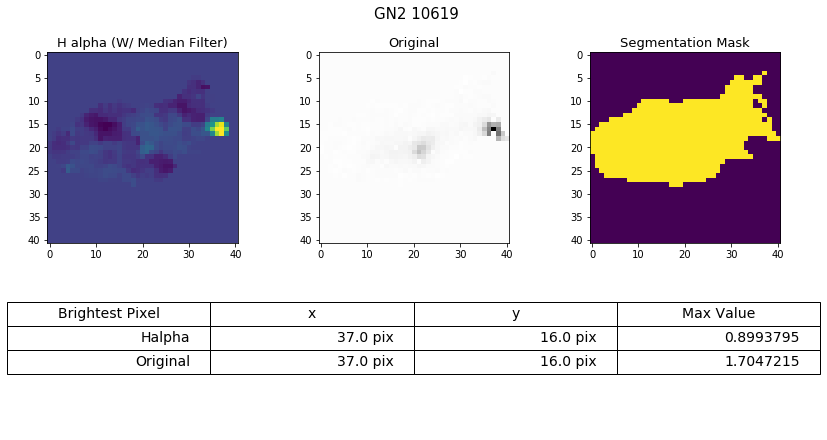

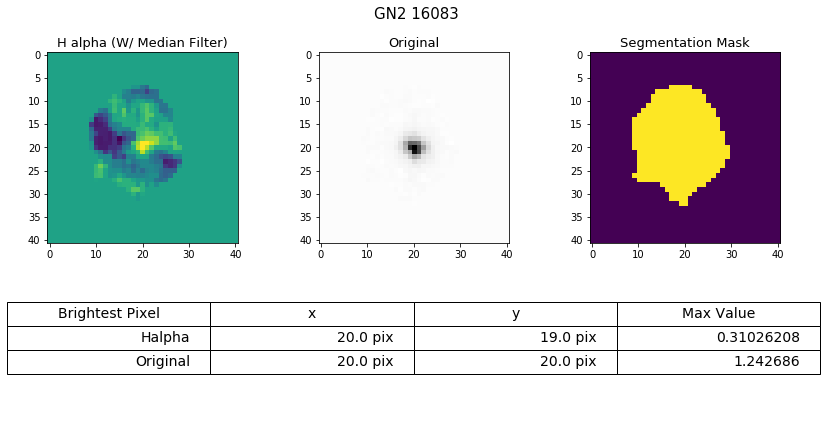

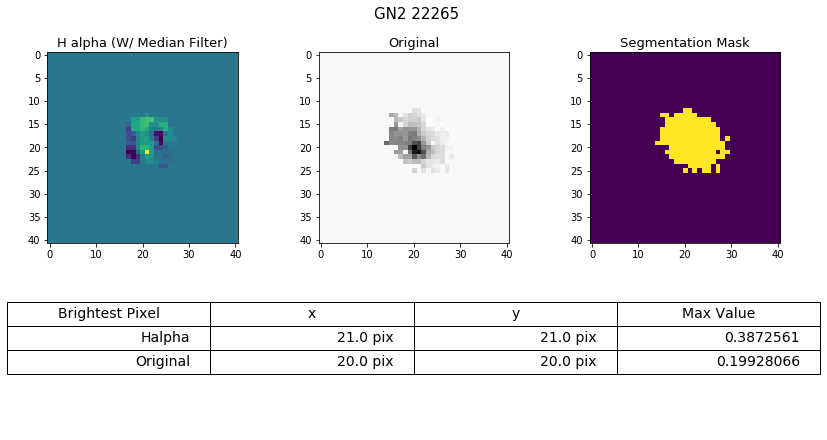

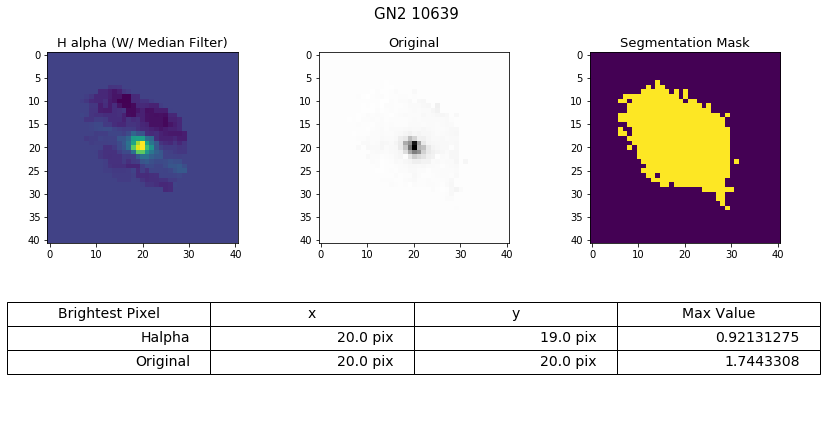

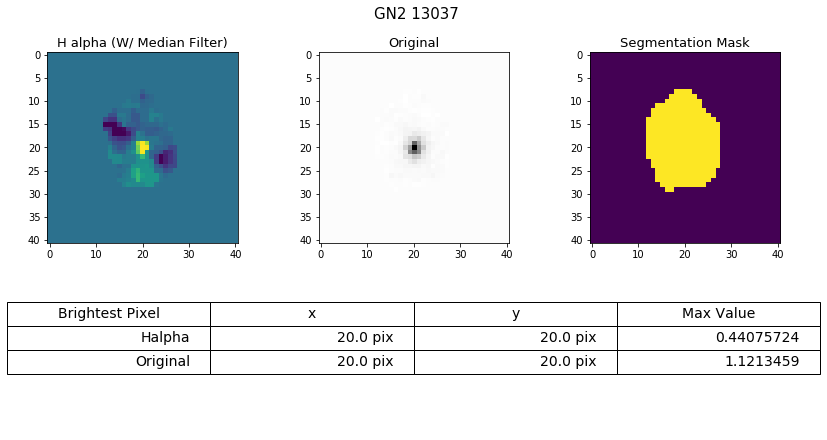

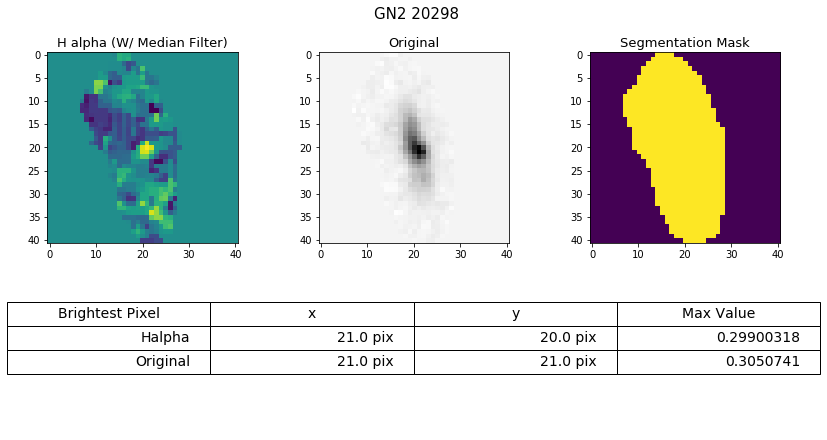

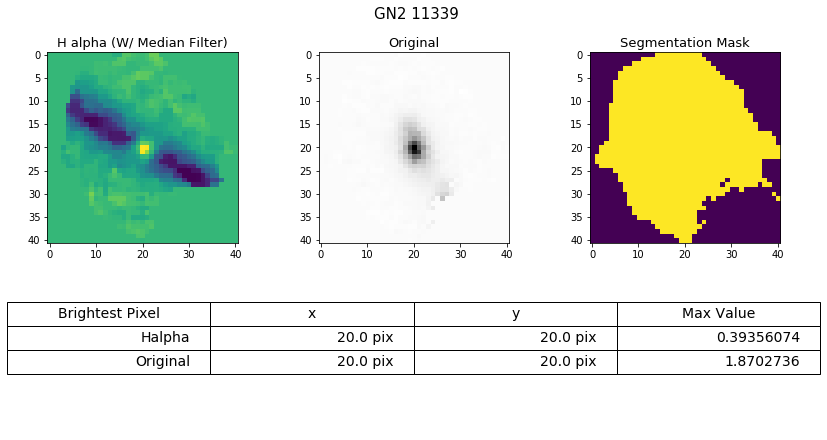

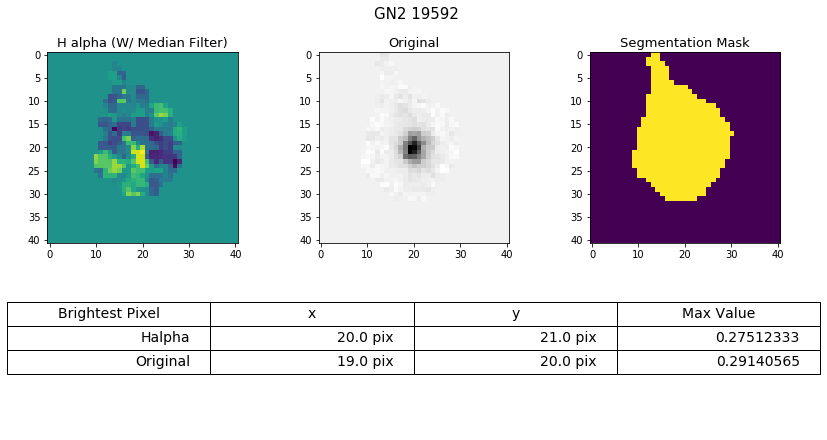

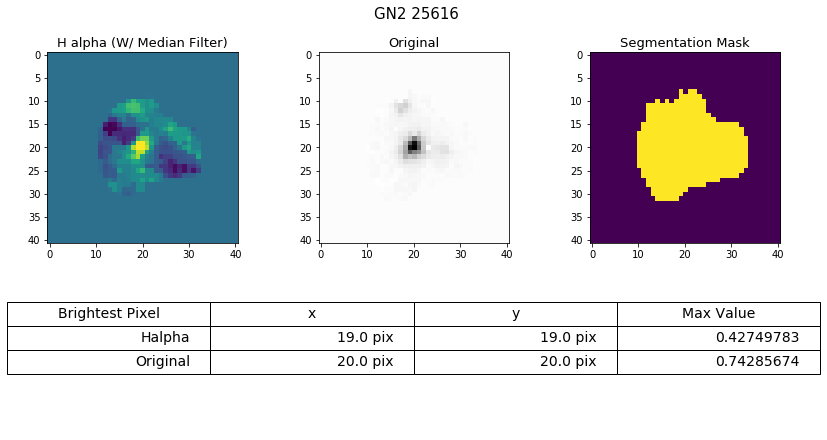

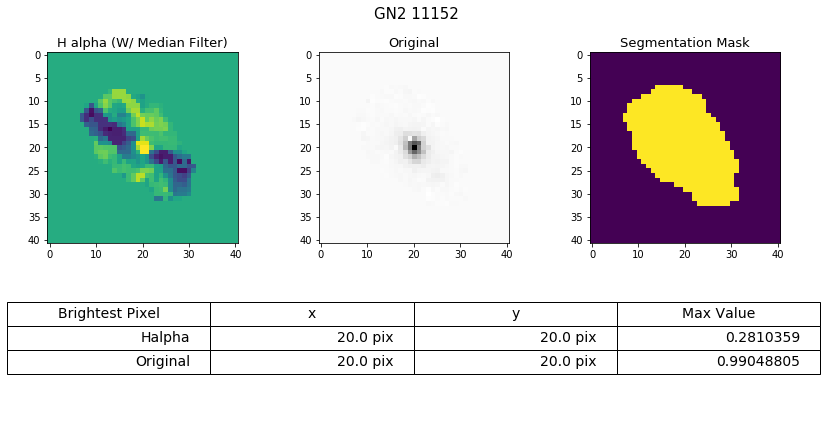

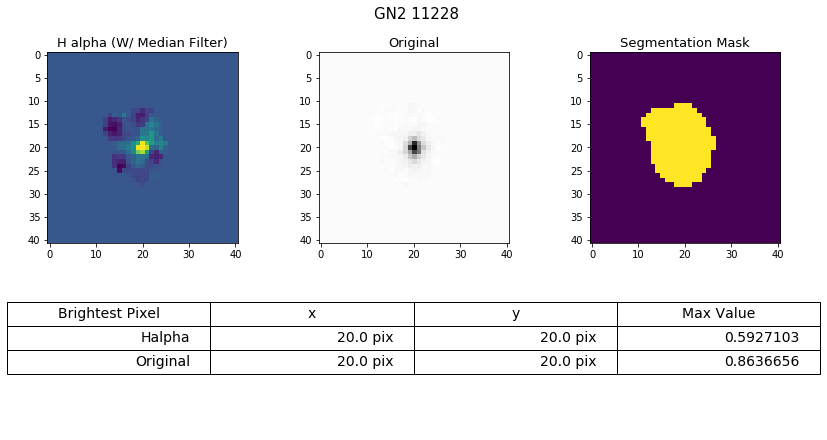

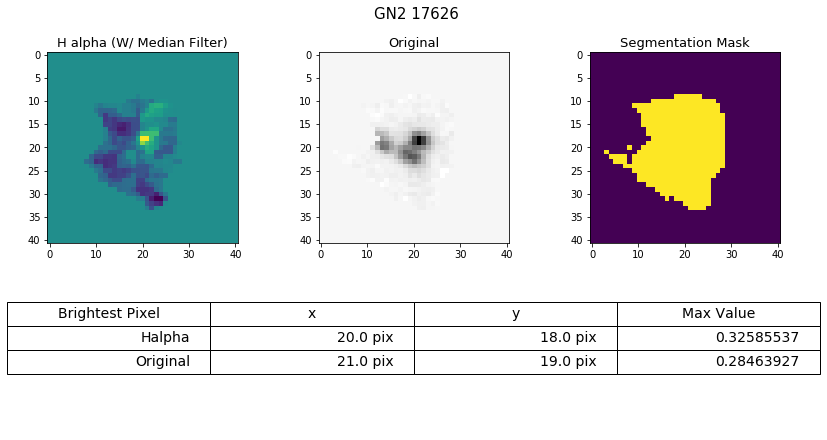

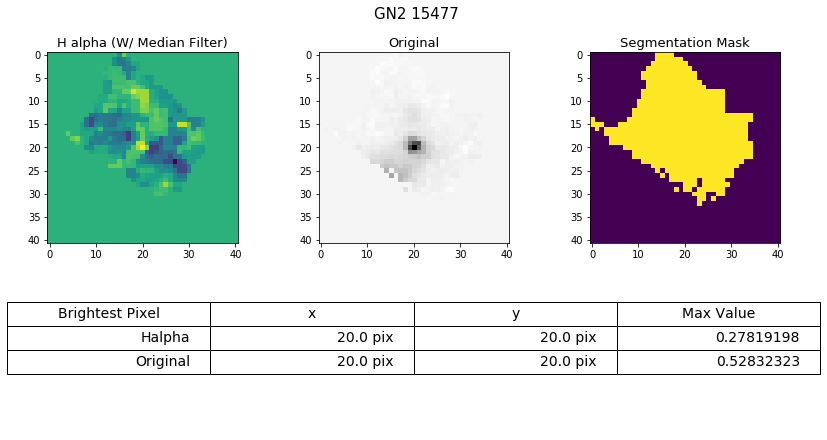

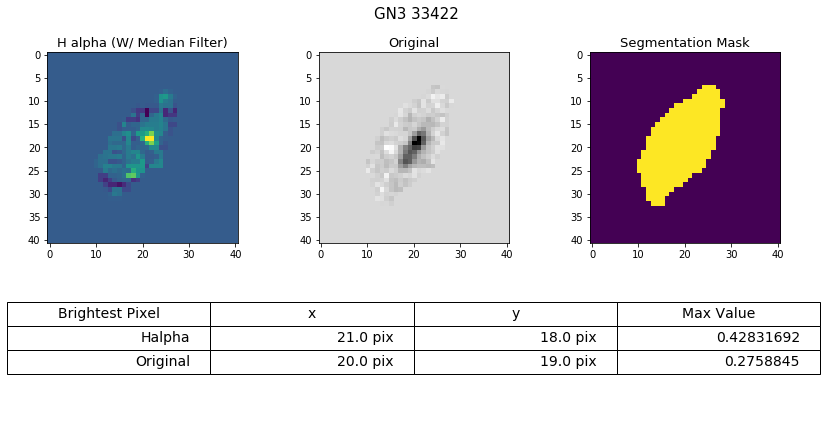

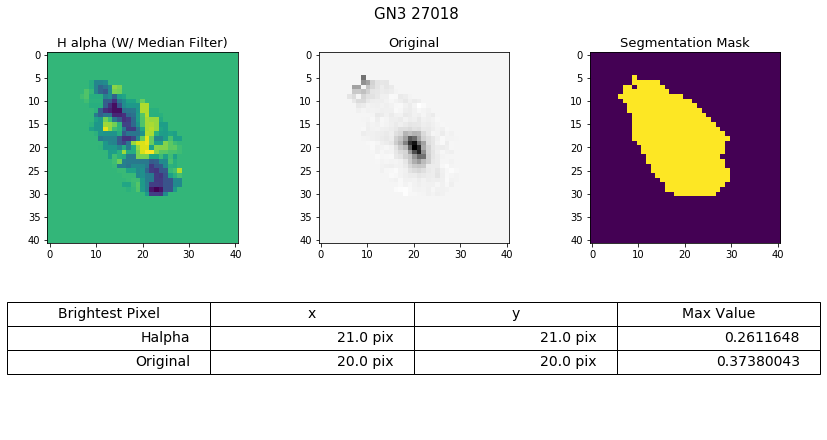

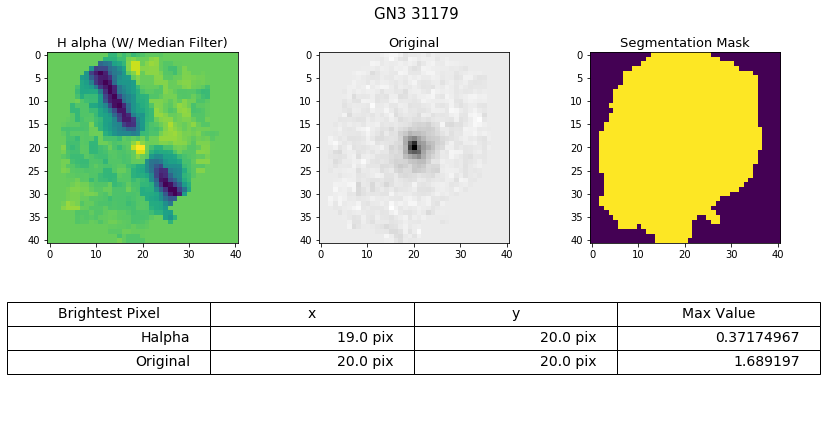

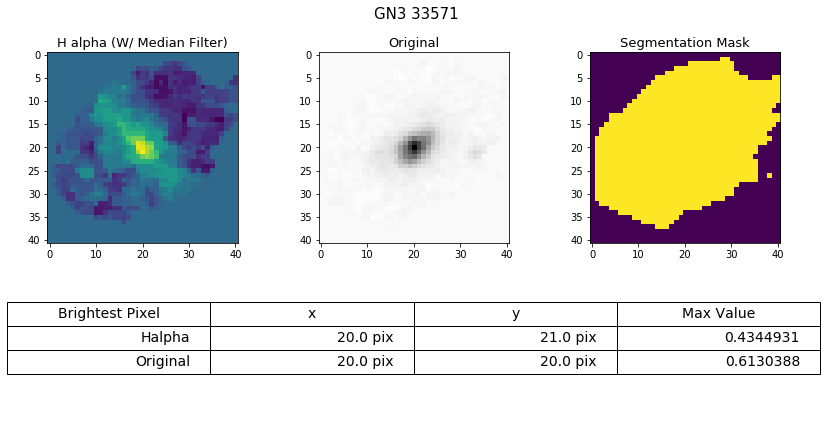

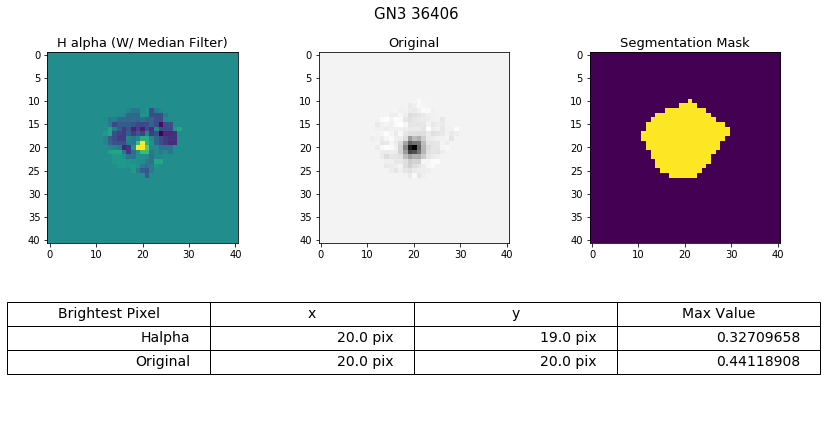

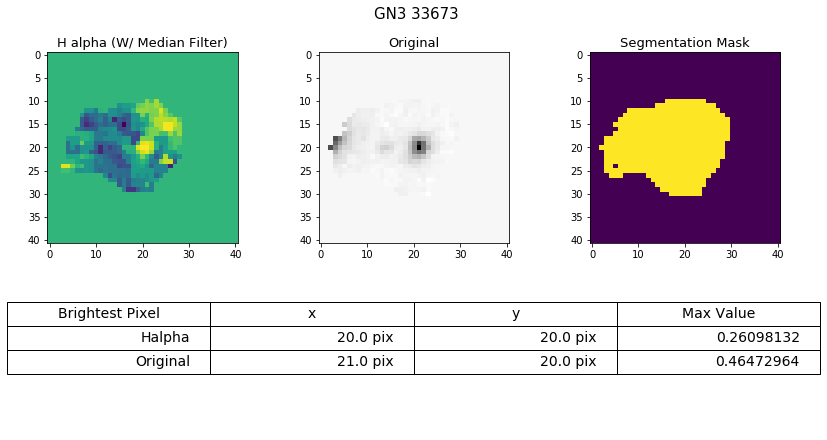

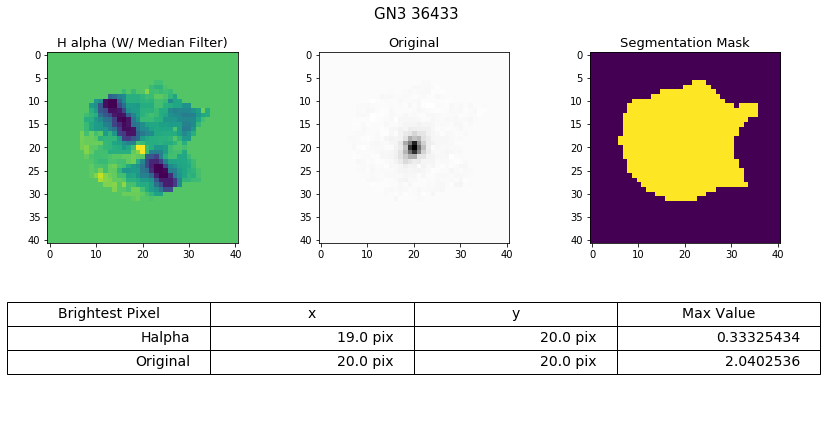

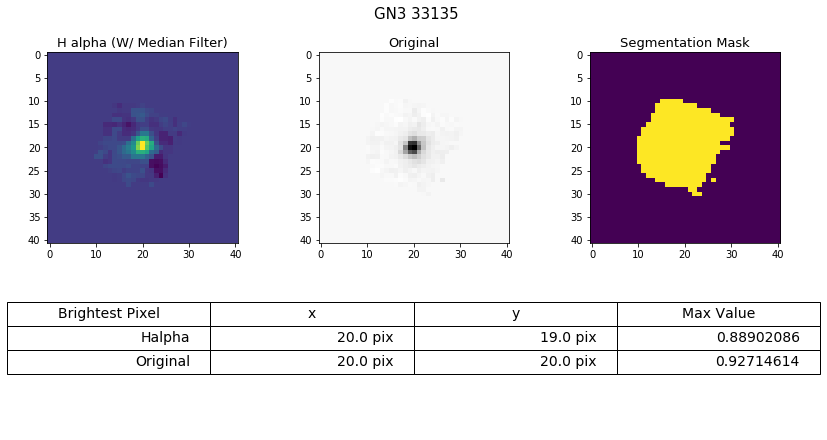

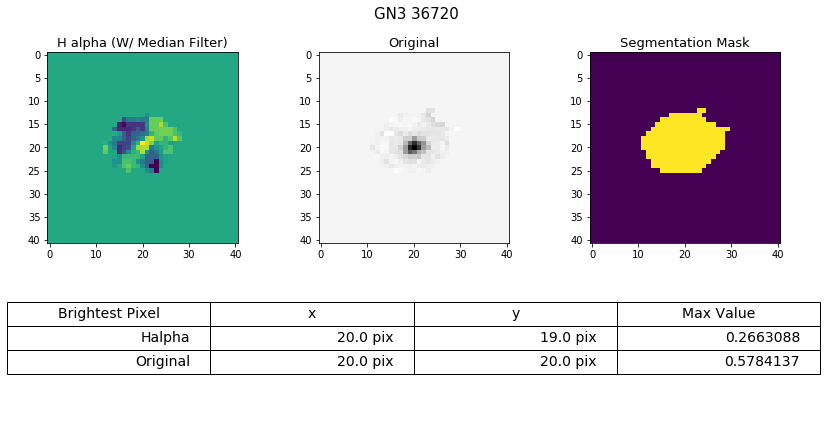

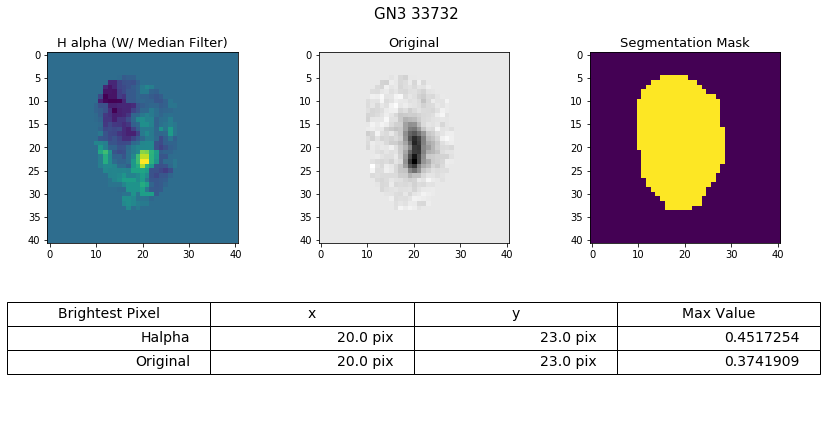

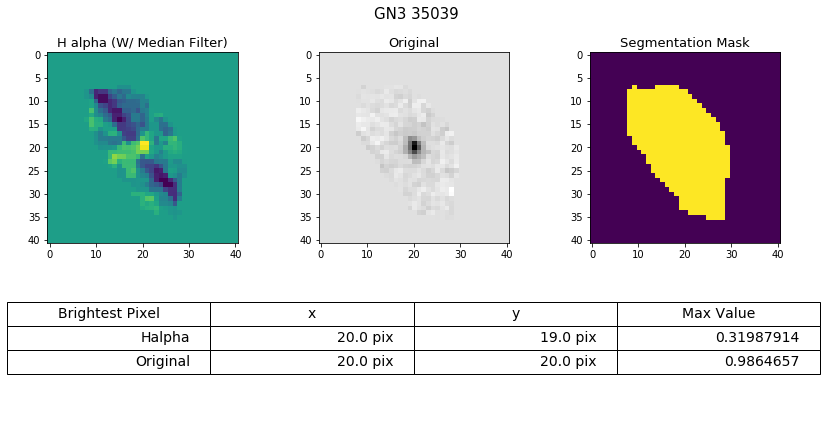

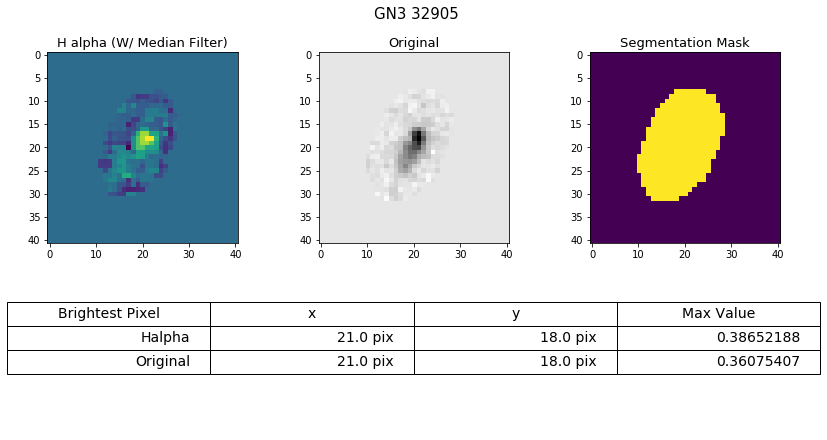

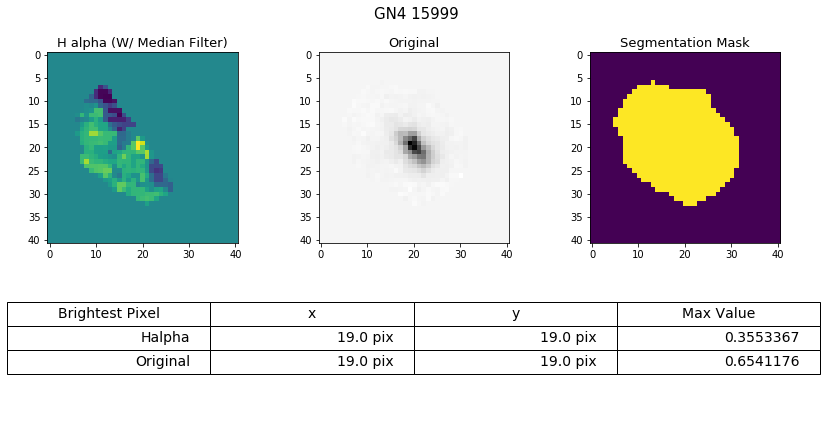

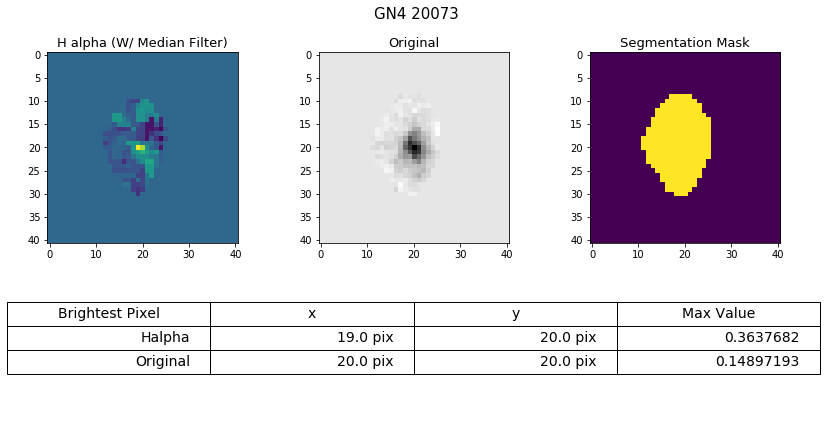

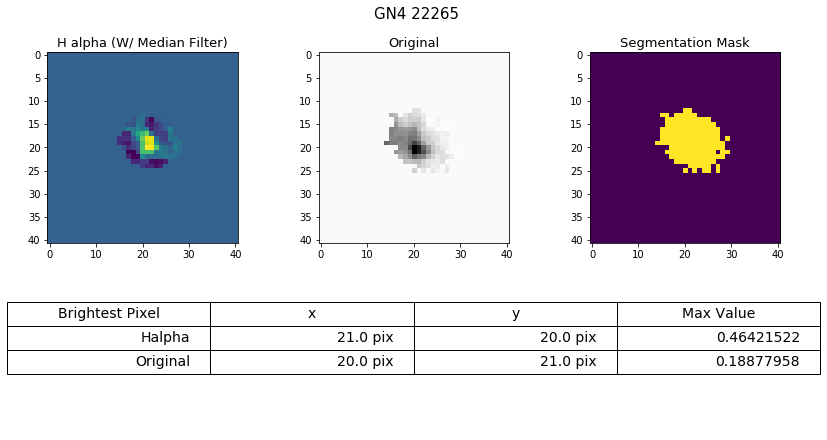

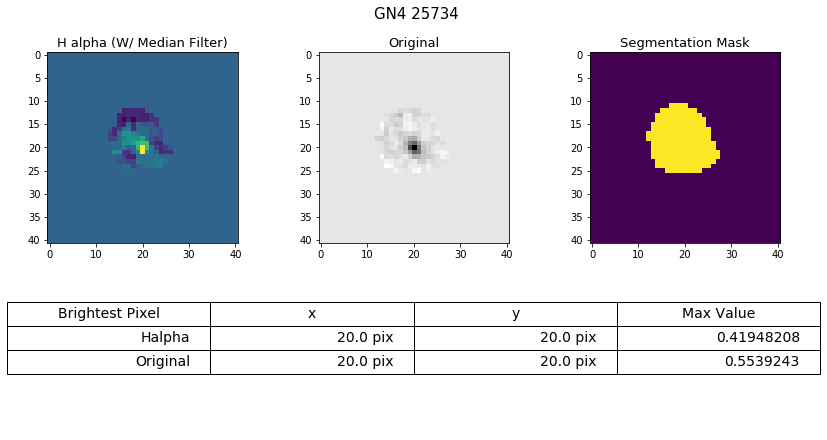

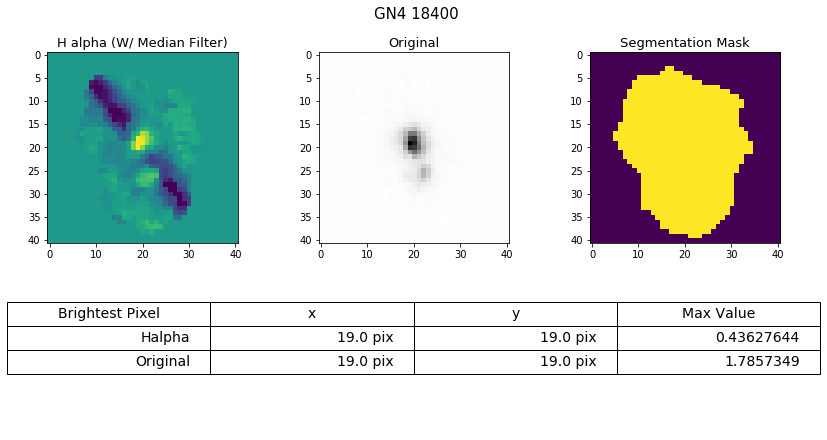

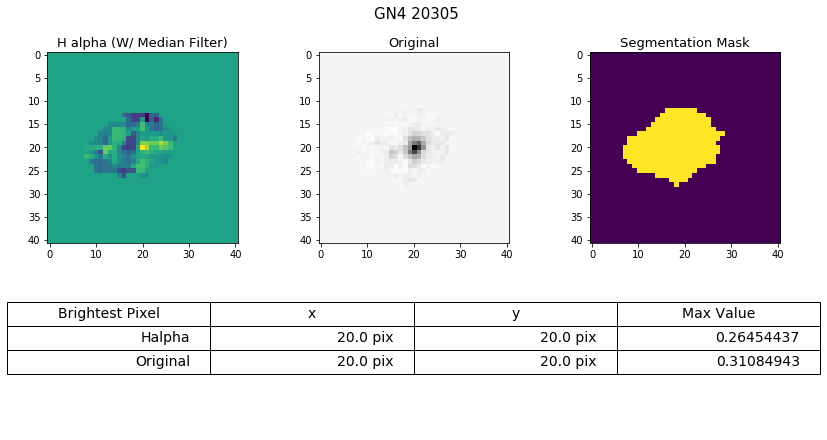

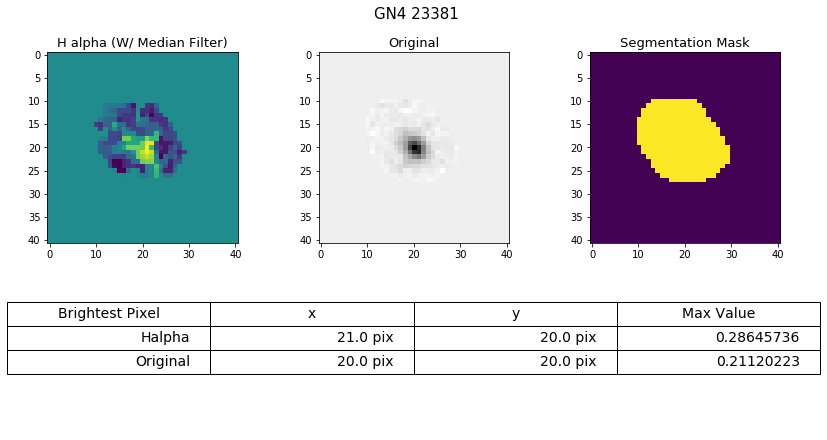

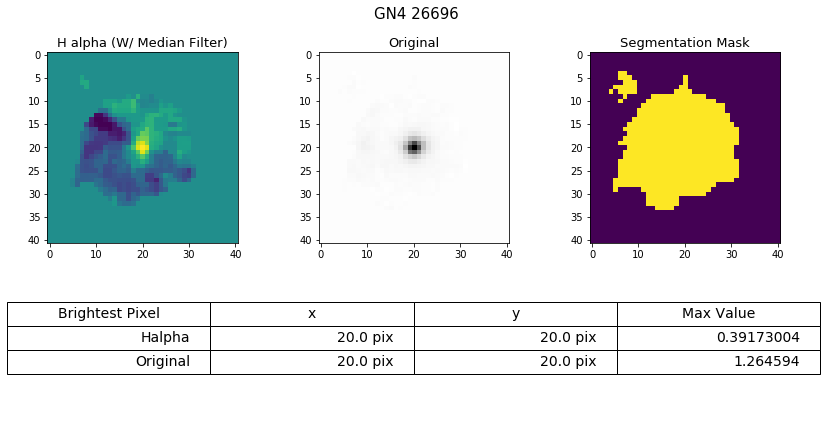

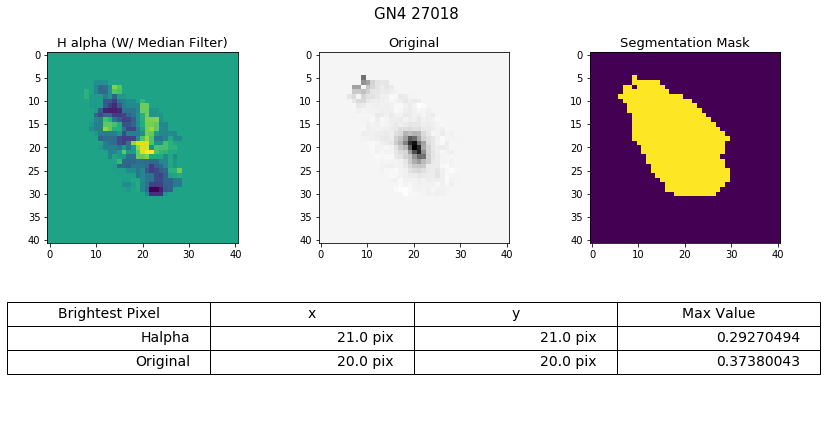

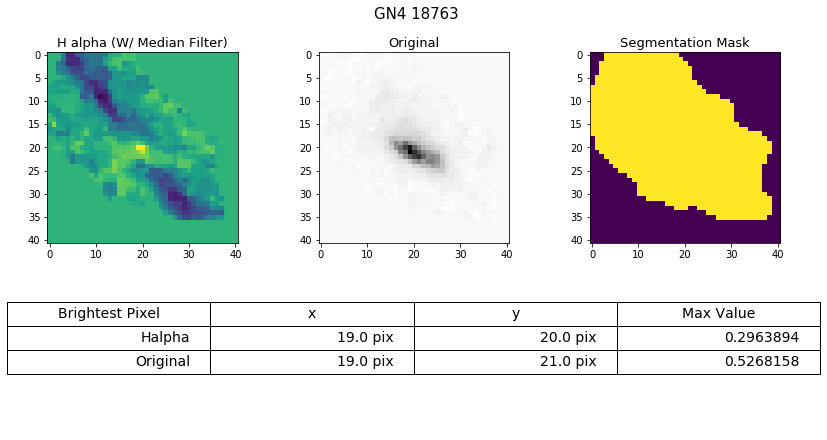

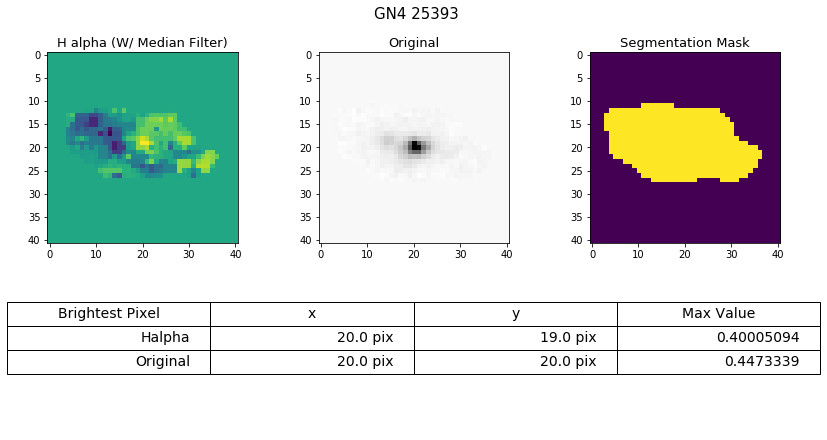

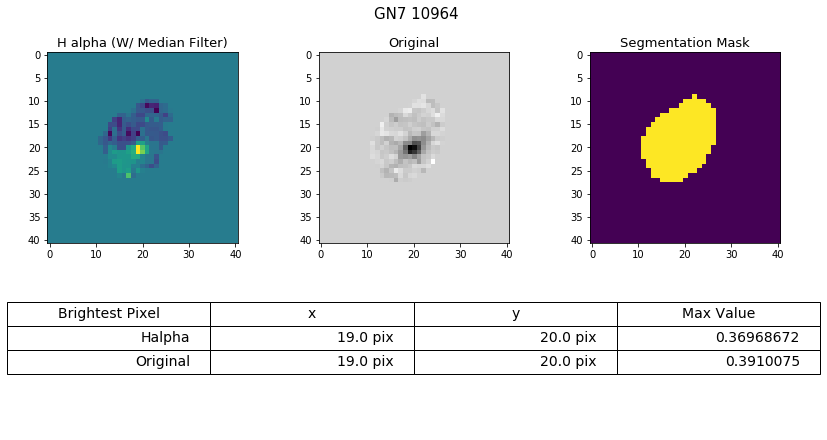

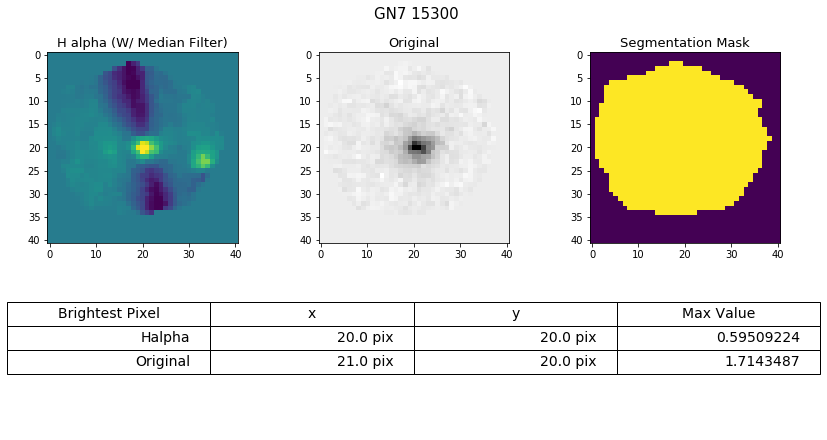

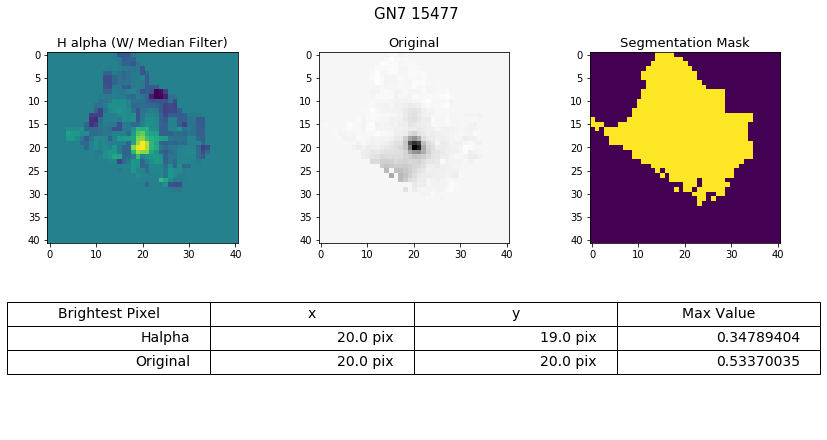

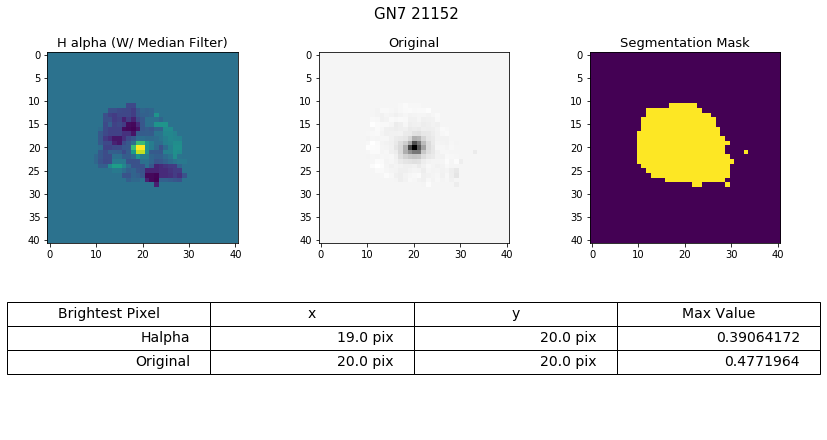

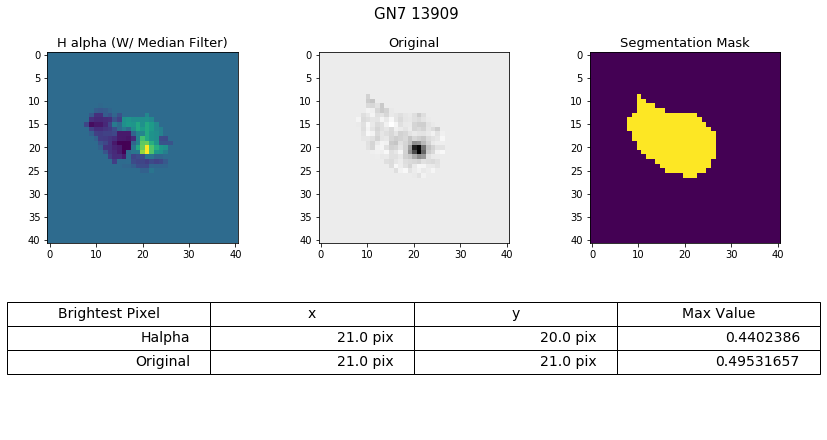

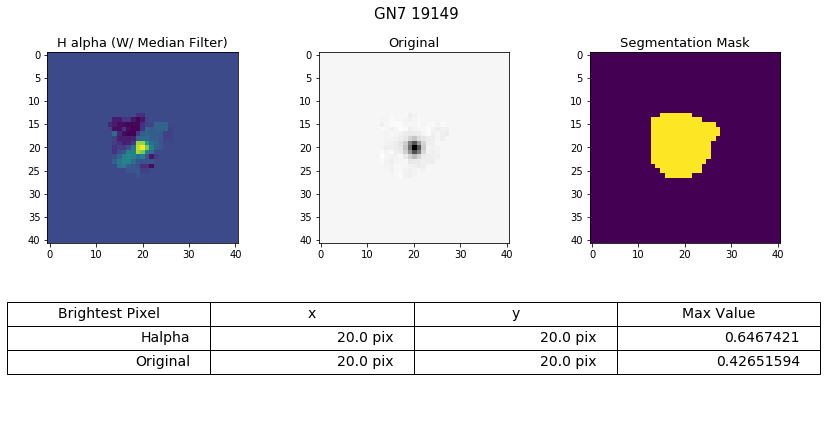

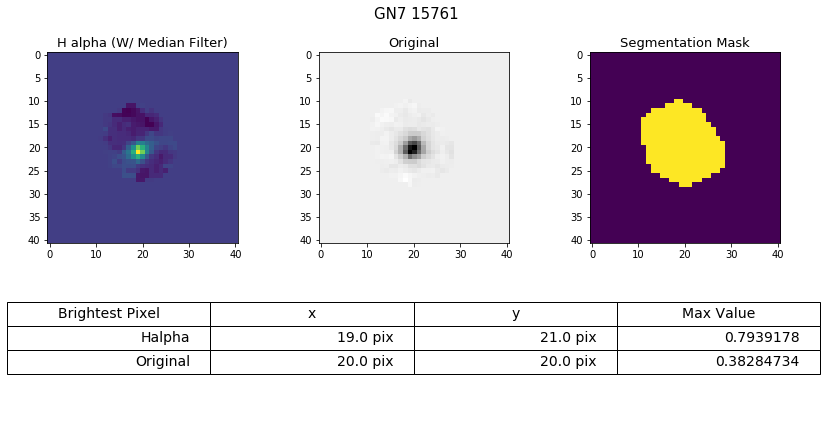

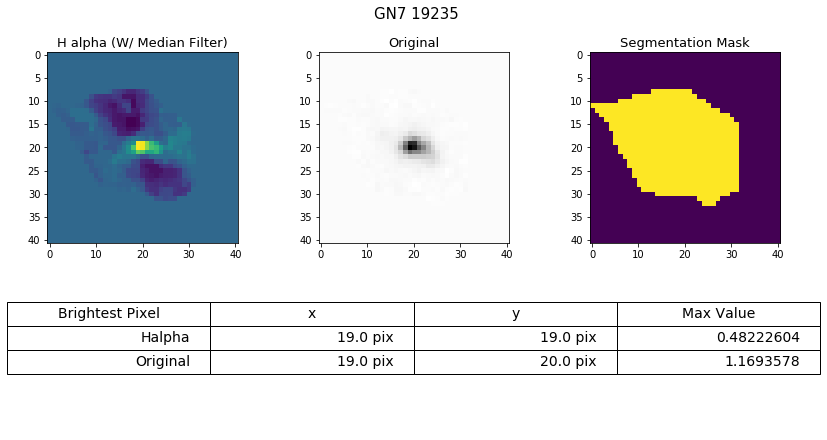

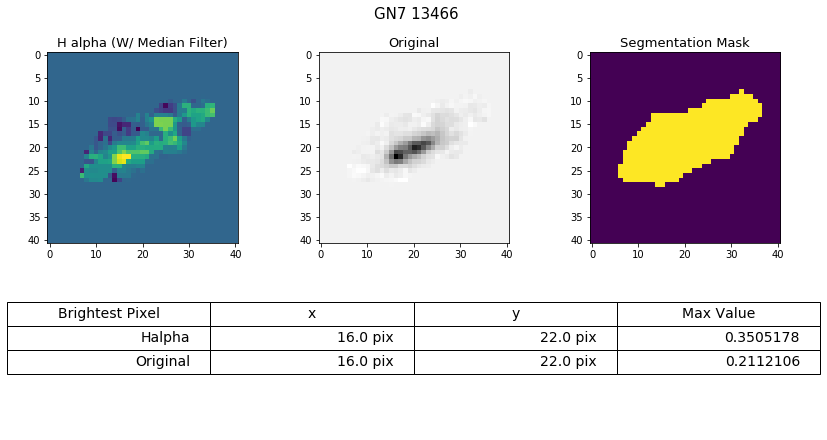

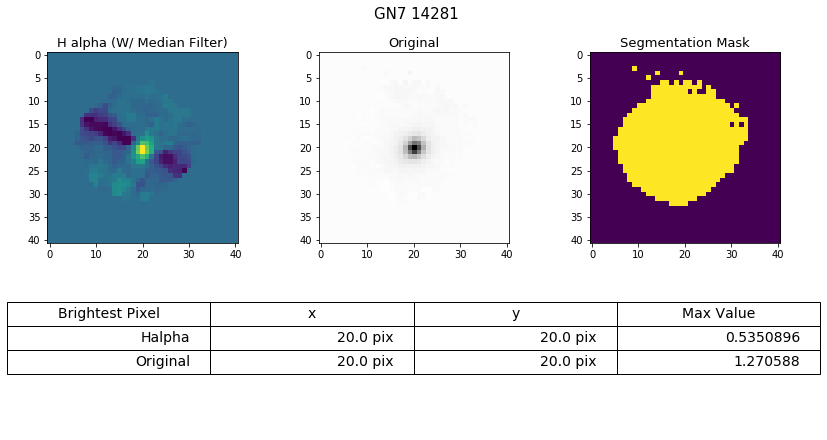

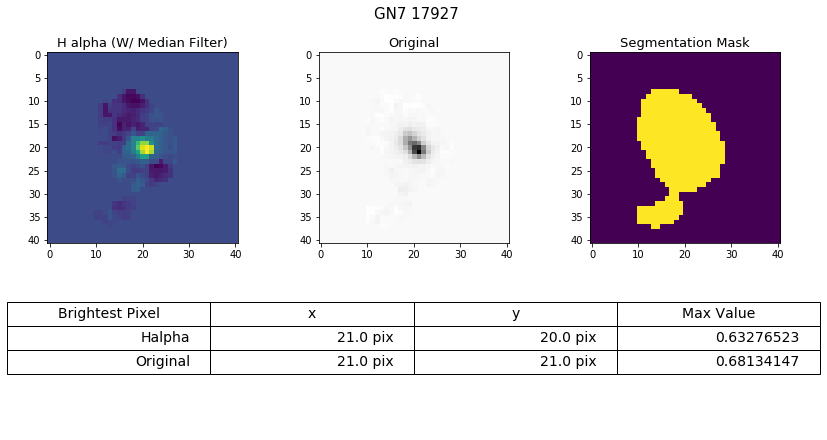

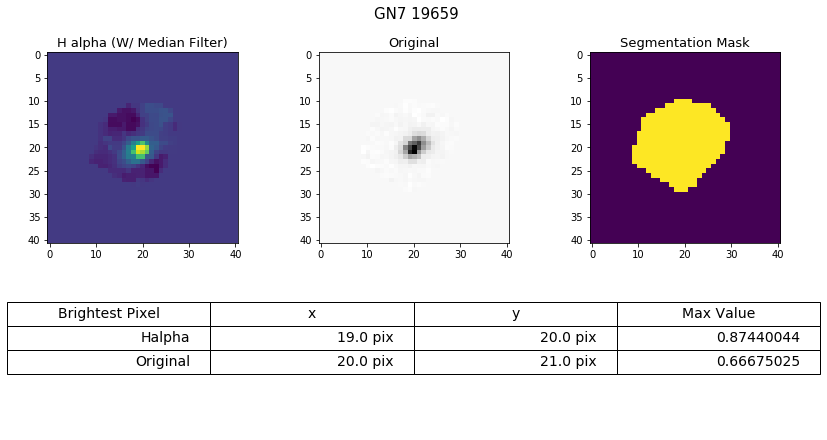

In [9]:
#Finalized Mergers
Sec = [GN1,GN2,GN3,GN4,GN5,GN7]
#Mergers W/ Issues
#Sec = [GN1_bad,GN2_bad,GN3_bad,GN4_bad,GN5_bad,GN7_bad]
Sec_name = ['GN1','GN2','GN3','GN4','GN5','GN7']

GN1_x_off,GN1_y_off,GN2_x_off,GN2_y_off,GN3_x_off,GN3_y_off = [],[],[],[],[],[]
GN4_x_off,GN4_y_off,GN5_x_off,GN5_y_off,GN7_x_off,GN7_y_off = [],[],[],[],[],[]

for i in range(len(Sec_name)):
#Listing all the Arrays for Each Section i.e. GN1
    RealData = []
    Mask = []
    im_med = []
    Halph = []
    Orig = []
    Title_fancy = []
    Title_save = []
    Ha_x = []
    Ha_y = []
    Orig_x = []
    Orig_y = []
    
    for j in range(len(Sec[i])):
        GID = Sec[i][j]
        loc = Sec_name[i]
        
#Opening all the Fits Files
        H_a = fits.open('/Users/felixmartinez/Research/merger_detection/candidates/merger_candidates/'+loc+'/'+loc+'_'+str(GID)+
                                                                                                '.full.fits')
        Ha_fits = '/Users/felixmartinez/Research/merger_detection/candidates/merger_candidates/'+loc+'/'+loc+'_'+str(GID)+'.full.fits'
        Line = H_a['Line','Ha'].data     #Halpha data
        Continuum = H_a['Continuum','Ha'].data
        Contam = H_a['Contam','Ha'].data
        Raw = H_a['DSCI','F105W'].data
        
#Cropping and Correcting the data
        Halph.append(Line[59:100,59:100] - Continuum[59:100,59:100] - Contam[59:100,59:100])  #Fixing the Errors on Halpha
        Orig.append(Raw[59:100,59:100])
        Title_fancy.append(loc + ' ' + str(GID))
        Title_save.append(loc + '_'+str(GID))
        
#X and Y Posistions of Galaxy on Seg Map
        Y,X = np.where(seg_N == GID)
        Z = np.array([Y,X]).T     #Gives the X and Y positions of Object in Y,X
        #world = w.wcs_pix2world(Z,1)  #Gives RA and Dec Values of Object (May not be needed)
        
#Center Pixel of Ha on Seg Map
        RA = H_a[0].header['RA']                                
        DEC = H_a[0].header['DEC']    

        center = w.wcs_world2pix([[RA,DEC]],1)   #Finds the center pixels of the central RA and Dec of the Ha cutout
        hy = np.round(center[0][0])
        hx = np.round(center[0][1])
        center = np.array([int(hx),int(hy)])

#Making a Mask that is the Galaxy on Seg Map
        seg_mask = np.array(seg_N[center[0]-20:center[0]+21,center[1]-20:center[1]+21])
        seg_mask[seg_mask != GID] = 0
        seg_mask[seg_mask == GID] = 1
    
        Mask.append(np.array(seg_mask))
        
        Ha_img = Halph[j]
        Orig_img = Orig[j]
        
#Applying the Segmentation Map Mask
        Ha_img[Mask[j] == 0]=0
        Orig_img[Mask[j] == 0]=0
        
#Applying the Filter
        m=np.percentile(Ha_img,1.5)   #High Pass
        M=np.percentile(Ha_img,98.5)  #Low Pass
        if M < np.abs(m)*6:
            M = np.abs(m)*6
        RealData.append(func.scaling_factor(Ha_img, m, M))  
        im_med.append(ndimage.median_filter(RealData[j], size = (3,3)))  #Median Smoothing
        
#Finding the Position of the Brightest Pixel and its value
        Ha_position = np.argwhere(im_med[j] == im_med[j].max()) * u.pixel
        Ha_max_value = np.amax(im_med[j])

        Orig_position = np.argwhere(Orig_img == Orig_img.max()) * u.pixel
        Orig_max_value = np.amax(Orig_img) 
        
#Appending the x and y for the Histogram
        Ha_x.append(Ha_position[0][1])
        Ha_y.append(Ha_position[0][0])
        Orig_x.append(Orig_position[0][1])
        Orig_y.append(Orig_position[0][0])
        
#Filtering out Galaxies that are not within the inner 68%
        diff_x = Ha_x[j].value - Orig_x[j].value
        diff_y = Ha_y[j].value - Orig_y[j].value
        
        if(round(xrange[x_low_1[0]],1) <= diff_x <= round(xrange[x_high_1[0]],1) and 
           round(xrange[y_low_1[0]],1) <= diff_y <= round(xrange[y_high_1[0]],1)):
            
#Appending the x and y offset Separetly by Section
            if loc == 'GN1':
                GN1_x_off.append(Ha_x[j].value - Orig_x[j].value)
                GN1_y_off.append(Ha_y[j].value - Orig_y[j].value)
            if loc == 'GN2':
                GN2_x_off.append(Ha_x[j].value - Orig_x[j].value)
                GN2_y_off.append(Ha_y[j].value - Orig_y[j].value)
            if loc == 'GN3':
                GN3_x_off.append(Ha_x[j].value - Orig_x[j].value)
                GN3_y_off.append(Ha_y[j].value - Orig_y[j].value)
            if loc == 'GN4':
                GN4_x_off.append(Ha_x[j].value - Orig_x[j].value)
                GN4_y_off.append(Ha_y[j].value - Orig_y[j].value)
            if loc == 'GN5':
                GN5_x_off.append(Ha_x[j].value - Orig_x[j].value)
                GN5_y_off.append(Ha_y[j].value - Orig_y[j].value)
            if loc == 'GN7':
                GN7_x_off.append(Ha_x[j].value - Orig_x[j].value)
                GN7_y_off.append(Ha_y[j].value - Orig_y[j].value)
            
        
#Making a table with Information of the Pixels location and values
            Test = {'Ha_x':pd.Series(Ha_position[0][1]), 'Ha_y':pd.Series(Ha_position[0][0]),
                    'Ha_max_value':pd.Series(Ha_max_value),'Orig_x':pd.Series(Orig_position[0][1]),
                    'Orig_y':pd.Series(Orig_position[0][0]),'Orig_max_value':pd.Series(Orig_max_value)}
            Position_table = pd.DataFrame(Test)    
            table_data=[['Halpha',Ha_position[0][1],Ha_position[0][0],Ha_max_value],
                        ['Original',Orig_position[0][1],Orig_position[0][0],Orig_max_value]]
        
#Plotting the Figures
            func.plot_fig(3,im_med[j],Orig[j],Mask[j],0,table_data,Title_fancy[j])
#Finalized Mergers Save Line
            #plt.savefig('/Users/felixmartinez/Research/Mergers_Images/'+loc+'/'+Title_save[j]+'.png',bbox_inches = 'tight')
#Mergers W/ Issues Save Line
            #plt.savefig('/Users/felixmartinez/Research/Mergers_Images/Bad_Ha/'+loc+'/'+Title_save[j]+'.png',bbox_inches = 'tight')
        else:
            pass

Now plotting the offsets of the data that pass the filter on a histogram:

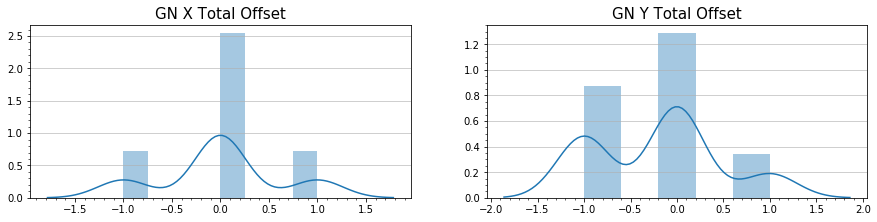

The total number of data points we have are: 66


In [10]:
import seaborn as sea
x_offset = []
y_offset = []

#Real data for Ha
for i in range(len(GN1_x_off)):
    x_offset.append(GN1_x_off[i])
    y_offset.append(GN1_y_off[i])

for i in range(len(GN2_x_off)):
    x_offset.append(GN2_x_off[i])
    y_offset.append(GN2_y_off[i])

for i in range(len(GN3_x_off)):
    x_offset.append(GN3_x_off[i])
    y_offset.append(GN3_y_off[i])

for i in range(len(GN4_x_off)):
    x_offset.append(GN4_x_off[i])
    y_offset.append(GN4_y_off[i])

for i in range(len(GN5_x_off)):
    x_offset.append(GN5_x_off[i])
    y_offset.append(GN5_y_off[i])

for i in range(len(GN7_x_off)):
    x_offset.append(GN7_x_off[i])
    y_offset.append(GN7_y_off[i])
    
plt.figure(figsize=[15,7])
    
plt.subplot(221)
plt.grid(axis = 'y',alpha = .75)
sea.distplot(x_offset)
plt.minorticks_on()
plt.title("GN X Total Offset", fontsize = 15)
#plt.savefig('/Users/felixmartinez/Research/Mergers_Images/x_offset.png',bbox_inches = 'tight')

plt.subplot(222)
plt.grid(axis = 'y',alpha = .75)
sea.distplot(y_offset)
plt.minorticks_on()
plt.title("GN Y Total Offset", fontsize = 15)
#plt.savefig('/Users/felixmartinez/Research/Mergers_Images/y_offset.png',bbox_inches = 'tight')

plt.show()

print("The total number of data points we have are: " + str(len(x_offset)))

### Doing a 3 Sigma Selection
99.7% Overall viewing <br>
Low bound: 0.0015 <br>
High bound: 0.9985

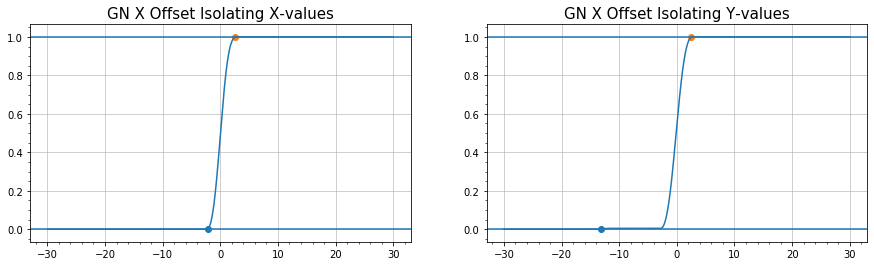

In [11]:
summed_x = np.cumsum(corrected_x / np.trapz(corrected_x,xrange))/max(np.cumsum(corrected_x / np.trapz(corrected_x,xrange)))
summed_y = np.cumsum(corrected_y / np.trapz(corrected_y,xrange))/max(np.cumsum(corrected_y / np.trapz(corrected_y,yrange)))

low_bound = .0015
high_bound = .9985

#finding the intersections between the lines
y_low_3 = np.argwhere(np.diff(np.sign(summed_y - low_bound))).flatten()
y_high_3 = np.argwhere(np.diff(np.sign(summed_y - high_bound))).flatten()

x_low_3 = np.argwhere(np.diff(np.sign(summed_x - low_bound))).flatten()
x_high_3 = np.argwhere(np.diff(np.sign(summed_x - high_bound))).flatten()

#plotting:
plt.figure(figsize=[15,4])

plt.subplot(121)
plt.title("GN X Offset Isolating X-values", fontsize = 15)
plt.minorticks_on()
plt.grid(alpha = .75)
plt.plot(xrange, summed_x)
plt.scatter(xrange[x_low_3], summed_x[x_low_3])
plt.scatter(xrange[x_high_3], summed_x[x_high_3])
plt.axhline(low_bound)
plt.axhline(high_bound)

plt.subplot(122)
plt.title("GN X Offset Isolating Y-values", fontsize = 15)
plt.minorticks_on()
plt.grid(alpha = .75)
plt.plot(yrange, summed_y)
plt.scatter(yrange[y_low_3], summed_y[y_low_3])
plt.scatter(yrange[y_high_3], summed_y[y_high_3])
plt.axhline(low_bound)
plt.axhline(high_bound)

In [12]:
print("x intercepts for the X offset are: " + str(round(xrange[x_low_3[0]],1)) + " for the lower bound and: " 
      + str(round(xrange[x_high_3[0]],1)) + " for the upper bound.")
print("x intercepts for the Y offset are: " + str(round(yrange[y_low_3[0]],1)) + " for the lower bound and: " 
      + str(round(yrange[y_high_3[0]],1)) + " for the upper bound.")

x intercepts for the X offset are: -2.2 for the lower bound and: 2.6 for the upper bound.
x intercepts for the Y offset are: -13.2 for the lower bound and: 2.5 for the upper bound.


Applying the offsets below:

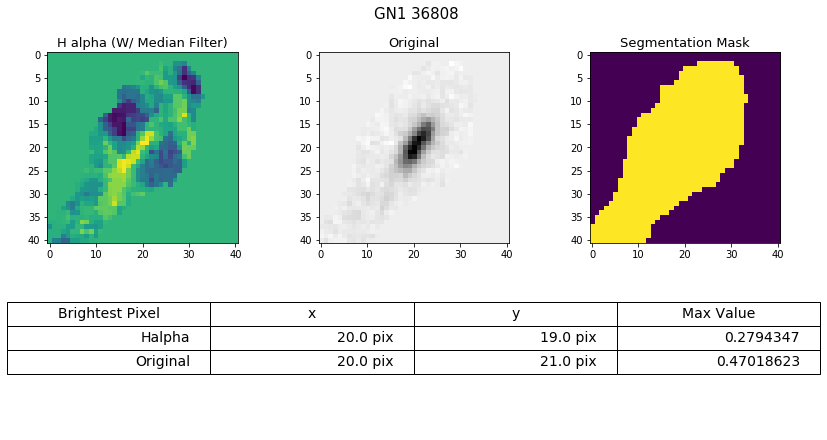

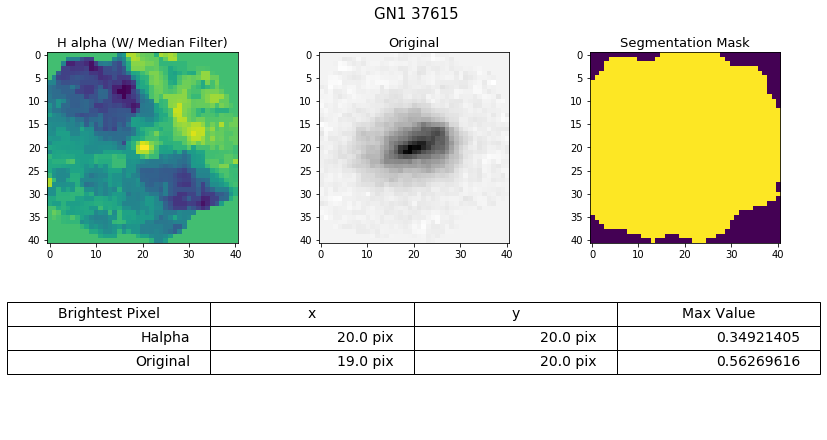

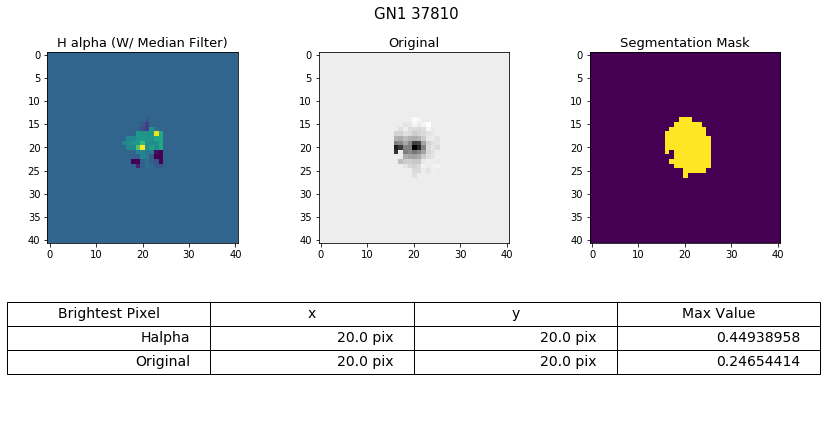

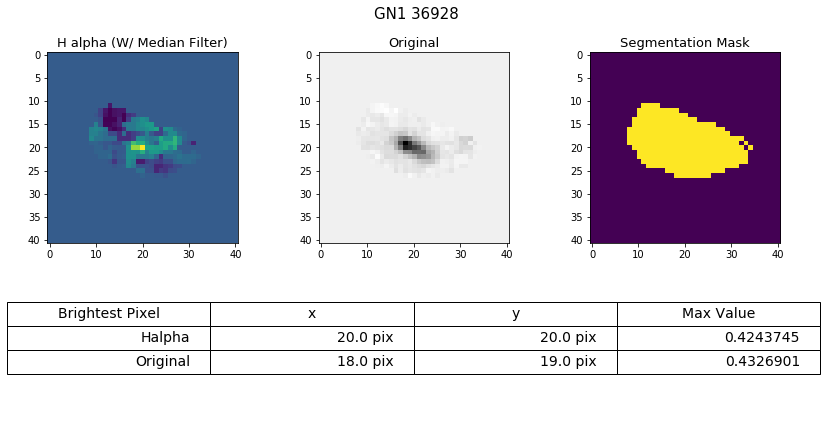

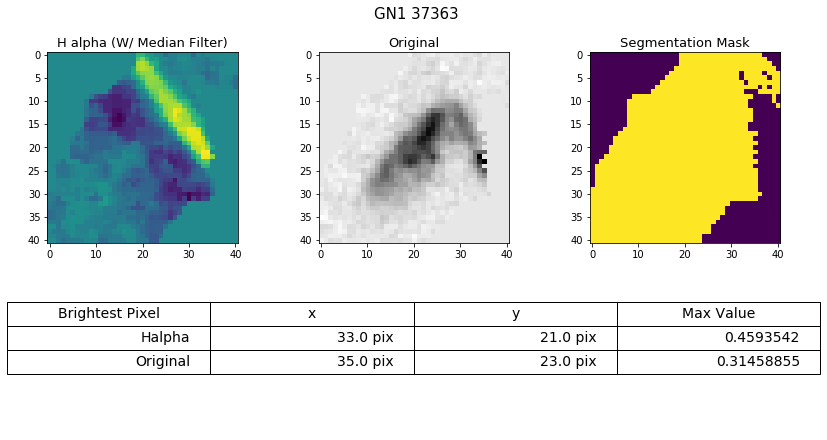

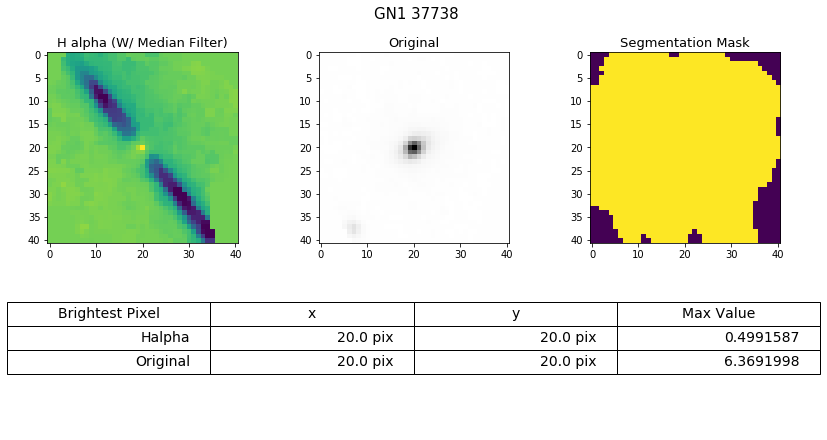

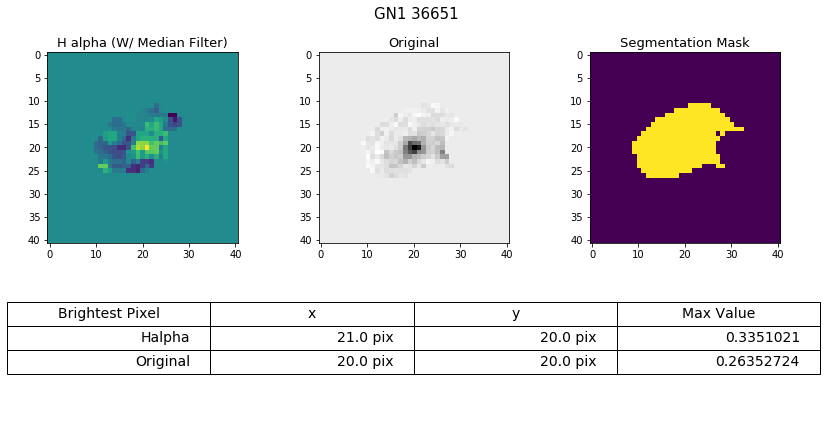

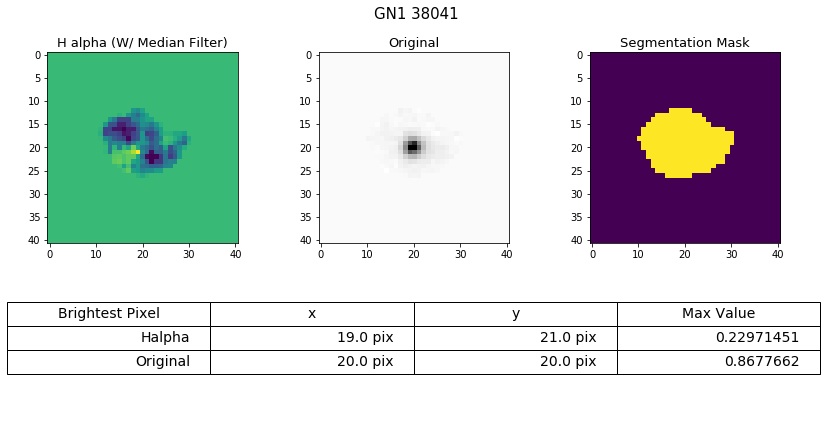

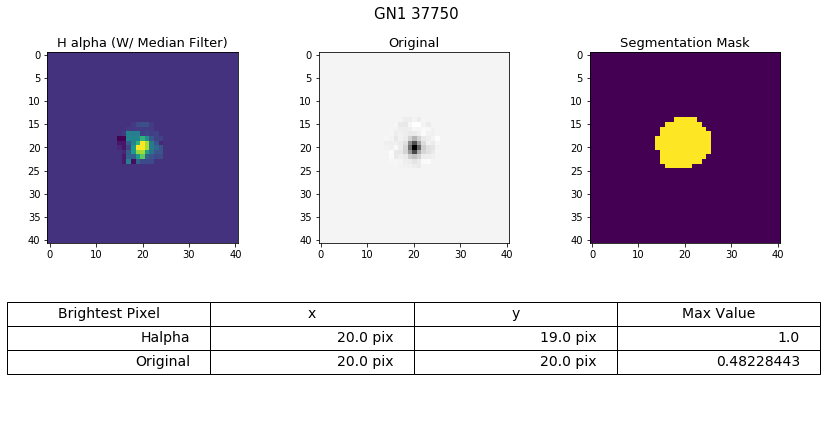

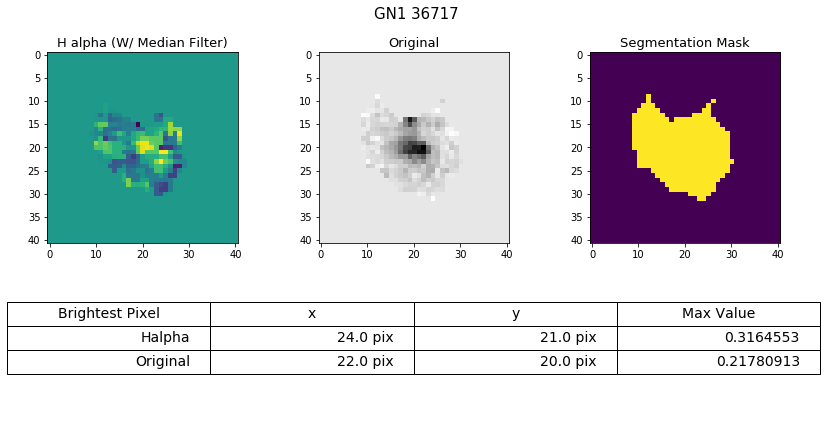

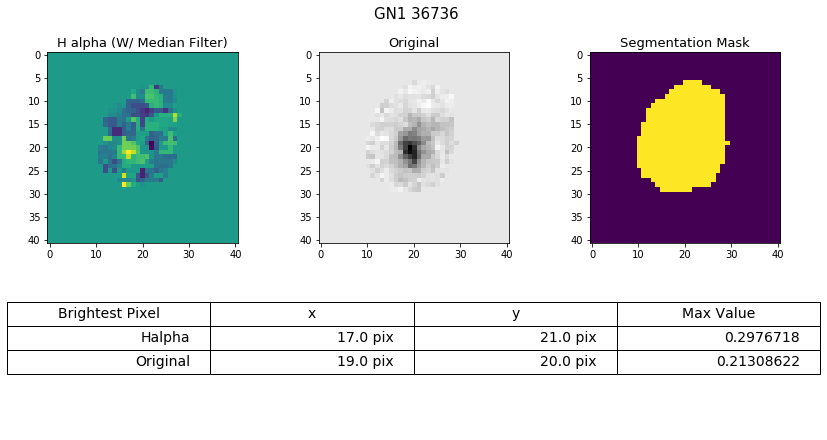

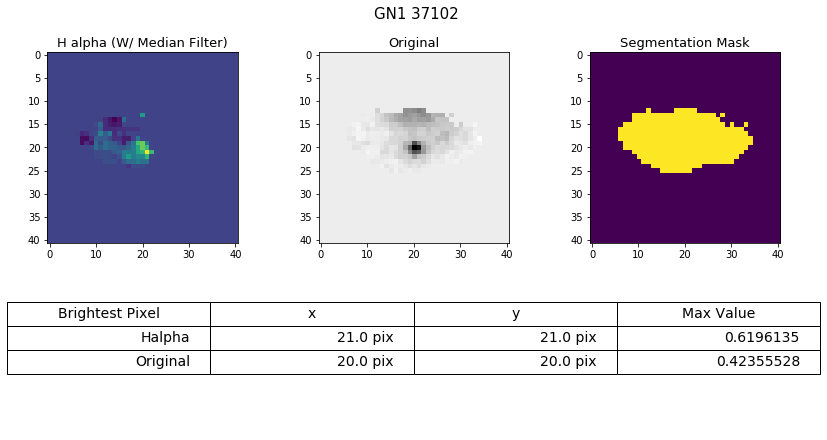

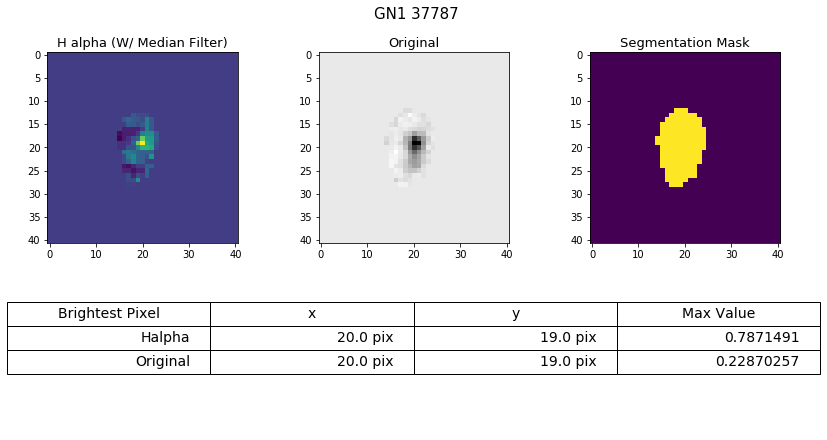

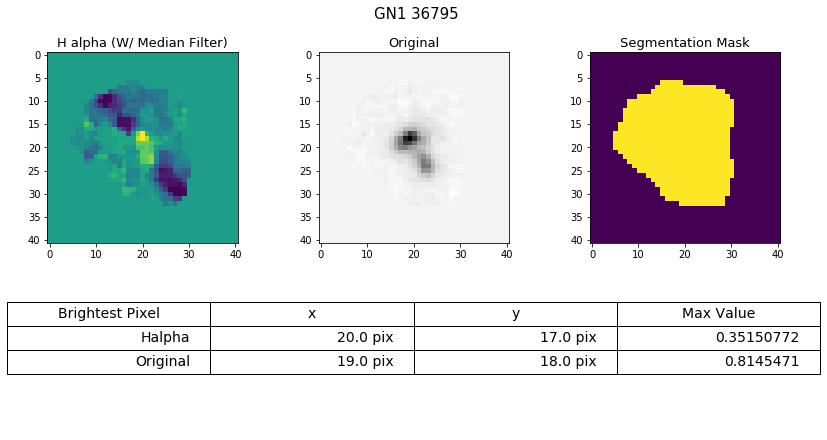

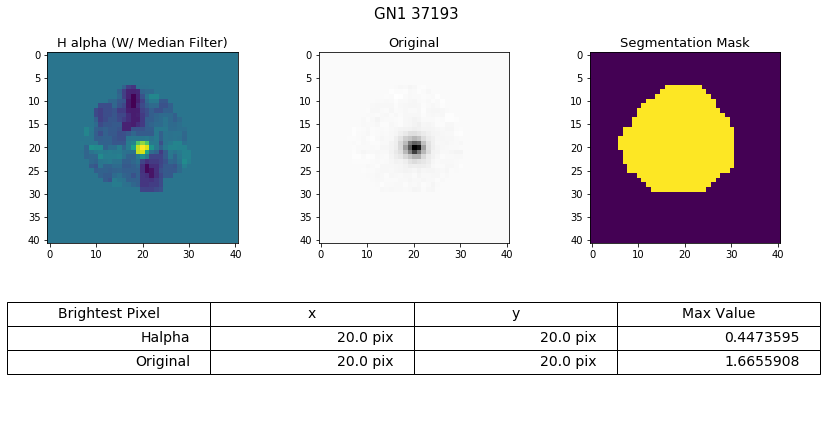

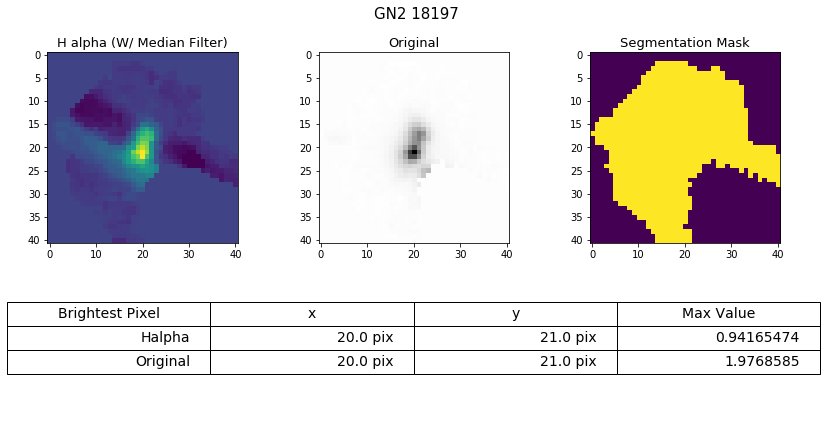

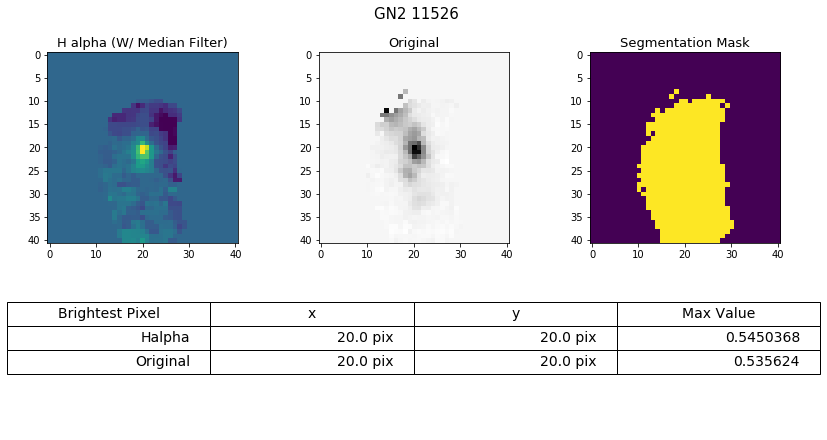

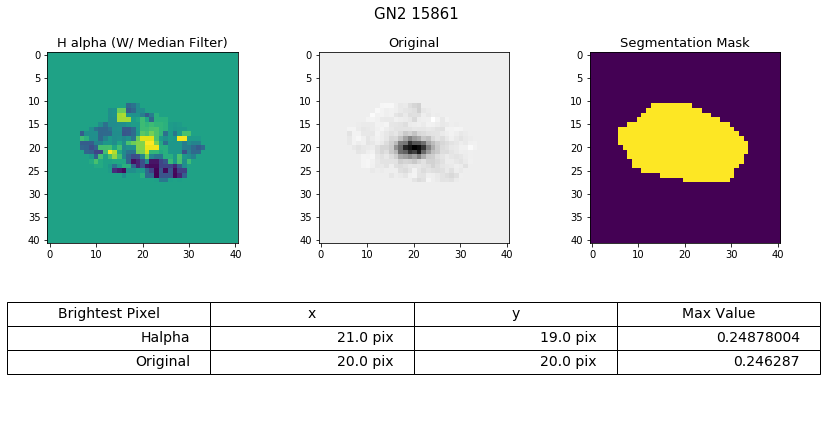

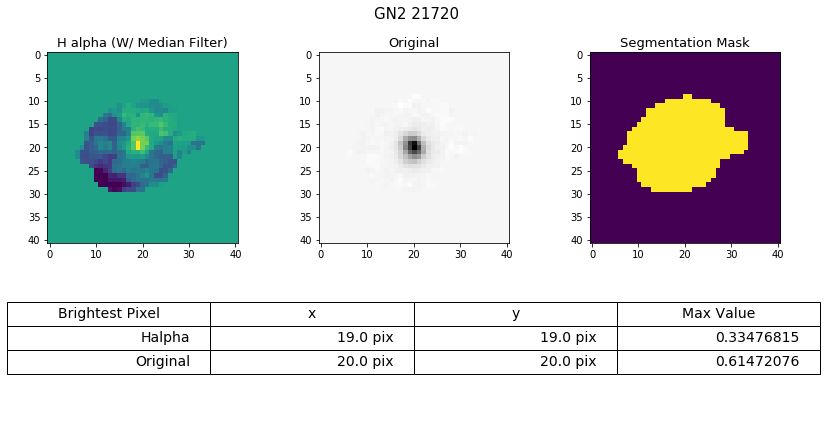

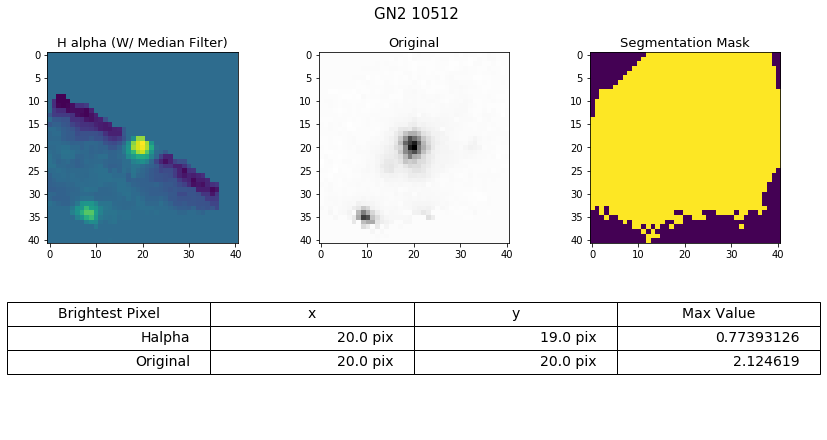

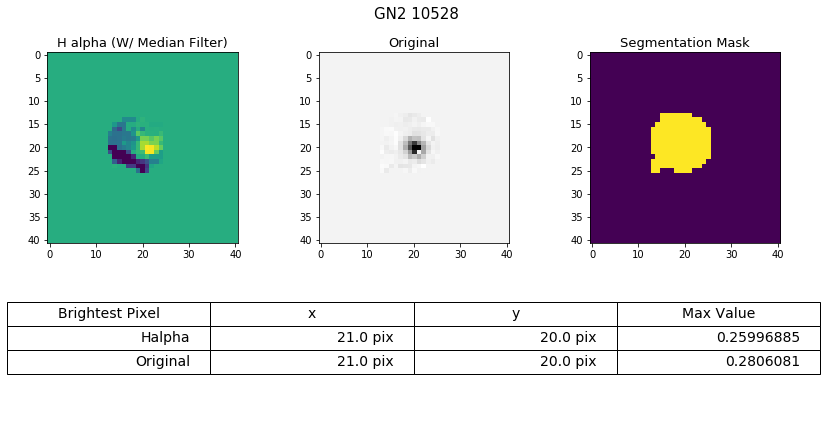

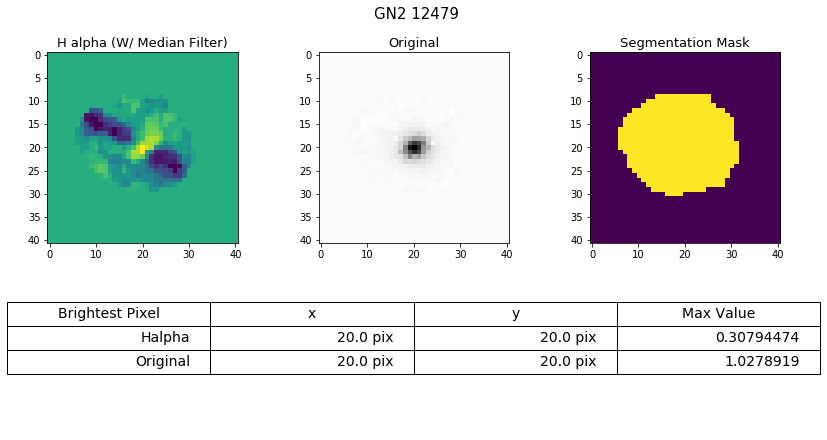

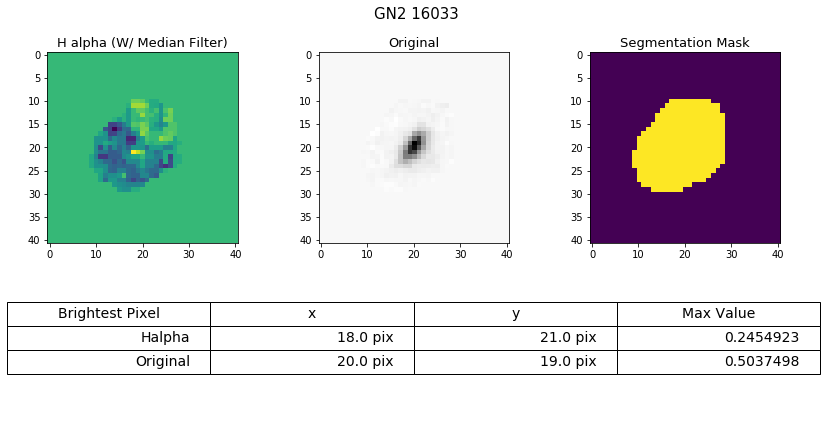

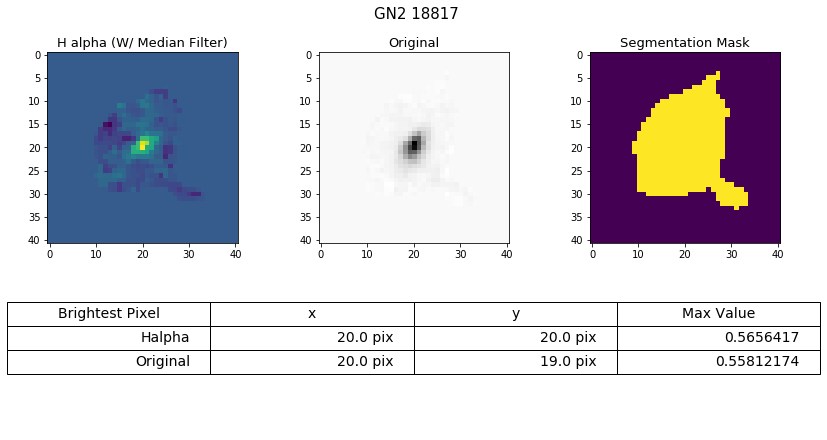

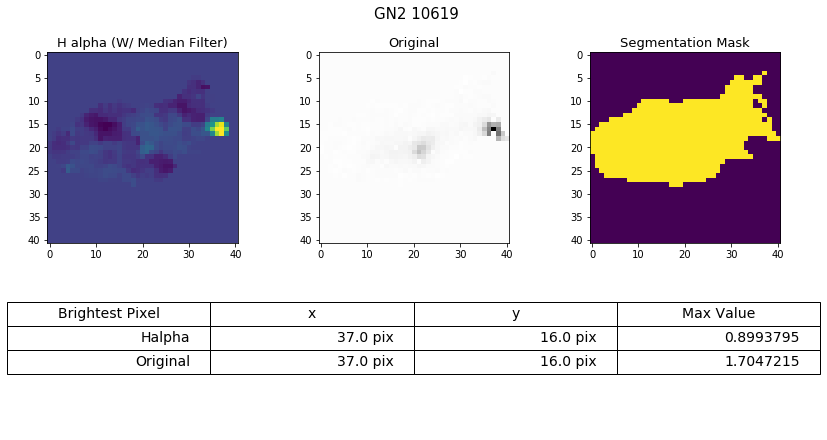

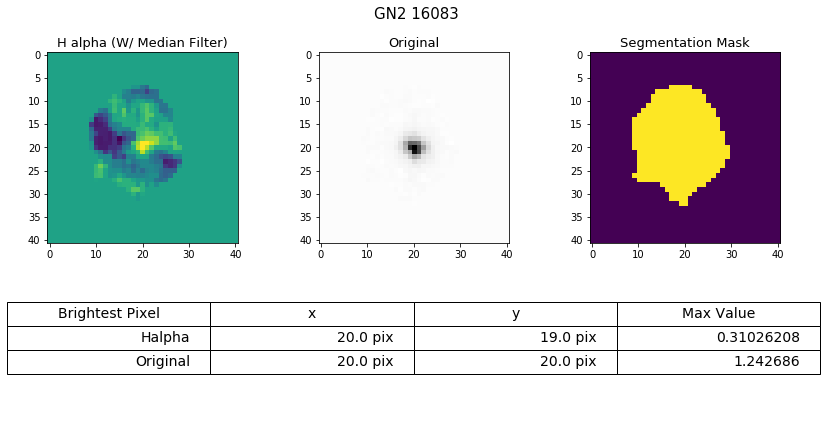

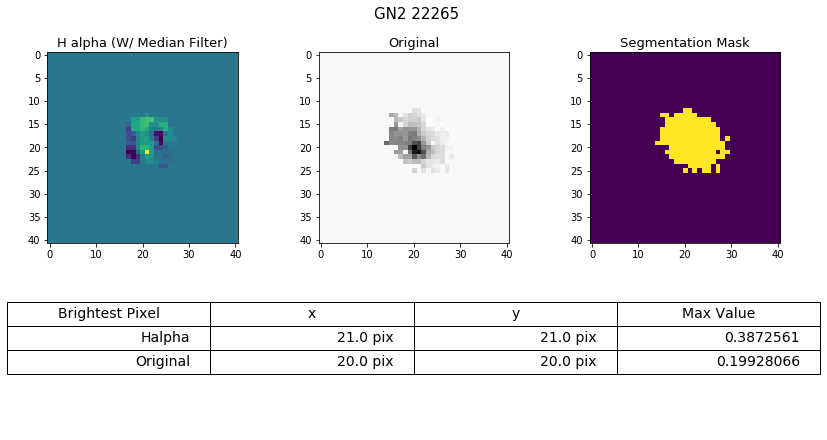

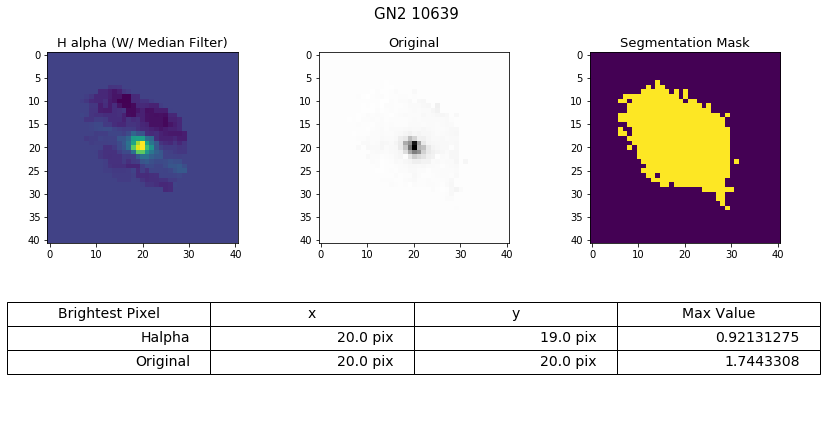

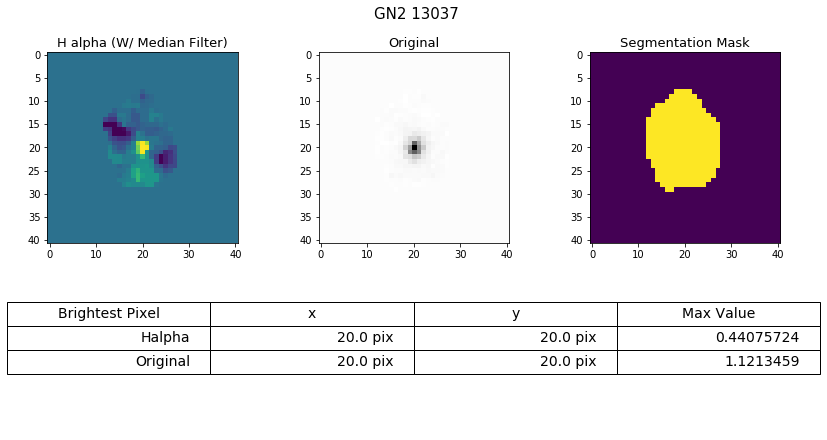

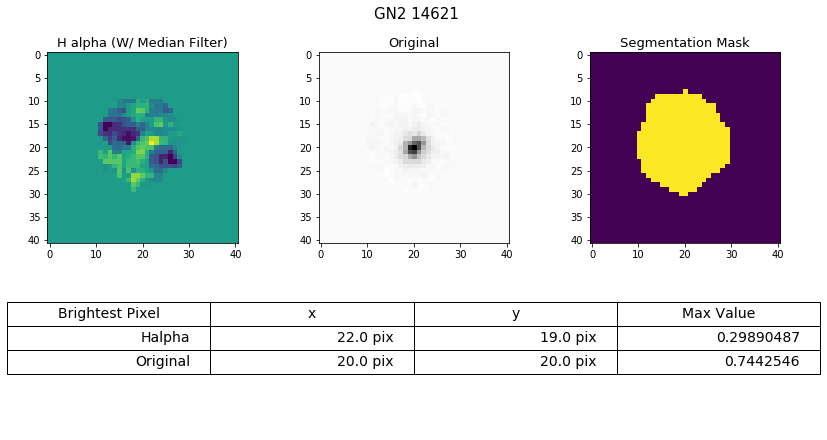

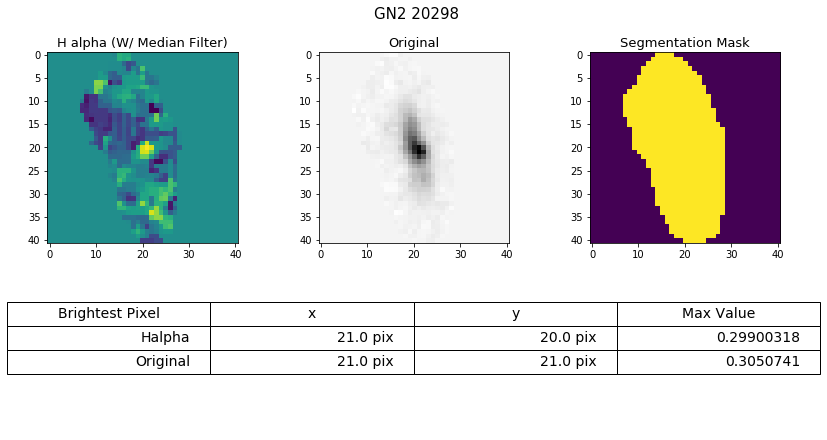

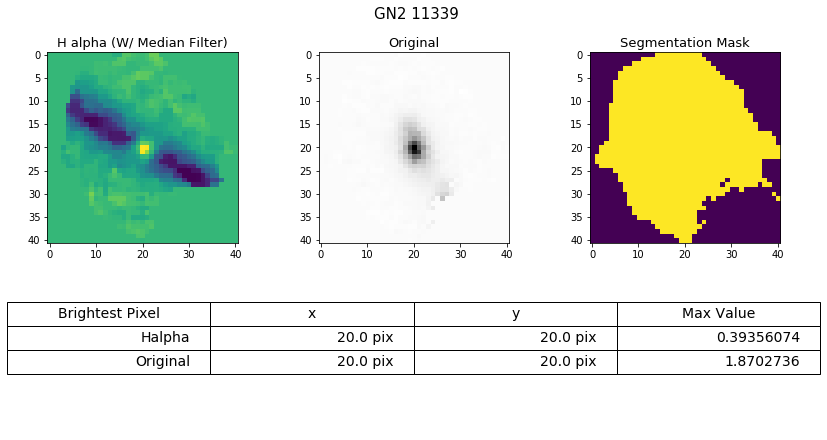

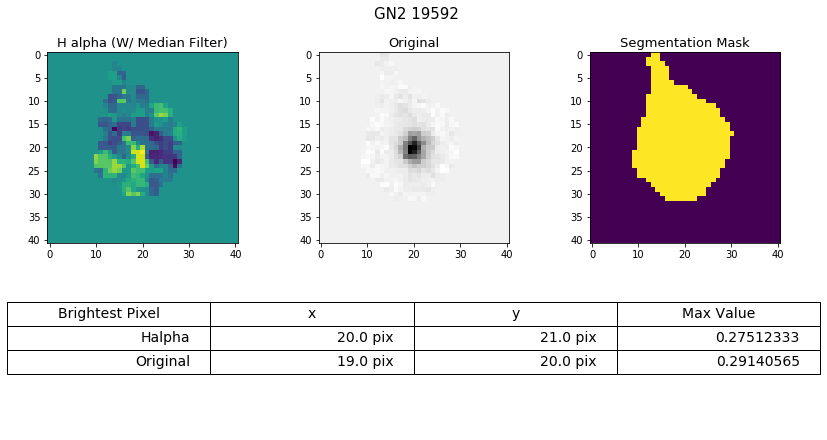

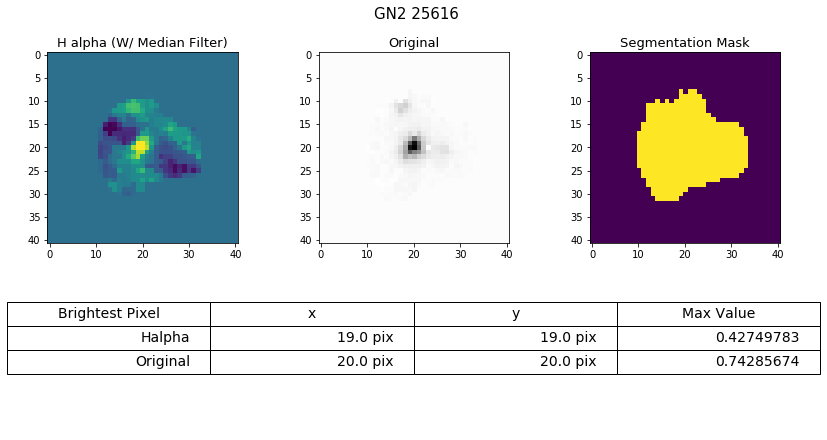

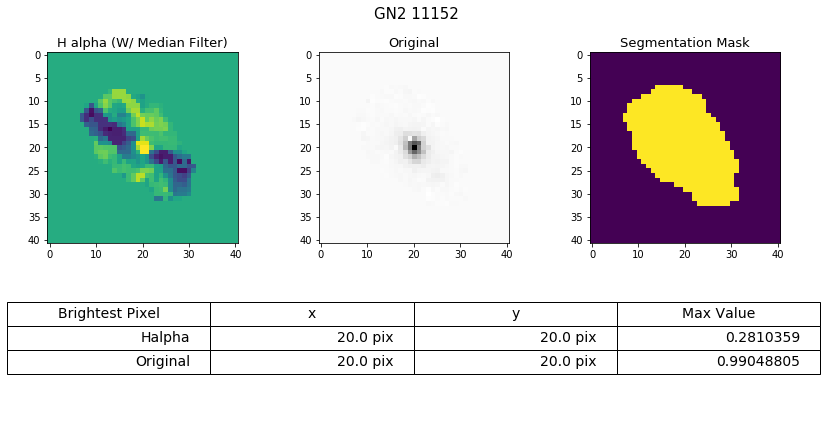

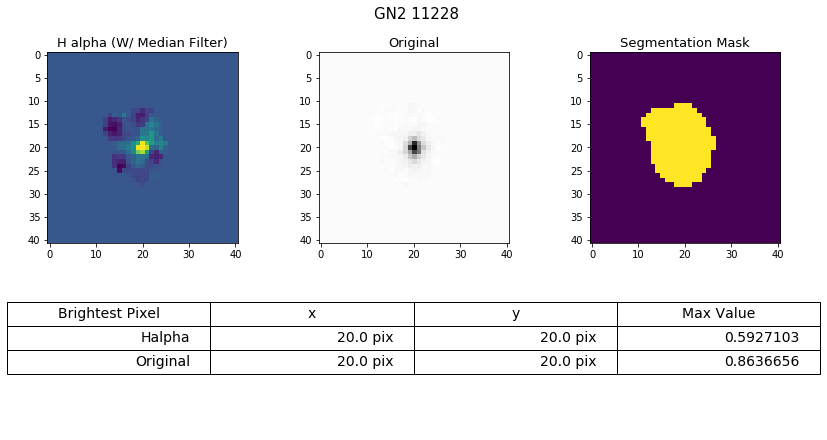

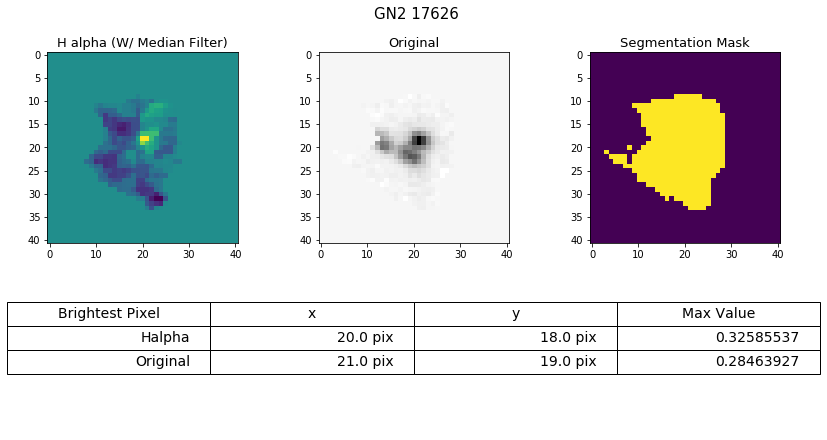

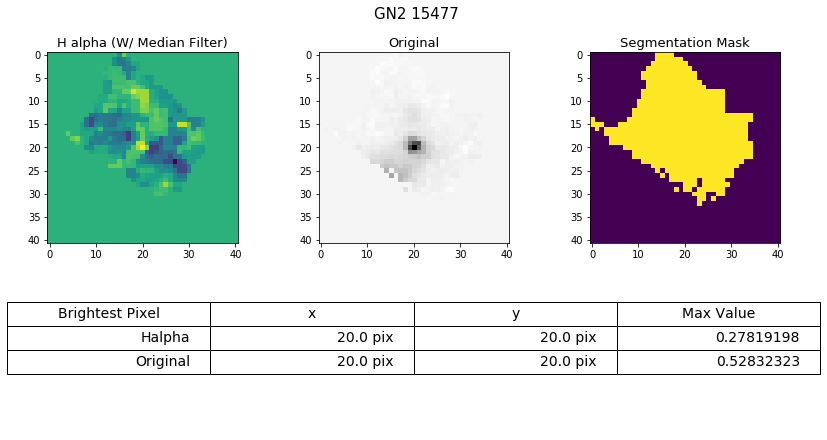

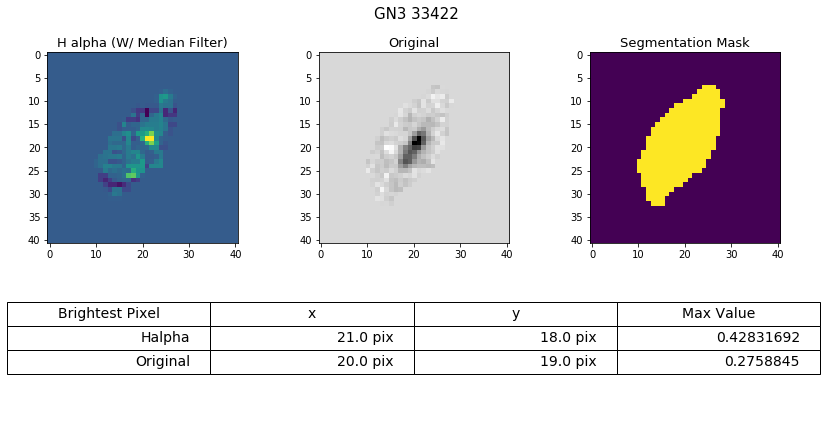

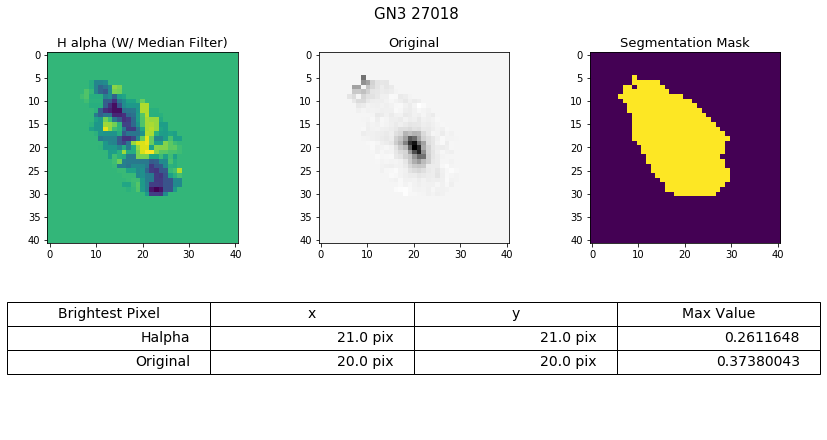

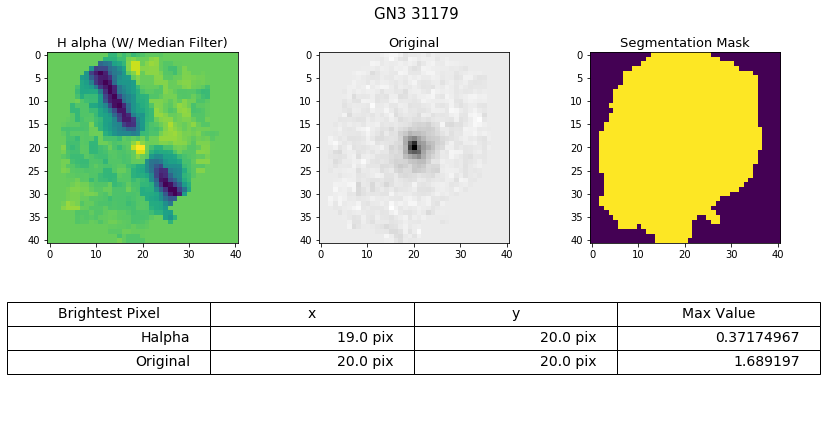

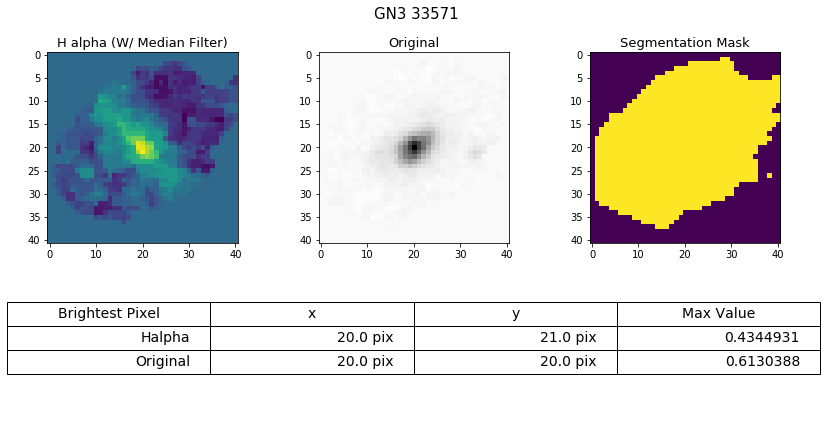

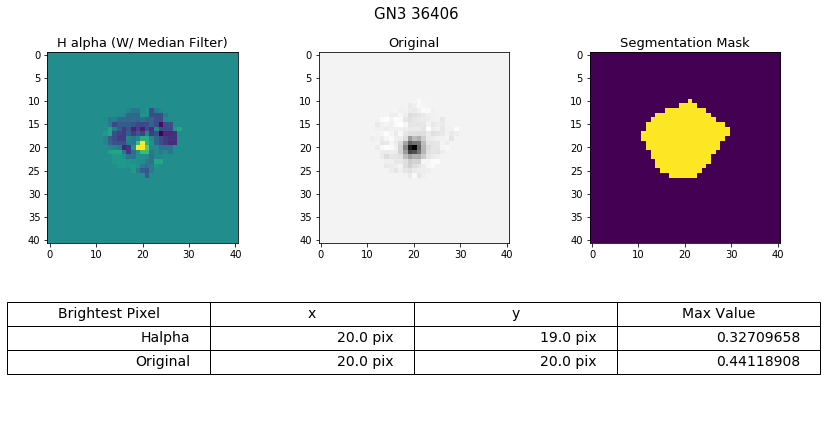

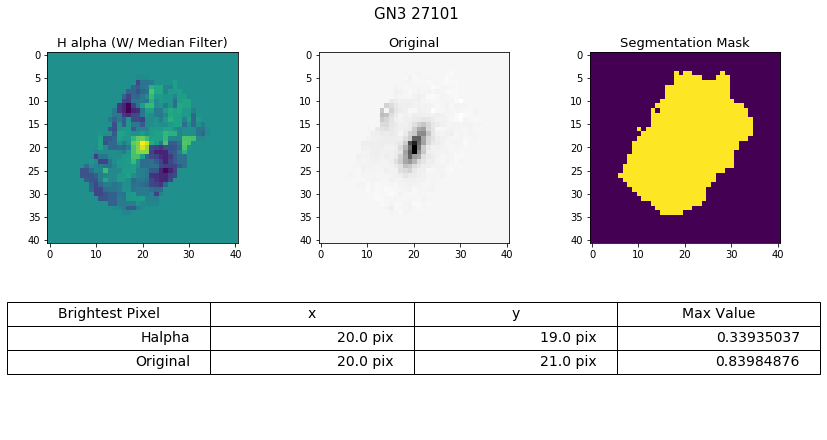

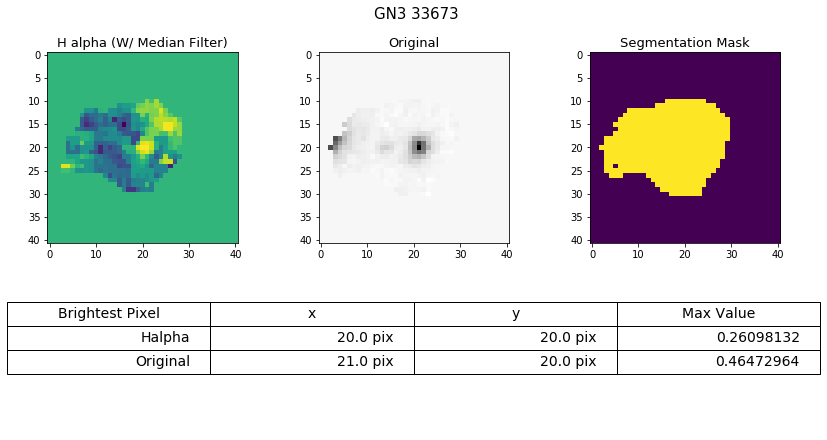

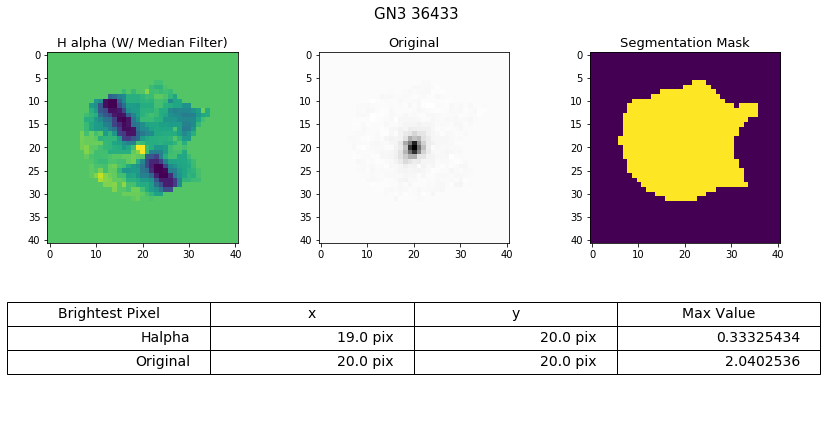

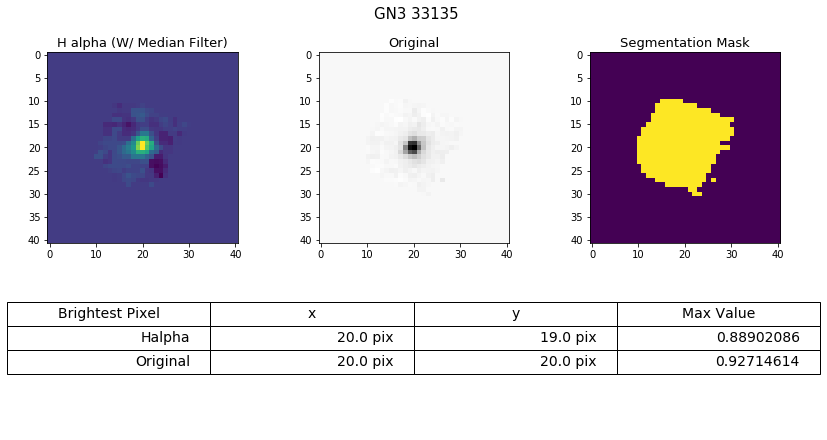

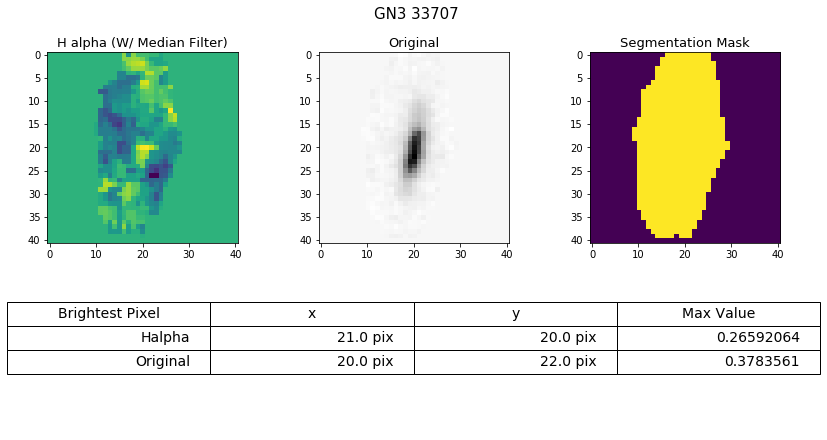

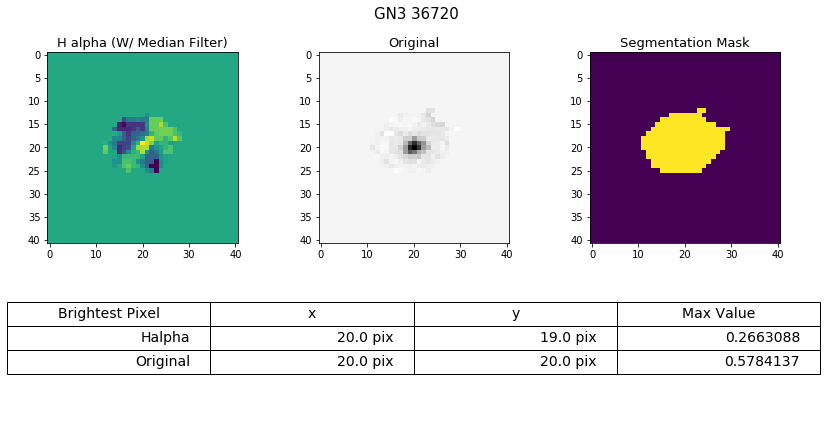

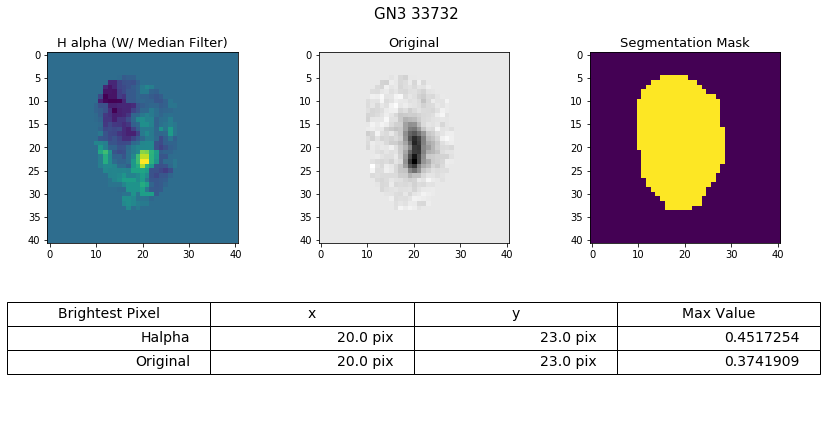

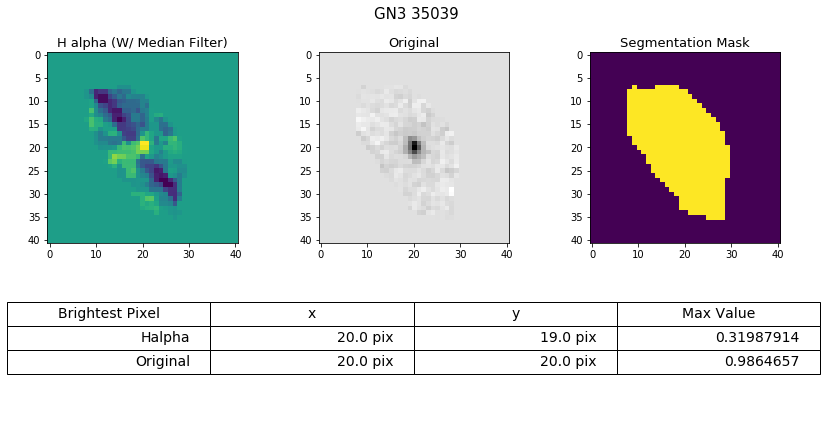

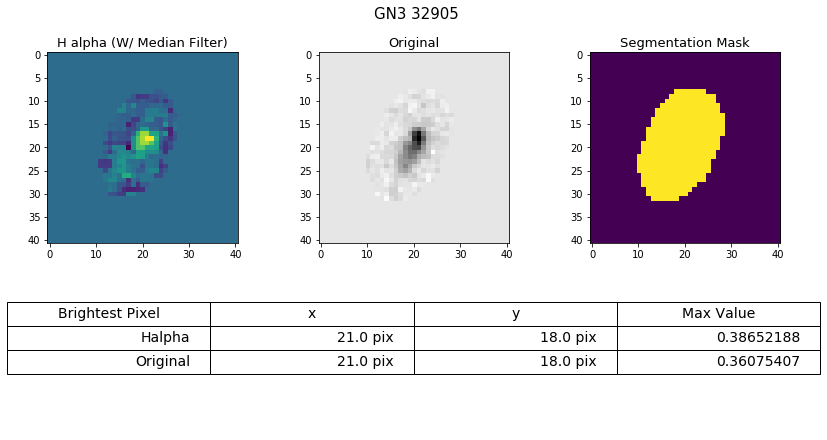

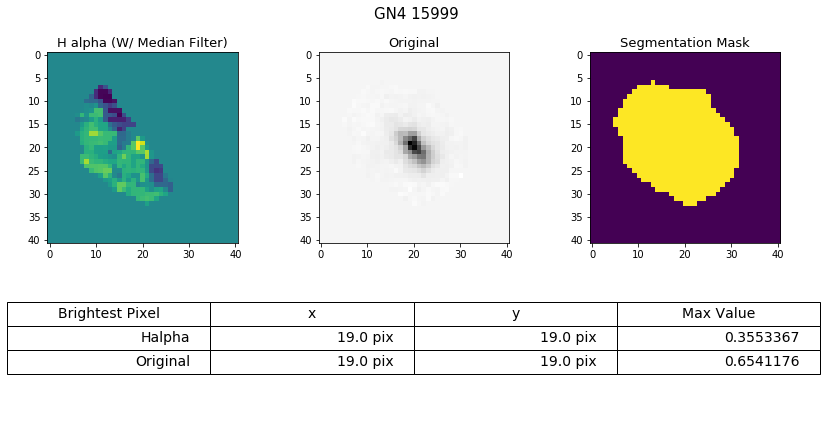

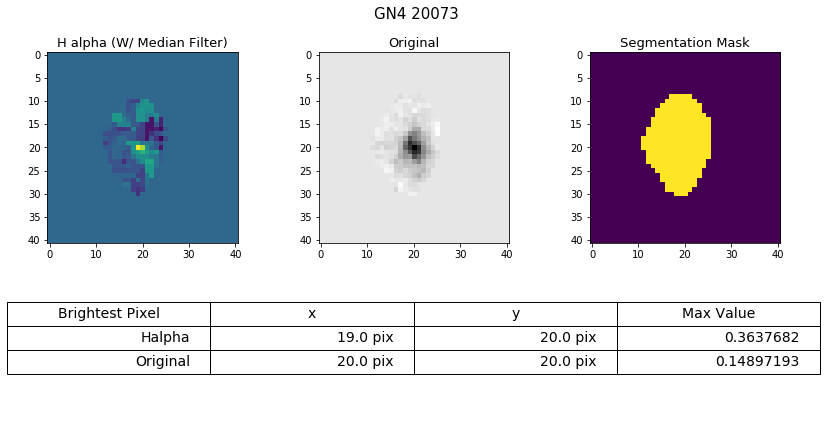

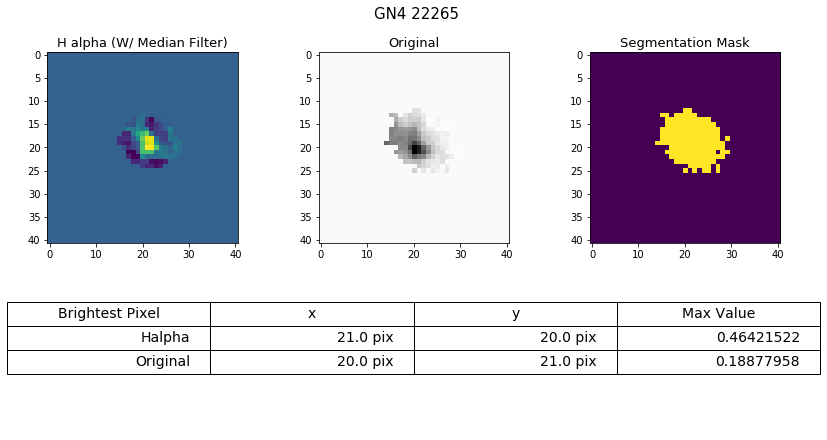

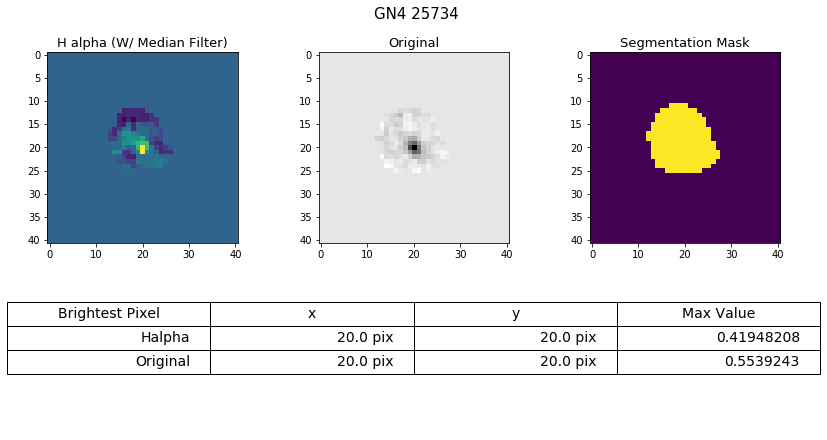

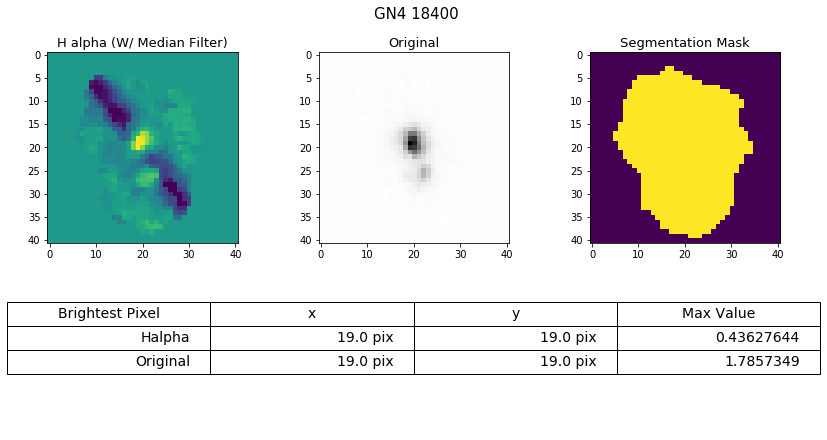

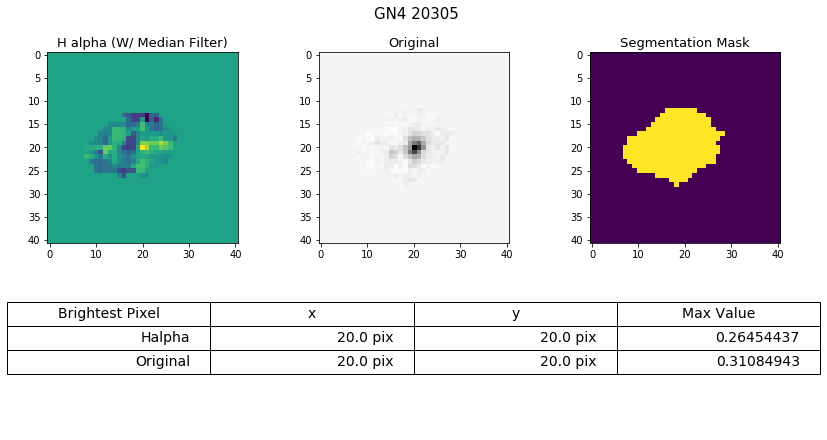

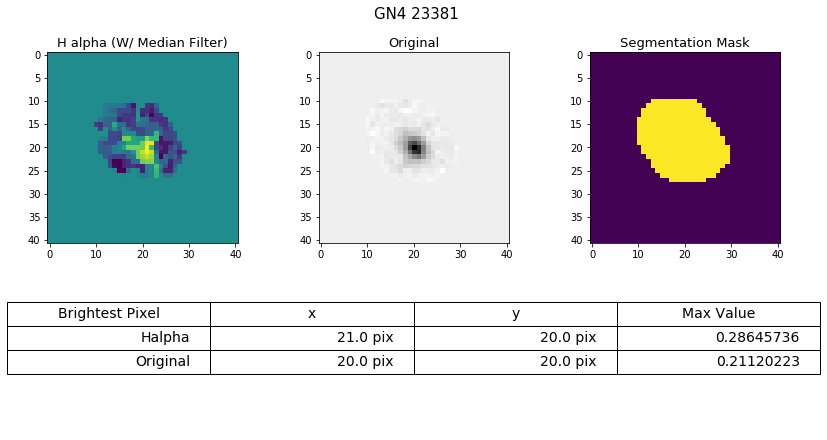

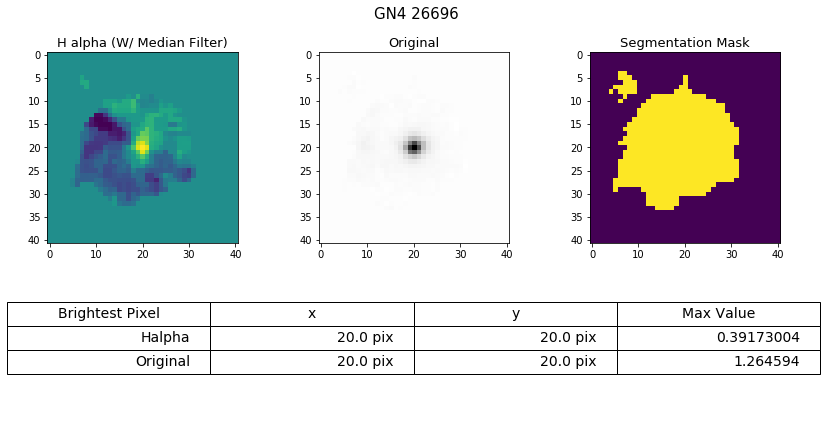

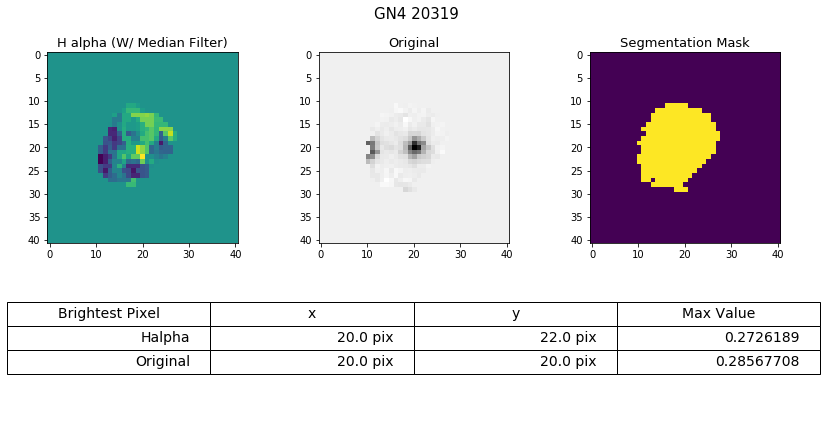

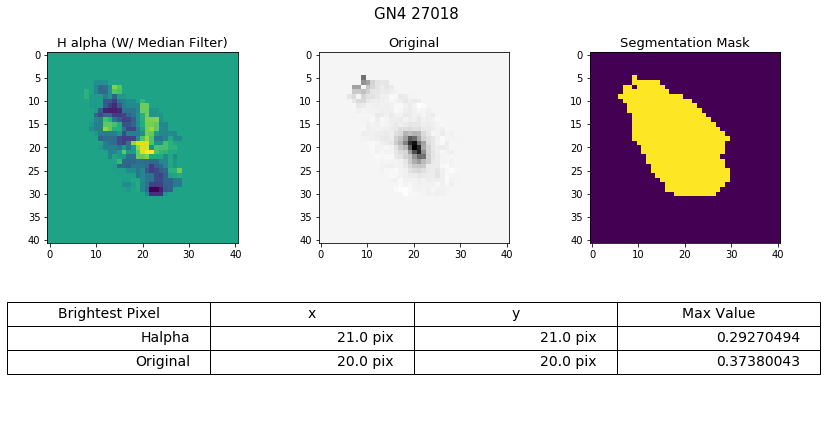

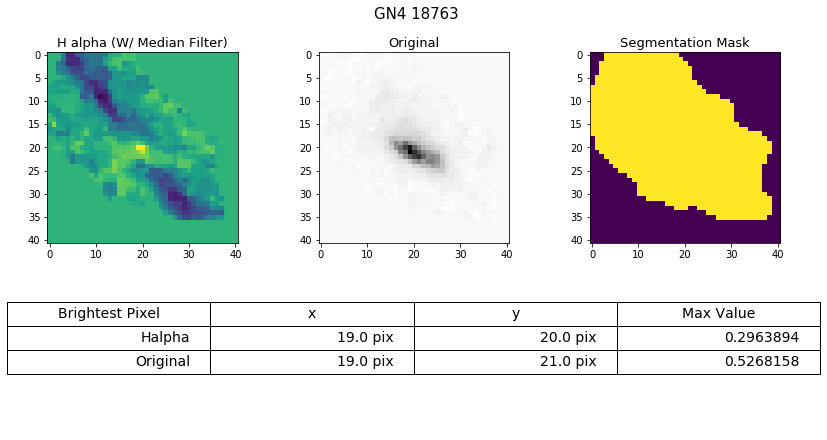

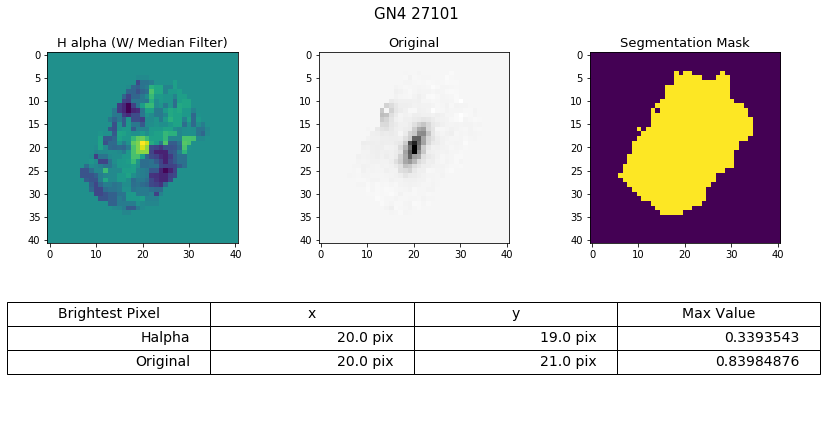

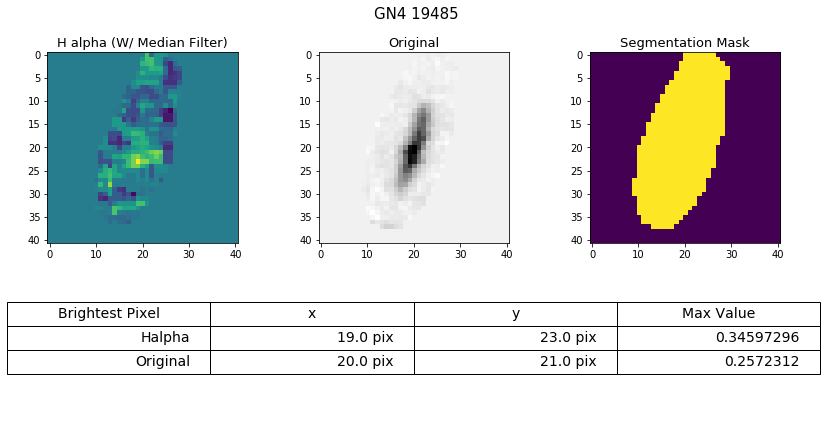

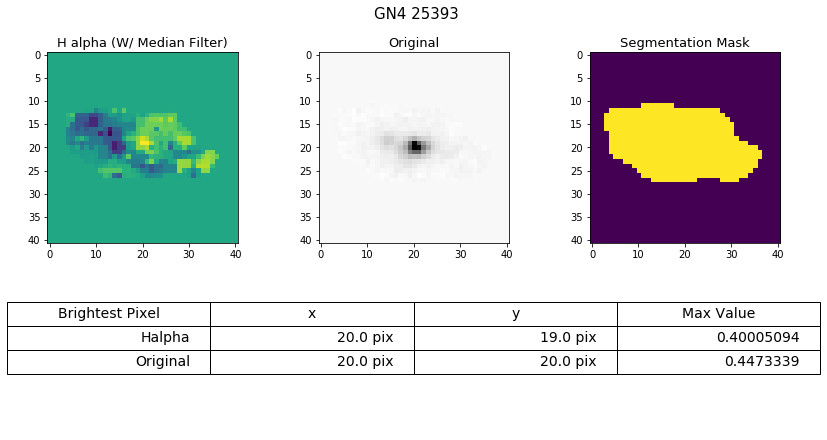

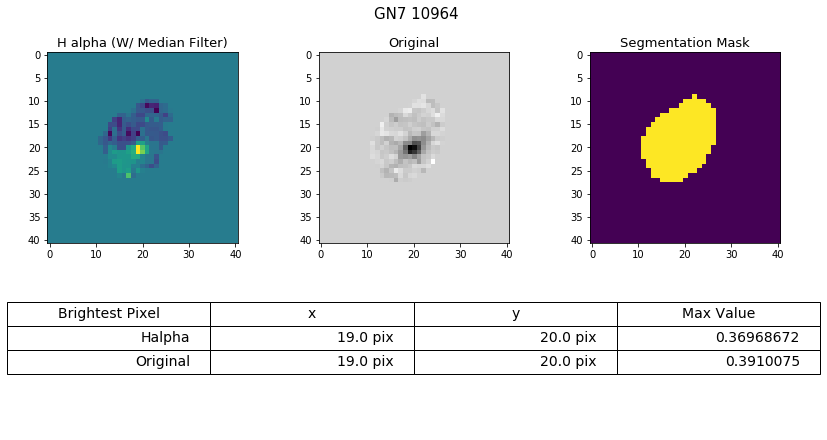

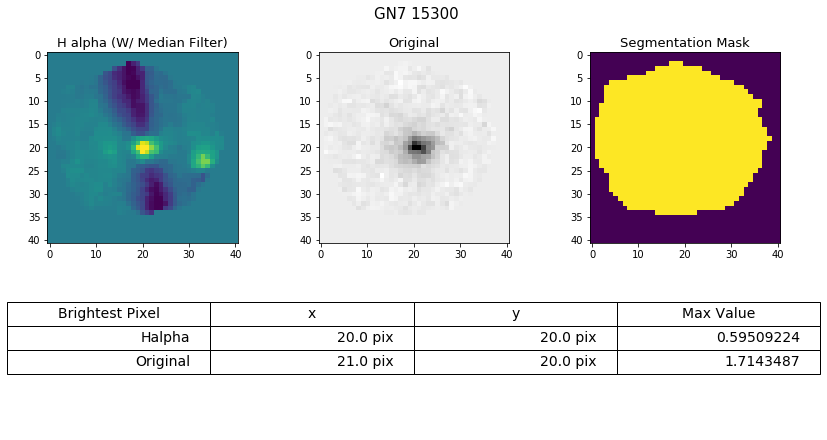

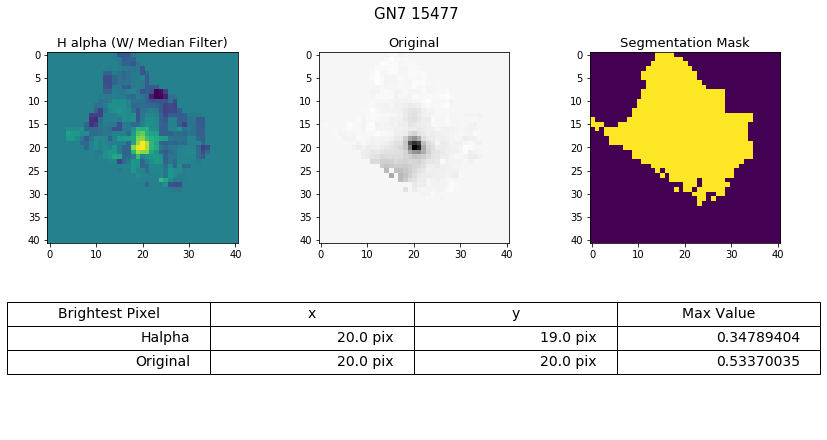

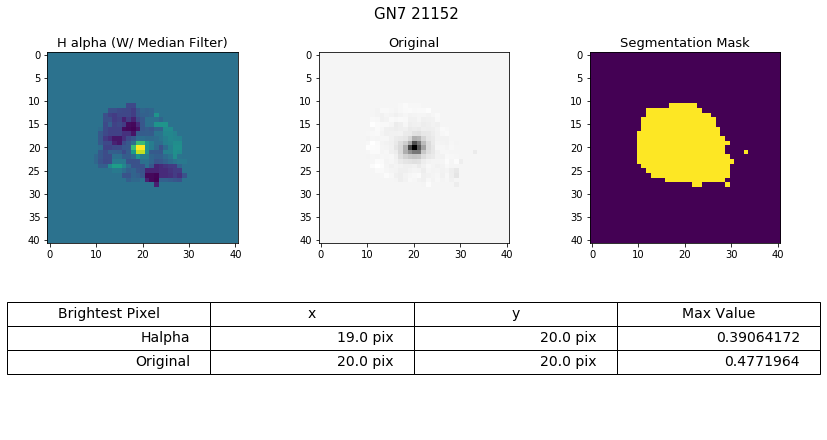

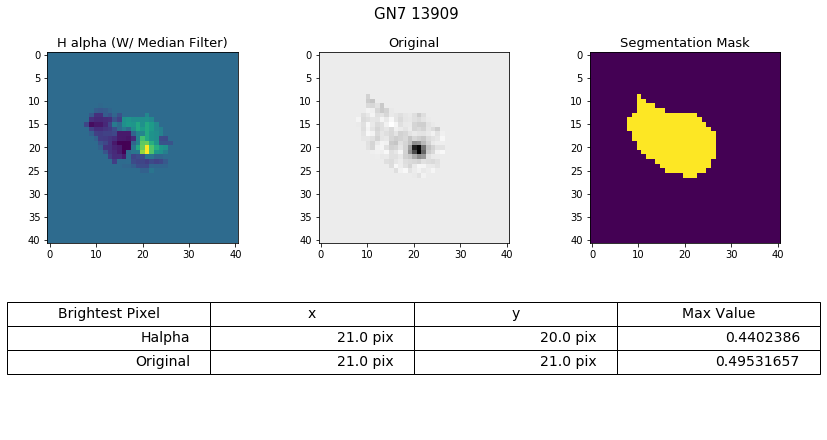

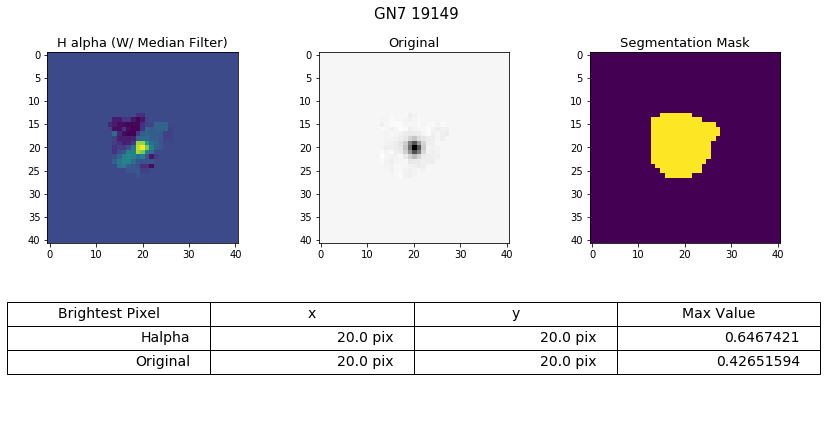

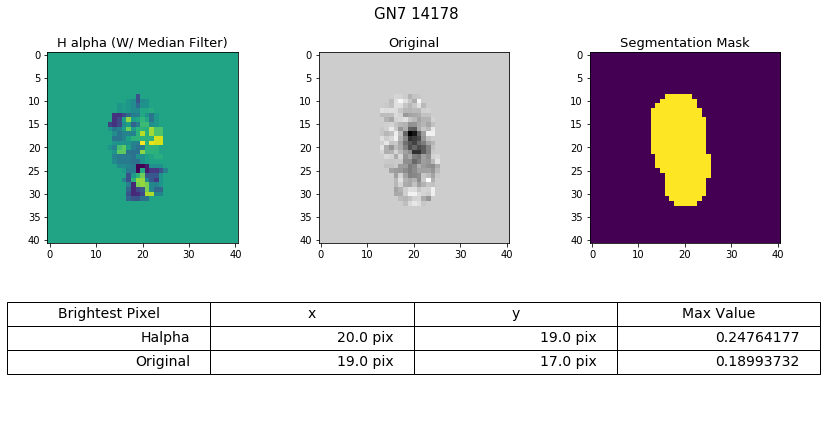

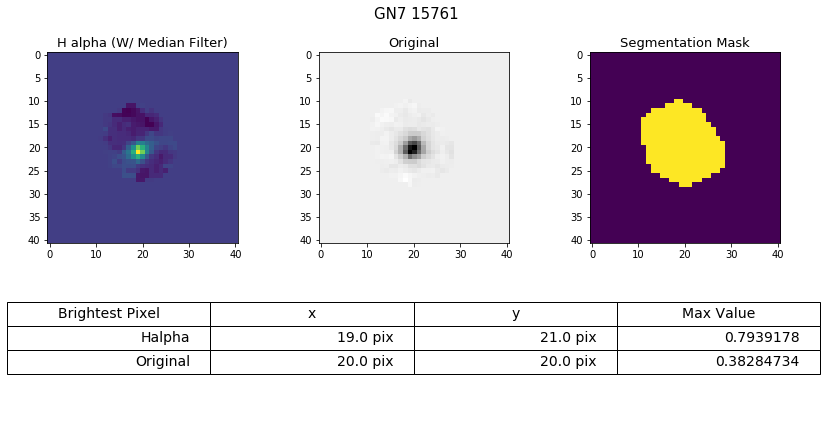

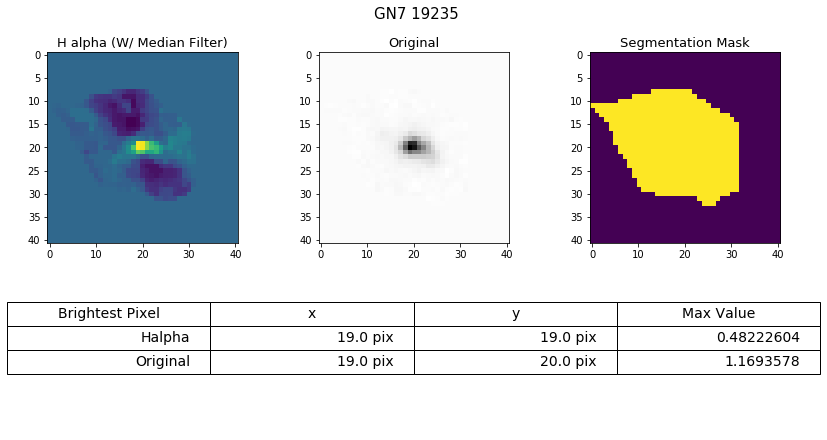

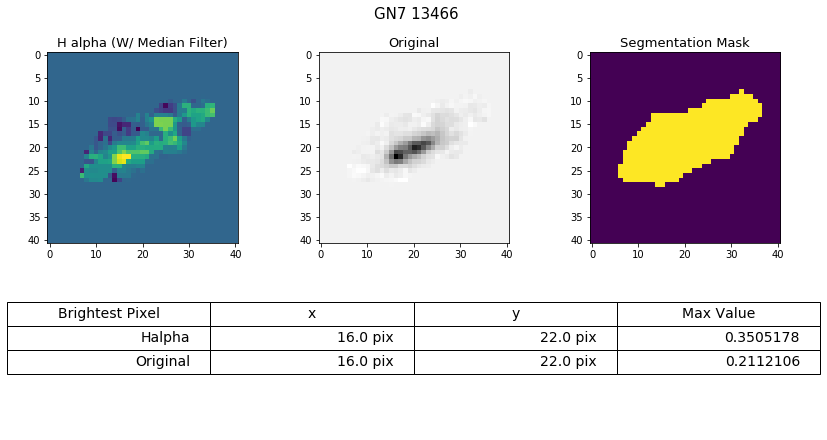

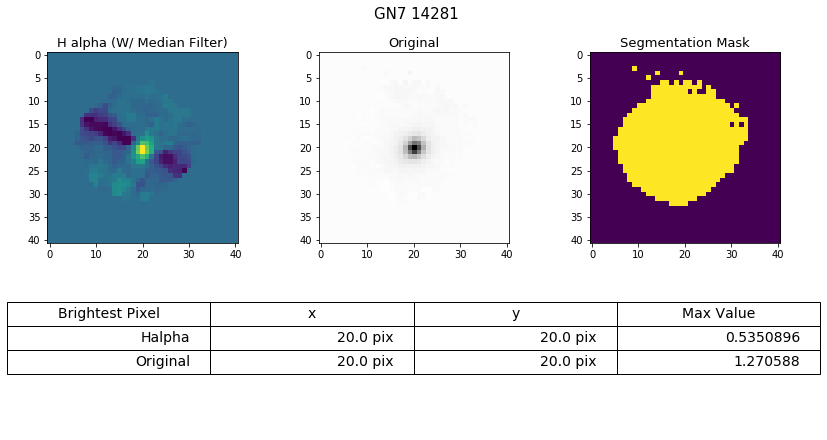

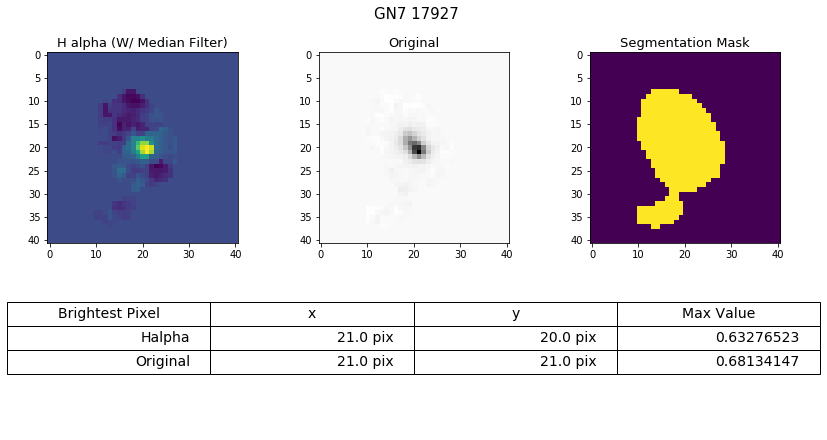

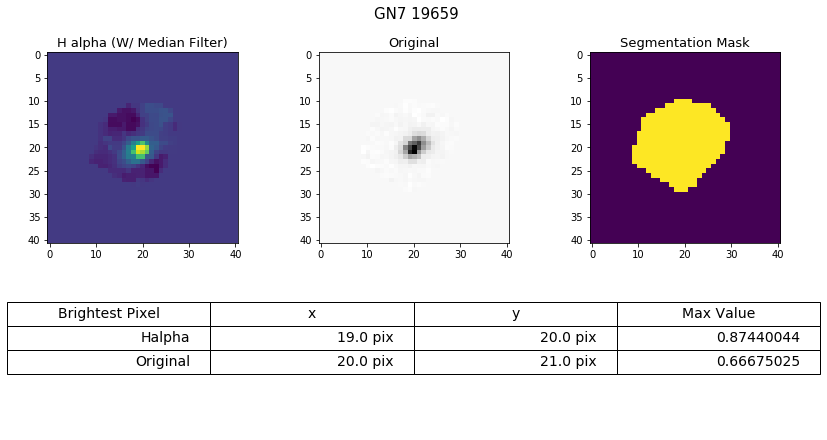

In [13]:
#Finalized Mergers
Sec = [GN1,GN2,GN3,GN4,GN5,GN7]
#Mergers W/ Issues
#Sec = [GN1_bad,GN2_bad,GN3_bad,GN4_bad,GN5_bad,GN7_bad]
Sec_name = ['GN1','GN2','GN3','GN4','GN5','GN7']

GN1_x_off,GN1_y_off,GN2_x_off,GN2_y_off,GN3_x_off,GN3_y_off = [],[],[],[],[],[]
GN4_x_off,GN4_y_off,GN5_x_off,GN5_y_off,GN7_x_off,GN7_y_off = [],[],[],[],[],[]

for i in range(len(Sec_name)):
#Listing all the Arrays for Each Section i.e. GN1
    RealData = []
    Mask = []
    im_med = []
    Halph = []
    Orig = []
    Title_fancy = []
    Title_save = []
    Ha_x = []
    Ha_y = []
    Orig_x = []
    Orig_y = []
    
    for j in range(len(Sec[i])):
        GID = Sec[i][j]
        loc = Sec_name[i]
        
#Opening all the Fits Files
        H_a = fits.open('/Users/felixmartinez/Research/merger_detection/candidates/merger_candidates/'+loc+'/'+loc+'_'+str(GID)+
                                                                                                '.full.fits')
        Ha_fits = '/Users/felixmartinez/Research/merger_detection/candidates/merger_candidates/'+loc+'/'+loc+'_'+str(GID)+'.full.fits'
        Line = H_a['Line','Ha'].data     #Halpha data
        Continuum = H_a['Continuum','Ha'].data
        Contam = H_a['Contam','Ha'].data
        Raw = H_a['DSCI','F105W'].data
        
#Cropping and Correcting the data
        Halph.append(Line[59:100,59:100] - Continuum[59:100,59:100] - Contam[59:100,59:100])  #Fixing the Errors on Halpha
        Orig.append(Raw[59:100,59:100])
        Title_fancy.append(loc + ' ' + str(GID))
        Title_save.append(loc + '_'+str(GID))
        
#X and Y Posistions of Galaxy on Seg Map
        Y,X = np.where(seg_N == GID)
        Z = np.array([Y,X]).T     #Gives the X and Y positions of Object in Y,X
        #world = w.wcs_pix2world(Z,1)  #Gives RA and Dec Values of Object (May not be needed)
        
#Center Pixel of Ha on Seg Map
        RA = H_a[0].header['RA']                                
        DEC = H_a[0].header['DEC']    

        center = w.wcs_world2pix([[RA,DEC]],1)   #Finds the center pixels of the central RA and Dec of the Ha cutout
        hy = np.round(center[0][0])
        hx = np.round(center[0][1])
        center = np.array([int(hx),int(hy)])

 #Making a Mask that is the Galaxy on Seg Map
        seg_mask = np.array(seg_N[center[0]-20:center[0]+21,center[1]-20:center[1]+21])
        seg_mask[seg_mask != GID] = 0
        seg_mask[seg_mask == GID] = 1
    
        Mask.append(np.array(seg_mask))
        
        Ha_img = Halph[j]
        Orig_img = Orig[j]
        
#Applying the Segmentation Map Mask
        Ha_img[Mask[j] == 0]=0
        Orig_img[Mask[j] == 0]=0
        
#Applying the Filter
        m=np.percentile(Ha_img,1.5)   #High Pass
        M=np.percentile(Ha_img,98.5)  #Low Pass
        if M < np.abs(m)*6:
            M = np.abs(m)*6
        RealData.append(func.scaling_factor(Ha_img, m, M))  
        im_med.append(ndimage.median_filter(RealData[j], size = (3,3)))  #Median Smoothing
        
#Finding the Position of the Brightest Pixel and its value
        Ha_position = np.argwhere(im_med[j] == im_med[j].max()) * u.pixel
        Ha_max_value = np.amax(im_med[j])

        Orig_position = np.argwhere(Orig_img == Orig_img.max()) * u.pixel
        Orig_max_value = np.amax(Orig_img) 
        
#Appending the x and y for the Histogram
        Ha_x.append(Ha_position[0][1])
        Ha_y.append(Ha_position[0][0])
        Orig_x.append(Orig_position[0][1])
        Orig_y.append(Orig_position[0][0])
        
#Filtering out Galaxies that are not within the inner 68%
        diff_x = Ha_x[j].value - Orig_x[j].value
        diff_y = Ha_y[j].value - Orig_y[j].value
        
        if(round(xrange[x_low_3[0]],1) <= diff_x <= round(xrange[x_high_3[0]],1) and 
           -2.5 <= diff_y <= round(xrange[y_high_3[0]],1)):
            
#Appending the x and y offset Separetly by Section
            if loc == 'GN1':
                GN1_x_off.append(Ha_x[j].value - Orig_x[j].value)
                GN1_y_off.append(Ha_y[j].value - Orig_y[j].value)
            if loc == 'GN2':
                GN2_x_off.append(Ha_x[j].value - Orig_x[j].value)
                GN2_y_off.append(Ha_y[j].value - Orig_y[j].value)
            if loc == 'GN3':
                GN3_x_off.append(Ha_x[j].value - Orig_x[j].value)
                GN3_y_off.append(Ha_y[j].value - Orig_y[j].value)
            if loc == 'GN4':
                GN4_x_off.append(Ha_x[j].value - Orig_x[j].value)
                GN4_y_off.append(Ha_y[j].value - Orig_y[j].value)
            if loc == 'GN5':
                GN5_x_off.append(Ha_x[j].value - Orig_x[j].value)
                GN5_y_off.append(Ha_y[j].value - Orig_y[j].value)
            if loc == 'GN7':
                GN7_x_off.append(Ha_x[j].value - Orig_x[j].value)
                GN7_y_off.append(Ha_y[j].value - Orig_y[j].value)
            
        
#Making a table with Information of the Pixels location and values
            Test = {'Ha_x':pd.Series(Ha_position[0][1]), 'Ha_y':pd.Series(Ha_position[0][0]),
                    'Ha_max_value':pd.Series(Ha_max_value),'Orig_x':pd.Series(Orig_position[0][1]),
                    'Orig_y':pd.Series(Orig_position[0][0]),'Orig_max_value':pd.Series(Orig_max_value)}
            Position_table = pd.DataFrame(Test)    
            table_data=[['Halpha',Ha_position[0][1],Ha_position[0][0],Ha_max_value],
                        ['Original',Orig_position[0][1],Orig_position[0][0],Orig_max_value]]
        
#Plotting the Figures
            func.plot_fig(3,im_med[j],Orig[j],Mask[j],0,table_data,Title_fancy[j])
#Finalized Mergers Save Line
            #plt.savefig('/Users/felixmartinez/Research/Mergers_Images/'+loc+'/'+Title_save[j]+'.png',bbox_inches = 'tight')
#Mergers W/ Issues Save Line
            #plt.savefig('/Users/felixmartinez/Research/Mergers_Images/Bad_Ha/'+loc+'/'+Title_save[j]+'.png',bbox_inches = 'tight')
        else:
            pass

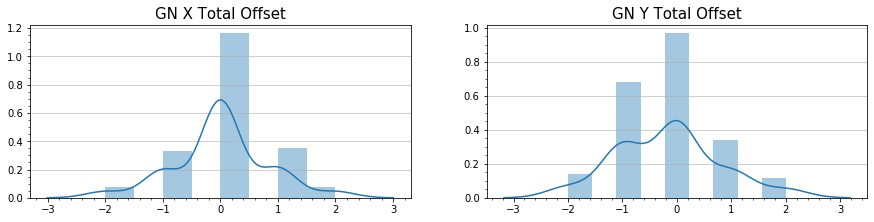

The total number of data points we have are: 79


In [14]:
import seaborn as sea
x_offset = []
y_offset = []

#Real data for Ha
for i in range(len(GN1_x_off)):
    x_offset.append(GN1_x_off[i])
    y_offset.append(GN1_y_off[i])

for i in range(len(GN2_x_off)):
    x_offset.append(GN2_x_off[i])
    y_offset.append(GN2_y_off[i])

for i in range(len(GN3_x_off)):
    x_offset.append(GN3_x_off[i])
    y_offset.append(GN3_y_off[i])

for i in range(len(GN4_x_off)):
    x_offset.append(GN4_x_off[i])
    y_offset.append(GN4_y_off[i])

for i in range(len(GN5_x_off)):
    x_offset.append(GN5_x_off[i])
    y_offset.append(GN5_y_off[i])

for i in range(len(GN7_x_off)):
    x_offset.append(GN7_x_off[i])
    y_offset.append(GN7_y_off[i])
    
plt.figure(figsize=[15,7])
    
plt.subplot(221)
plt.grid(axis = 'y',alpha = .75)
sea.distplot(x_offset)
plt.minorticks_on()
plt.title("GN X Total Offset", fontsize = 15)
#plt.savefig('/Users/felixmartinez/Research/Mergers_Images/x_offset.png',bbox_inches = 'tight')

plt.subplot(222)
plt.grid(axis = 'y',alpha = .75)
sea.distplot(y_offset)
plt.minorticks_on()
plt.title("GN Y Total Offset", fontsize = 15)
#plt.savefig('/Users/felixmartinez/Research/Mergers_Images/y_offset.png',bbox_inches = 'tight')

plt.show()

print("The total number of data points we have are: " + str(len(x_offset)))